In [30]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
df2 = pd.read_excel("base_adaptada.xlsx")
df2

source  author_follower_count  author_followings_count  \
0             Twitter Web App                      2                       57   
1         Twitter for Android                    369                     1034   
2     Cheap Bots, Done Quick!                    447                       49   
3             Twitter Web App                      1                        0   
4             Twitter Web App                   1130                      161   
...                       ...                    ...                      ...   
1015          Twitter Web App                1038893                     5446   
1016     Twitter Media Studio                5274795                      265   
1017      Twitter for Android                    277                      371   
1018      Twitter for Android                     92                      440   
1019      Twitter for Android                    200                      916   

      author_favourites_count  author_statuses_count  author_verified  \
0                          36                     51            False   
1                        1149                   8079            False   
2                           5                   9134            False   
3                           0                    484            False   
4                        1215                   1982            False   
...                       ...                    ...              ...   
1015                   460585                 261958             True   
1016                     3073                  42635             True   
1017                    12036                   1488            False   
1018                    17288                   5263            False   
1019                     4392                   2031            False   

       author_created_at  2020_or_later  default_profile  \
0    2023-02-17 18:59:56           True             True   
1    2011-04-16 11:41:50          False            False   
2    2021-10-12 10:28:22           True             True   
3    2022-11-09 17:33:04           True             True   
4    2021-12-27 04:59:50           True             True   
...                  ...            ...              ...   
1015 2007-11-28 19:10:12          False            False   
1016 2018-04-16 16:23:28          False             True   
1017 2021-05-18 14:28:40           True             True   
1018 2020-11-18 04:32:09           True             True   
1019 2020-06-25 17:41:36           True             True   

      account_has_location  account_has_url  followers_followings_ratio  \
0                     True            False                    0.035088   
1                     True             True                    0.356867   
2                     True             True                    9.122449   
3                    False             True                    0.000000   
4                    False            False                    7.018634   
...                    ...              ...                         ...   
1015                  True             True                  190.762578   
1016                  True             True                19904.886792   
1017                 False            False                    0.746631   
1018                  True            False                    0.209091   
1019                  True            False                    0.218341   

      last_five_tweets_rts_mean  last_five_tweets_favs_mean  \
0                      0.000000                         1.2   
1                      0.000000                         0.0   
2                      0.000000                         3.8   
3                      0.000000                         0.0   
4                      0.000000                         4.0   
...                         ...                         ...   
1015                  22.000000                       405.6   
1016                 216.666667                

In [5]:
df2.dtypes

source                                object
author_follower_count                  int64
author_followings_count                int64
author_favourites_count                int64
author_statuses_count                  int64
author_verified                         bool
author_created_at             datetime64[ns]
2020_or_later                           bool
default_profile                         bool
account_has_location                    bool
account_has_url                         bool
followers_followings_ratio           float64
last_five_tweets_rts_mean            float64
last_five_tweets_favs_mean           float64
last_five_rts_favs_ratio             float64
suspicious_source                       bool
posted_more_than_once                   bool
posted_by_other                         bool
is_a_bot                                bool
dtype: object

In [6]:
df2['author_verified'] = df2['author_verified'].replace({True: 1, False: 0})
df2['2020_or_later'] = df2['2020_or_later'].replace({True: 1, False: 0})
df2['default_profile'] = df2['default_profile'].replace({True: 1, False: 0})
df2['account_has_location'] = df2['account_has_location'].replace({True: 1, False: 0})
df2['account_has_url'] = df2['account_has_url'].replace({True: 1, False: 0})
df2['suspicious_source'] = df2['suspicious_source'].replace({True: 1, False: 0})
df2['posted_more_than_once'] = df2['posted_more_than_once'].replace({True: 1, False: 0})
df2['posted_by_other'] = df2['posted_by_other'].replace({True: 1, False: 0})
df2['is_a_bot'] = df2['is_a_bot'].replace({True: 1, False: 0})

In [7]:
df2.dtypes

source                                object
author_follower_count                  int64
author_followings_count                int64
author_favourites_count                int64
author_statuses_count                  int64
author_verified                        int64
author_created_at             datetime64[ns]
2020_or_later                          int64
default_profile                        int64
account_has_location                   int64
account_has_url                        int64
followers_followings_ratio           float64
last_five_tweets_rts_mean            float64
last_five_tweets_favs_mean           float64
last_five_rts_favs_ratio             float64
suspicious_source                      int64
posted_more_than_once                  int64
posted_by_other                        int64
is_a_bot                               int64
dtype: object

In [9]:
test_sample = df2.sample(n=20, random_state=2)
test_sample

source  author_follower_count  author_followings_count  \
460  Twitter for Android                     10                      277   
974  Twitter for Android                     12                      438   
840   Twitter for iPhone                 535206                     1541   
575  Twitter for Android                     57                       60   
327      Twitter Web App                     93                        1   
673   Twitter for iPhone                     98                      538   
639  Twitter for Android                   7175                       24   
236  Twitter for Android                      8                      210   
930  Twitter for Android                      3                       18   
645   Twitter for iPhone                3203937                       93   
464      Twitter Web App                    427                       31   
67   Twitter for Android                 104973                     7596   
468      Twitter Web App                     63                      491   
997  Twitter for Android                    130                        4   
432  Twitter for Android                     28                      298   
455   Twitter for iPhone                    819                       16   
596   Twitter for iPhone                 395012                      933   
732   Twitter for iPhone                 246075                   189053   
143  Twitter for Android                    161                     3683   
183   Twitter for iPhone                   2378                     3558   

     author_favourites_count  author_statuses_count  author_verified  \
460                      299                    678                0   
974                      273                    638                0   
840                    60424                 119546                0   
575                       95                    270                0   
327                        1                    939                0   
673                     1798                   1751                0   
639                       19                     24                0   
236                       61                    111                0   
930                      434                    466                0   
645                      136                   2797                1   
464                       11                     34                0   
67                      7057                   7662                0   
468                     1286                   1599                0   
997                        1                   1022                0   
432                      282                    659                0   
455                        8                    224                0   
596                    41610                   6757                1   
732                   135025                  71155                0   
143                     3333                  13772                0   
183                    11352                   8251                1   

      author_created_at  2020_or_later  default_profile  account_has_location  \
460 2022-04-27 05:26:19              1                1                     1   
974 2019-12-11 10:17:45              0                1                     1   
840 2010-01-13 18:31:53              0                0                     1   
575 2017-07-05 18:04:38              0                1                     1   
327 2009-10-11 04:23:49              0                1                     1   
673 2016-01-14 02:40:28              0                1                     1   
639 2022-03-04 16:49:21              1                1                     1   
236 2022-12-25 01:13:44              1                1                     1   
930 2023-03-08 08:19:26              1                1                     1   
645 2012-02-01 22:08:19              0                0                     1   
464 2023-01-22 23

In [10]:
test_sample['is_a_bot'].value_counts()

is_a_bot
1    10
0    10
Name: count, dtype: int64

In [11]:
print(test_sample.index)

Index([460, 974, 840, 575, 327, 673, 639, 236, 930, 645, 464,  67, 468, 997,
       432, 455, 596, 732, 143, 183],
      dtype='int64')


In [12]:
test_sample.index.tolist()

[460,
 974,
 840,
 575,
 327,
 673,
 639,
 236,
 930,
 645,
 464,
 67,
 468,
 997,
 432,
 455,
 596,
 732,
 143,
 183]

In [13]:
df2 = df2.drop(labels=test_sample.index.tolist(), axis=0)
df2

source  author_follower_count  author_followings_count  \
0             Twitter Web App                      2                       57   
1         Twitter for Android                    369                     1034   
2     Cheap Bots, Done Quick!                    447                       49   
3             Twitter Web App                      1                        0   
4             Twitter Web App                   1130                      161   
...                       ...                    ...                      ...   
1015          Twitter Web App                1038893                     5446   
1016     Twitter Media Studio                5274795                      265   
1017      Twitter for Android                    277                      371   
1018      Twitter for Android                     92                      440   
1019      Twitter for Android                    200                      916   

      author_favourites_count  author_statuses_count  author_verified  \
0                          36                     51                0   
1                        1149                   8079                0   
2                           5                   9134                0   
3                           0                    484                0   
4                        1215                   1982                0   
...                       ...                    ...              ...   
1015                   460585                 261958                1   
1016                     3073                  42635                1   
1017                    12036                   1488                0   
1018                    17288                   5263                0   
1019                     4392                   2031                0   

       author_created_at  2020_or_later  default_profile  \
0    2023-02-17 18:59:56              1                1   
1    2011-04-16 11:41:50              0                0   
2    2021-10-12 10:28:22              1                1   
3    2022-11-09 17:33:04              1                1   
4    2021-12-27 04:59:50              1                1   
...                  ...            ...              ...   
1015 2007-11-28 19:10:12              0                0   
1016 2018-04-16 16:23:28              0                1   
1017 2021-05-18 14:28:40              1                1   
1018 2020-11-18 04:32:09              1                1   
1019 2020-06-25 17:41:36              1                1   

      account_has_location  account_has_url  followers_followings_ratio  \
0                        1                0                    0.035088   
1                        1                1                    0.356867   
2                        1                1                    9.122449   
3                        0                1                    0.000000   
4                        0                0                    7.018634   
...                    ...              ...                         ...   
1015                     1                1                  190.762578   
1016                     1                1                19904.886792   
1017                     0                0                    0.746631   
1018                     1                0                    0.209091   
1019                     1                0                    0.218341   

      last_five_tweets_rts_mean  last_five_tweets_favs_mean  \
0                      0.000000                         1.2   
1                      0.000000                         0.0   
2                      0.000000                         3.8   
3                      0.000000                         0.0   
4                      0.000000                         4.0   
...                         ...                         ...   
1015                  22.000000                       405.6   
1016                 216.666667                

In [14]:
df2.shape

(1000, 19)

In [15]:
df2.head(70)

source  author_follower_count  author_followings_count  \
0           Twitter Web App                      2                       57   
1       Twitter for Android                    369                     1034   
2   Cheap Bots, Done Quick!                    447                       49   
3           Twitter Web App                      1                        0   
4           Twitter Web App                   1130                      161   
..                      ...                    ...                      ...   
65      Twitter for Android                     10                       88   
66      Twitter for Android                     84                      521   
68      Twitter for Android                    684                      317   
69          Twitter Web App                    380                      586   
70          _crypto_alerts_                   5038                        2   

    author_favourites_count  author_statuses_count  author_verified  \
0                        36                     51                0   
1                      1149                   8079                0   
2                         5                   9134                0   
3                         0                    484                0   
4                      1215                   1982                0   
..                      ...                    ...              ...   
65                       10                    211                0   
66                      154                    233                0   
68                    12575                   8084                0   
69                     2259                   2240                0   
70                        1                 128723                0   

     author_created_at  2020_or_later  default_profile  account_has_location  \
0  2023-02-17 18:59:56              1                1                     1   
1  2011-04-16 11:41:50              0                0                     1   
2  2021-10-12 10:28:22              1                1                     1   
3  2022-11-09 17:33:04              1                1                     0   
4  2021-12-27 04:59:50              1                1                     0   
..                 ...            ...              ...                   ...   
65 2021-10-02 21:21:10              1                1                     1   
66 2022-10-19 07:16:05              1                1                     1   
68 2022-04-27 16:19:46              1                1                     1   
69 2020-01-18 21:06:49              1                1                     1   
70 2021-04-14 20:16:57              1                1                     1   

    account_has_url  followers_followings_ratio  last_five_tweets_rts_mean  \
0                 0                    0.035088                        0.0   
1                 1                    0.356867                        0.0   
2                 1                    9.122449                        0.0   
3                 1                    0.000000                        0.0   
4                 0                    7.018634                        0.0   
..              ...                         ...                        ...   
65                0                    0.113636                        0.0   
66                0                    0.161228                        0.0   
68                1                    2.157729                        0.0   
69                0                    0.648464                        0.0   
70                1                 2519.000000                        0.0   

    last_five_tweets_favs_mean  last_five_rts_favs_ratio  suspicious_source  \
0                     1.200000                       0.0                  0   
1                     0.000000                       0.0                  0   
2                     3.800000                       0.0                  1   
3    

In [14]:
# Normalização - Min-Max Scaler

In [16]:
# Import dos módulos
from sklearn.preprocessing import MinMaxScaler

In [17]:
df2.columns

Index(['source', 'author_follower_count', 'author_followings_count',
       'author_favourites_count', 'author_statuses_count', 'author_verified',
       'author_created_at', '2020_or_later', 'default_profile',
       'account_has_location', 'account_has_url', 'followers_followings_ratio',
       'last_five_tweets_rts_mean', 'last_five_tweets_favs_mean',
       'last_five_rts_favs_ratio', 'suspicious_source',
       'posted_more_than_once', 'posted_by_other', 'is_a_bot'],
      dtype='object')

In [18]:
to_be_scaled = df2[['author_follower_count', 'author_followings_count', 'author_favourites_count', 'author_statuses_count',
                    'followers_followings_ratio', 'last_five_tweets_rts_mean', 'last_five_tweets_favs_mean',
                    'last_five_rts_favs_ratio']]

to_be_scaled_test = test_sample[['author_follower_count', 'author_followings_count', 'author_favourites_count', 'author_statuses_count',
                    'followers_followings_ratio', 'last_five_tweets_rts_mean', 'last_five_tweets_favs_mean',
                    'last_five_rts_favs_ratio']]

In [19]:
to_be_scaled

author_follower_count  author_followings_count  author_favourites_count  \
0                         2                       57                       36   
1                       369                     1034                     1149   
2                       447                       49                        5   
3                         1                        0                        0   
4                      1130                      161                     1215   
...                     ...                      ...                      ...   
1015                1038893                     5446                   460585   
1016                5274795                      265                     3073   
1017                    277                      371                    12036   
1018                     92                      440                    17288   
1019                    200                      916                     4392   

      author_statuses_count  followers_followings_ratio  \
0                        51                    0.035088   
1                      8079                    0.356867   
2                      9134                    9.122449   
3                       484                    0.000000   
4                      1982                    7.018634   
...                     ...                         ...   
1015                 261958                  190.762578   
1016                  42635                19904.886792   
1017                   1488                    0.746631   
1018                   5263                    0.209091   
1019                   2031                    0.218341   

      last_five_tweets_rts_mean  last_five_tweets_favs_mean  \
0                      0.000000                         1.2   
1                      0.000000                         0.0   
2                      0.000000                         3.8   
3                      0.000000                         0.0   
4                      0.000000                         4.0   
...                         ...                         ...   
1015                  22.000000                       405.6   
1016                 216.666667                      1805.0   
1017                   0.000000                         1.6   
1018                   0.000000                        34.8   
1019                   0.000000                         0.2   

      last_five_rts_favs_ratio  
0                     0.000000  
1                     0.000000  
2                     0.000000  
3                     0.000000  
4                     0.000000  
...                        ...  
1015                  0.054241  
1016                  0.120037  
1017                  0.000000  
1018                  0.000000  
1019                  0.000000  

[1000 rows x 8 columns]

In [20]:
print(to_be_scaled.columns)
print(to_be_scaled_test.columns)

Index(['author_follower_count', 'author_followings_count',
       'author_favourites_count', 'author_statuses_count',
       'followers_followings_ratio', 'last_five_tweets_rts_mean',
       'last_five_tweets_favs_mean', 'last_five_rts_favs_ratio'],
      dtype='object')
Index(['author_follower_count', 'author_followings_count',
       'author_favourites_count', 'author_statuses_count',
       'followers_followings_ratio', 'last_five_tweets_rts_mean',
       'last_five_tweets_favs_mean', 'last_five_rts_favs_ratio'],
      dtype='object')


In [26]:
scaler = MinMaxScaler()

In [27]:
scaler.fit(to_be_scaled)

MinMaxScaler()

In [28]:
print(scaler.data_max_)

[1.29984531e+08 1.61013000e+05 4.60585000e+05 6.28206000e+05
 1.73519100e+06 1.01550000e+04 1.15571250e+05 1.72739726e+00]


In [29]:
scaler.transform(to_be_scaled)

array([[1.53864463e-08, 3.54008683e-04, 7.81614686e-05, ...,
        0.00000000e+00, 1.03832052e-05, 0.00000000e+00],
       [2.83879933e-06, 6.42184171e-03, 2.49465354e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.43887074e-06, 3.04323253e-04, 1.08557595e-05, ...,
        0.00000000e+00, 3.28801497e-05, 0.00000000e+00],
       ...,
       [2.13102281e-06, 2.30416178e-03, 2.61319843e-02, ...,
        0.00000000e+00, 1.38442736e-05, 0.00000000e+00],
       [7.07776528e-07, 2.73269860e-03, 3.75348741e-02, ...,
        0.00000000e+00, 3.01112950e-04, 0.00000000e+00],
       [1.53864463e-06, 5.68898164e-03, 9.53569917e-03, ...,
        0.00000000e+00, 1.73053419e-06, 0.00000000e+00]])

In [31]:
df2.columns

Index(['source', 'author_follower_count', 'author_followings_count',
       'author_favourites_count', 'author_statuses_count', 'author_verified',
       'author_created_at', '2020_or_later', 'default_profile',
       'account_has_location', 'account_has_url', 'followers_followings_ratio',
       'last_five_tweets_rts_mean', 'last_five_tweets_favs_mean',
       'last_five_rts_favs_ratio', 'suspicious_source',
       'posted_more_than_once', 'posted_by_other', 'is_a_bot'],
      dtype='object')

In [32]:
to_be_scaled.columns

Index(['author_follower_count', 'author_followings_count',
       'author_favourites_count', 'author_statuses_count',
       'followers_followings_ratio', 'last_five_tweets_rts_mean',
       'last_five_tweets_favs_mean', 'last_five_rts_favs_ratio'],
      dtype='object')

In [33]:
df2_scaled = pd.DataFrame(scaler.transform(to_be_scaled), columns=to_be_scaled.columns, index=to_be_scaled.index.tolist())
df2_scaled

author_follower_count  author_followings_count  author_favourites_count  \
0              1.538645e-08                 0.000354                 0.000078   
1              2.838799e-06                 0.006422                 0.002495   
2              3.438871e-06                 0.000304                 0.000011   
3              7.693223e-09                 0.000000                 0.000000   
4              8.693342e-06                 0.001000                 0.002638   
...                     ...                      ...                      ...   
1015           7.992436e-03                 0.033823                 1.000000   
1016           4.058017e-02                 0.001646                 0.006672   
1017           2.131023e-06                 0.002304                 0.026132   
1018           7.077765e-07                 0.002733                 0.037535   
1019           1.538645e-06                 0.005689                 0.009536   

      author_statuses_count  followers_followings_ratio  \
0                  0.000076                2.022124e-08   
1                  0.012856                2.056641e-07   
2                  0.014535                5.257317e-06   
3                  0.000766                0.000000e+00   
4                  0.003150                4.044877e-06   
...                     ...                         ...   
1015               0.416991                1.099375e-04   
1016               0.067863                1.147129e-02   
1017               0.002364                4.302873e-07   
1018               0.008373                1.205002e-07   
1019               0.003228                1.258309e-07   

      last_five_tweets_rts_mean  last_five_tweets_favs_mean  \
0                      0.000000                    0.000010   
1                      0.000000                    0.000000   
2                      0.000000                    0.000033   
3                      0.000000                    0.000000   
4                      0.000000                    0.000035   
...                         ...                         ...   
1015                   0.002166                    0.003510   
1016                   0.021336                    0.015618   
1017                   0.000000                    0.000014   
1018                   0.000000                    0.000301   
1019                   0.000000                    0.000002   

      last_five_rts_favs_ratio  
0                      0.00000  
1                      0.00000  
2                      0.00000  
3                      0.00000  
4                      0.00000  
...                        ...  
1015                   0.03140  
1016                   0.06949  
1017                   0.00000  
1018                   0.00000  
1019                   0.00000  

[1000 rows x 8 columns]

In [34]:
df2_scaled.columns

Index(['author_follower_count', 'author_followings_count',
       'author_favourites_count', 'author_statuses_count',
       'followers_followings_ratio', 'last_five_tweets_rts_mean',
       'last_five_tweets_favs_mean', 'last_five_rts_favs_ratio'],
      dtype='object')

In [35]:
df2_scaled[['author_follower_count', 'author_followings_count', 'author_favourites_count', 'author_statuses_count']]

author_follower_count  author_followings_count  author_favourites_count  \
0              1.538645e-08                 0.000354                 0.000078   
1              2.838799e-06                 0.006422                 0.002495   
2              3.438871e-06                 0.000304                 0.000011   
3              7.693223e-09                 0.000000                 0.000000   
4              8.693342e-06                 0.001000                 0.002638   
...                     ...                      ...                      ...   
1015           7.992436e-03                 0.033823                 1.000000   
1016           4.058017e-02                 0.001646                 0.006672   
1017           2.131023e-06                 0.002304                 0.026132   
1018           7.077765e-07                 0.002733                 0.037535   
1019           1.538645e-06                 0.005689                 0.009536   

      author_statuses_count  
0                  0.000076  
1                  0.012856  
2                  0.014535  
3                  0.000766  
4                  0.003150  
...                     ...  
1015               0.416991  
1016               0.067863  
1017               0.002364  
1018               0.008373  
1019               0.003228  

[1000 rows x 4 columns]

In [37]:
new_df2_scaled = pd.concat([df2[['source']], df2_scaled[['author_follower_count', 'author_followings_count',
                                                               'author_favourites_count', 'author_statuses_count']]], axis=1)
new_df2_scaled

source  author_follower_count  author_followings_count  \
0             Twitter Web App           1.538645e-08                 0.000354   
1         Twitter for Android           2.838799e-06                 0.006422   
2     Cheap Bots, Done Quick!           3.438871e-06                 0.000304   
3             Twitter Web App           7.693223e-09                 0.000000   
4             Twitter Web App           8.693342e-06                 0.001000   
...                       ...                    ...                      ...   
1015          Twitter Web App           7.992436e-03                 0.033823   
1016     Twitter Media Studio           4.058017e-02                 0.001646   
1017      Twitter for Android           2.131023e-06                 0.002304   
1018      Twitter for Android           7.077765e-07                 0.002733   
1019      Twitter for Android           1.538645e-06                 0.005689   

      author_favourites_count  author_statuses_count  
0                    0.000078               0.000076  
1                    0.002495               0.012856  
2                    0.000011               0.014535  
3                    0.000000               0.000766  
4                    0.002638               0.003150  
...                       ...                    ...  
1015                 1.000000               0.416991  
1016                 0.006672               0.067863  
1017                 0.026132               0.002364  
1018                 0.037535               0.008373  
1019                 0.009536               0.003228  

[1000 rows x 5 columns]

In [39]:
new_df2_scaled.columns

Index(['source', 'author_follower_count', 'author_followings_count',
       'author_favourites_count', 'author_statuses_count', 'author_verified',
       'author_created_at', '2020_or_later', 'default_profile',
       'account_has_location', 'account_has_url'],
      dtype='object')

In [38]:
new_df2_scaled = pd.concat([new_df2_scaled, df2[['author_verified', 'author_created_at', '2020_or_later', 'default_profile',
                                         'account_has_location', 'account_has_url']]], axis=1, join='inner')
new_df2_scaled

source  author_follower_count  author_followings_count  \
0             Twitter Web App           1.538645e-08                 0.000354   
1         Twitter for Android           2.838799e-06                 0.006422   
2     Cheap Bots, Done Quick!           3.438871e-06                 0.000304   
3             Twitter Web App           7.693223e-09                 0.000000   
4             Twitter Web App           8.693342e-06                 0.001000   
...                       ...                    ...                      ...   
1015          Twitter Web App           7.992436e-03                 0.033823   
1016     Twitter Media Studio           4.058017e-02                 0.001646   
1017      Twitter for Android           2.131023e-06                 0.002304   
1018      Twitter for Android           7.077765e-07                 0.002733   
1019      Twitter for Android           1.538645e-06                 0.005689   

      author_favourites_count  author_statuses_count  author_verified  \
0                    0.000078               0.000076                0   
1                    0.002495               0.012856                0   
2                    0.000011               0.014535                0   
3                    0.000000               0.000766                0   
4                    0.002638               0.003150                0   
...                       ...                    ...              ...   
1015                 1.000000               0.416991                1   
1016                 0.006672               0.067863                1   
1017                 0.026132               0.002364                0   
1018                 0.037535               0.008373                0   
1019                 0.009536               0.003228                0   

       author_created_at  2020_or_later  default_profile  \
0    2023-02-17 18:59:56              1                1   
1    2011-04-16 11:41:50              0                0   
2    2021-10-12 10:28:22              1                1   
3    2022-11-09 17:33:04              1                1   
4    2021-12-27 04:59:50              1                1   
...                  ...            ...              ...   
1015 2007-11-28 19:10:12              0                0   
1016 2018-04-16 16:23:28              0                1   
1017 2021-05-18 14:28:40              1                1   
1018 2020-11-18 04:32:09              1                1   
1019 2020-06-25 17:41:36              1                1   

      account_has_location  account_has_url  
0                        1                0  
1                        1                1  
2                        1                1  
3                        0                1  
4                        0                0  
...                    ...              ...  
1015                     1                1  
1016                     1                1  
1017                     0                0  
1018                     1                0  
1019                     1                0  

[1000 rows x 11 columns]

In [40]:
new_df2_scaled.columns

Index(['source', 'author_follower_count', 'author_followings_count',
       'author_favourites_count', 'author_statuses_count', 'author_verified',
       'author_created_at', '2020_or_later', 'default_profile',
       'account_has_location', 'account_has_url'],
      dtype='object')

In [41]:
df2_scaled.columns

Index(['author_follower_count', 'author_followings_count',
       'author_favourites_count', 'author_statuses_count',
       'followers_followings_ratio', 'last_five_tweets_rts_mean',
       'last_five_tweets_favs_mean', 'last_five_rts_favs_ratio'],
      dtype='object')

In [42]:
new_df2_scaled = pd.concat([new_df2_scaled, df2_scaled[['followers_followings_ratio', 'last_five_tweets_rts_mean',
       'last_five_tweets_favs_mean', 'last_five_rts_favs_ratio']]], axis=1, join='inner')
new_df2_scaled

source  author_follower_count  author_followings_count  \
0             Twitter Web App           1.538645e-08                 0.000354   
1         Twitter for Android           2.838799e-06                 0.006422   
2     Cheap Bots, Done Quick!           3.438871e-06                 0.000304   
3             Twitter Web App           7.693223e-09                 0.000000   
4             Twitter Web App           8.693342e-06                 0.001000   
...                       ...                    ...                      ...   
1015          Twitter Web App           7.992436e-03                 0.033823   
1016     Twitter Media Studio           4.058017e-02                 0.001646   
1017      Twitter for Android           2.131023e-06                 0.002304   
1018      Twitter for Android           7.077765e-07                 0.002733   
1019      Twitter for Android           1.538645e-06                 0.005689   

      author_favourites_count  author_statuses_count  author_verified  \
0                    0.000078               0.000076                0   
1                    0.002495               0.012856                0   
2                    0.000011               0.014535                0   
3                    0.000000               0.000766                0   
4                    0.002638               0.003150                0   
...                       ...                    ...              ...   
1015                 1.000000               0.416991                1   
1016                 0.006672               0.067863                1   
1017                 0.026132               0.002364                0   
1018                 0.037535               0.008373                0   
1019                 0.009536               0.003228                0   

       author_created_at  2020_or_later  default_profile  \
0    2023-02-17 18:59:56              1                1   
1    2011-04-16 11:41:50              0                0   
2    2021-10-12 10:28:22              1                1   
3    2022-11-09 17:33:04              1                1   
4    2021-12-27 04:59:50              1                1   
...                  ...            ...              ...   
1015 2007-11-28 19:10:12              0                0   
1016 2018-04-16 16:23:28              0                1   
1017 2021-05-18 14:28:40              1                1   
1018 2020-11-18 04:32:09              1                1   
1019 2020-06-25 17:41:36              1                1   

      account_has_location  account_has_url  followers_followings_ratio  \
0                        1                0                2.022124e-08   
1                        1                1                2.056641e-07   
2                        1                1                5.257317e-06   
3                        0                1                0.000000e+00   
4                        0                0                4.044877e-06   
...                    ...              ...                         ...   
1015                     1                1                1.099375e-04   
1016                     1                1                1.147129e-02   
1017                     0                0                4.302873e-07   
1018                     1                0                1.205002e-07   
1019                     1                0                1.258309e-07   

      last_five_tweets_rts_mean  last_five_tweets_favs_mean  \
0                      0.000000                    0.000010   
1                      0.000000                    0.000000   
2                      0.000000                    0.000033   
3                      0.000000                    0.000000   
4                      0.000000                    0.000035   
...                         ...                         ...   
1015                   0.002166                    0.003510   
1016                   0.021336                

In [43]:
df2.columns

Index(['source', 'author_follower_count', 'author_followings_count',
       'author_favourites_count', 'author_statuses_count', 'author_verified',
       'author_created_at', '2020_or_later', 'default_profile',
       'account_has_location', 'account_has_url', 'followers_followings_ratio',
       'last_five_tweets_rts_mean', 'last_five_tweets_favs_mean',
       'last_five_rts_favs_ratio', 'suspicious_source',
       'posted_more_than_once', 'posted_by_other', 'is_a_bot'],
      dtype='object')

In [44]:
new_df2_scaled = pd.concat([new_df2_scaled, df2[['suspicious_source', 'posted_more_than_once',
                                                 'posted_by_other', 'is_a_bot']]], axis=1, join='inner')
new_df2_scaled

source  author_follower_count  author_followings_count  \
0             Twitter Web App           1.538645e-08                 0.000354   
1         Twitter for Android           2.838799e-06                 0.006422   
2     Cheap Bots, Done Quick!           3.438871e-06                 0.000304   
3             Twitter Web App           7.693223e-09                 0.000000   
4             Twitter Web App           8.693342e-06                 0.001000   
...                       ...                    ...                      ...   
1015          Twitter Web App           7.992436e-03                 0.033823   
1016     Twitter Media Studio           4.058017e-02                 0.001646   
1017      Twitter for Android           2.131023e-06                 0.002304   
1018      Twitter for Android           7.077765e-07                 0.002733   
1019      Twitter for Android           1.538645e-06                 0.005689   

      author_favourites_count  author_statuses_count  author_verified  \
0                    0.000078               0.000076                0   
1                    0.002495               0.012856                0   
2                    0.000011               0.014535                0   
3                    0.000000               0.000766                0   
4                    0.002638               0.003150                0   
...                       ...                    ...              ...   
1015                 1.000000               0.416991                1   
1016                 0.006672               0.067863                1   
1017                 0.026132               0.002364                0   
1018                 0.037535               0.008373                0   
1019                 0.009536               0.003228                0   

       author_created_at  2020_or_later  default_profile  \
0    2023-02-17 18:59:56              1                1   
1    2011-04-16 11:41:50              0                0   
2    2021-10-12 10:28:22              1                1   
3    2022-11-09 17:33:04              1                1   
4    2021-12-27 04:59:50              1                1   
...                  ...            ...              ...   
1015 2007-11-28 19:10:12              0                0   
1016 2018-04-16 16:23:28              0                1   
1017 2021-05-18 14:28:40              1                1   
1018 2020-11-18 04:32:09              1                1   
1019 2020-06-25 17:41:36              1                1   

      account_has_location  account_has_url  followers_followings_ratio  \
0                        1                0                2.022124e-08   
1                        1                1                2.056641e-07   
2                        1                1                5.257317e-06   
3                        0                1                0.000000e+00   
4                        0                0                4.044877e-06   
...                    ...              ...                         ...   
1015                     1                1                1.099375e-04   
1016                     1                1                1.147129e-02   
1017                     0                0                4.302873e-07   
1018                     1                0                1.205002e-07   
1019                     1                0                1.258309e-07   

      last_five_tweets_rts_mean  last_five_tweets_favs_mean  \
0                      0.000000                    0.000010   
1                      0.000000                    0.000000   
2                      0.000000                    0.000033   
3                      0.000000                    0.000000   
4                      0.000000                    0.000035   
...                         ...                         ...   
1015                   0.002166                    0.003510   
1016                   0.021336                

In [45]:
new_df2_scaled.isnull().sum()

source                        0
author_follower_count         0
author_followings_count       0
author_favourites_count       0
author_statuses_count         0
author_verified               0
author_created_at             0
2020_or_later                 0
default_profile               0
account_has_location          0
account_has_url               0
followers_followings_ratio    0
last_five_tweets_rts_mean     0
last_five_tweets_favs_mean    0
last_five_rts_favs_ratio      0
suspicious_source             0
posted_more_than_once         0
posted_by_other               0
is_a_bot                      0
dtype: int64

In [46]:
new_df2_scaled.columns

Index(['source', 'author_follower_count', 'author_followings_count',
       'author_favourites_count', 'author_statuses_count', 'author_verified',
       'author_created_at', '2020_or_later', 'default_profile',
       'account_has_location', 'account_has_url', 'followers_followings_ratio',
       'last_five_tweets_rts_mean', 'last_five_tweets_favs_mean',
       'last_five_rts_favs_ratio', 'suspicious_source',
       'posted_more_than_once', 'posted_by_other', 'is_a_bot'],
      dtype='object')

In [47]:
new_df2_scaled.shape

(1000, 19)

In [48]:
df2.shape

(1000, 19)

In [49]:
df2

source  author_follower_count  author_followings_count  \
0             Twitter Web App                      2                       57   
1         Twitter for Android                    369                     1034   
2     Cheap Bots, Done Quick!                    447                       49   
3             Twitter Web App                      1                        0   
4             Twitter Web App                   1130                      161   
...                       ...                    ...                      ...   
1015          Twitter Web App                1038893                     5446   
1016     Twitter Media Studio                5274795                      265   
1017      Twitter for Android                    277                      371   
1018      Twitter for Android                     92                      440   
1019      Twitter for Android                    200                      916   

      author_favourites_count  author_statuses_count  author_verified  \
0                          36                     51                0   
1                        1149                   8079                0   
2                           5                   9134                0   
3                           0                    484                0   
4                        1215                   1982                0   
...                       ...                    ...              ...   
1015                   460585                 261958                1   
1016                     3073                  42635                1   
1017                    12036                   1488                0   
1018                    17288                   5263                0   
1019                     4392                   2031                0   

       author_created_at  2020_or_later  default_profile  \
0    2023-02-17 18:59:56              1                1   
1    2011-04-16 11:41:50              0                0   
2    2021-10-12 10:28:22              1                1   
3    2022-11-09 17:33:04              1                1   
4    2021-12-27 04:59:50              1                1   
...                  ...            ...              ...   
1015 2007-11-28 19:10:12              0                0   
1016 2018-04-16 16:23:28              0                1   
1017 2021-05-18 14:28:40              1                1   
1018 2020-11-18 04:32:09              1                1   
1019 2020-06-25 17:41:36              1                1   

      account_has_location  account_has_url  followers_followings_ratio  \
0                        1                0                    0.035088   
1                        1                1                    0.356867   
2                        1                1                    9.122449   
3                        0                1                    0.000000   
4                        0                0                    7.018634   
...                    ...              ...                         ...   
1015                     1                1                  190.762578   
1016                     1                1                19904.886792   
1017                     0                0                    0.746631   
1018                     1                0                    0.209091   
1019                     1                0                    0.218341   

      last_five_tweets_rts_mean  last_five_tweets_favs_mean  \
0                      0.000000                         1.2   
1                      0.000000                         0.0   
2                      0.000000                         3.8   
3                      0.000000                         0.0   
4                      0.000000                         4.0   
...                         ...                         ...   
1015                  22.000000                       405.6   
1016                 216.666667                

In [50]:
new_df2_scaled

source  author_follower_count  author_followings_count  \
0             Twitter Web App           1.538645e-08                 0.000354   
1         Twitter for Android           2.838799e-06                 0.006422   
2     Cheap Bots, Done Quick!           3.438871e-06                 0.000304   
3             Twitter Web App           7.693223e-09                 0.000000   
4             Twitter Web App           8.693342e-06                 0.001000   
...                       ...                    ...                      ...   
1015          Twitter Web App           7.992436e-03                 0.033823   
1016     Twitter Media Studio           4.058017e-02                 0.001646   
1017      Twitter for Android           2.131023e-06                 0.002304   
1018      Twitter for Android           7.077765e-07                 0.002733   
1019      Twitter for Android           1.538645e-06                 0.005689   

      author_favourites_count  author_statuses_count  author_verified  \
0                    0.000078               0.000076                0   
1                    0.002495               0.012856                0   
2                    0.000011               0.014535                0   
3                    0.000000               0.000766                0   
4                    0.002638               0.003150                0   
...                       ...                    ...              ...   
1015                 1.000000               0.416991                1   
1016                 0.006672               0.067863                1   
1017                 0.026132               0.002364                0   
1018                 0.037535               0.008373                0   
1019                 0.009536               0.003228                0   

       author_created_at  2020_or_later  default_profile  \
0    2023-02-17 18:59:56              1                1   
1    2011-04-16 11:41:50              0                0   
2    2021-10-12 10:28:22              1                1   
3    2022-11-09 17:33:04              1                1   
4    2021-12-27 04:59:50              1                1   
...                  ...            ...              ...   
1015 2007-11-28 19:10:12              0                0   
1016 2018-04-16 16:23:28              0                1   
1017 2021-05-18 14:28:40              1                1   
1018 2020-11-18 04:32:09              1                1   
1019 2020-06-25 17:41:36              1                1   

      account_has_location  account_has_url  followers_followings_ratio  \
0                        1                0                2.022124e-08   
1                        1                1                2.056641e-07   
2                        1                1                5.257317e-06   
3                        0                1                0.000000e+00   
4                        0                0                4.044877e-06   
...                    ...              ...                         ...   
1015                     1                1                1.099375e-04   
1016                     1                1                1.147129e-02   
1017                     0                0                4.302873e-07   
1018                     1                0                1.205002e-07   
1019                     1                0                1.258309e-07   

      last_five_tweets_rts_mean  last_five_tweets_favs_mean  \
0                      0.000000                    0.000010   
1                      0.000000                    0.000000   
2                      0.000000                    0.000033   
3                      0.000000                    0.000000   
4                      0.000000                    0.000035   
...                         ...                         ...   
1015                   0.002166                    0.003510   
1016                   0.021336                

In [51]:
# Normalização do test_sample

In [52]:
scaler.transform(to_be_scaled_test)

array([[7.69322313e-08, 1.72035798e-03, 6.49174419e-04, 1.07449344e-03,
        2.08052503e-08, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.23186775e-08, 2.72027724e-03, 5.92724470e-04, 1.01081975e-03,
        1.57891899e-08, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.11745918e-03, 9.57065579e-03, 1.31189683e-01, 1.90293583e-01,
        2.00157122e-04, 5.71147218e-04, 9.77751820e-04, 2.97137403e-02],
       [4.38513718e-07, 3.72640718e-04, 2.06259431e-04, 4.25021848e-04,
        5.47490161e-07, 0.00000000e+00, 2.16316774e-06, 0.00000000e+00],
       [7.15469751e-07, 6.21067864e-06, 2.17115190e-06, 1.48996423e-03,
        5.35964052e-05, 0.00000000e+00, 1.73053419e-06, 0.00000000e+00],
       [7.53935866e-07, 3.34134511e-03, 3.90373112e-03, 2.78254004e-03,
        1.04977570e-07, 0.00000000e+00, 1.73053419e-05, 0.00000000e+00],
       [5.51988759e-05, 1.49056287e-04, 4.12518862e-05, 3.34286847e-05,
        1.72291312e-04, 1.39241753e-02, 1.92729593e-02, 3.

In [53]:
test_scaled = pd.DataFrame(scaler.transform(to_be_scaled_test), 
                           columns=to_be_scaled_test.columns, index=to_be_scaled_test.index.tolist())
test_scaled

author_follower_count  author_followings_count  author_favourites_count  \
460           7.693223e-08                 0.001720                 0.000649   
974           9.231868e-08                 0.002720                 0.000593   
840           4.117459e-03                 0.009571                 0.131190   
575           4.385137e-07                 0.000373                 0.000206   
327           7.154698e-07                 0.000006                 0.000002   
673           7.539359e-07                 0.003341                 0.003904   
639           5.519888e-05                 0.000149                 0.000041   
236           6.154579e-08                 0.001304                 0.000132   
930           2.307967e-08                 0.000112                 0.000942   
645           2.464860e-02                 0.000578                 0.000295   
464           3.285006e-06                 0.000193                 0.000024   
67            8.075807e-04                 0.047176                 0.015322   
468           4.846731e-07                 0.003049                 0.002792   
997           1.000119e-06                 0.000025                 0.000002   
432           2.154102e-07                 0.001851                 0.000612   
455           6.300750e-06                 0.000099                 0.000017   
596           3.038915e-03                 0.005795                 0.090342   
732           1.893110e-03                 1.174147                 0.293160   
143           1.238609e-06                 0.022874                 0.007236   
183           1.829448e-05                 0.022098                 0.024647   

     author_statuses_count  followers_followings_ratio  \
460               0.001074                2.080525e-08   
974               0.001011                1.578919e-08   
840               0.190294                2.001571e-04   
575               0.000425                5.474902e-07   
327               0.001490                5.359641e-05   
673               0.002783                1.049776e-07   
639               0.000033                1.722913e-04   
236               0.000172                2.195449e-08   
930               0.000737                9.605091e-08   
645               0.004448                1.985426e-02   
464               0.000049                7.938143e-06   
67                0.012192                7.964259e-06   
468               0.002541                7.394550e-08   
997               0.001622                1.872993e-05   
432               0.001044                5.414950e-08   
455               0.000352                2.949963e-05   
596               0.010751                2.439952e-04   
732               0.113263                7.501302e-07   
143               0.021918                2.519283e-08   
183               0.013130                3.851755e-07   

     last_five_tweets_rts_mean  last_five_tweets_favs_mean  \
460                   0.000000                    0.000000   
974                   0.000000                    0.000000   
840                   0.000571                    0.000978   
575                   0.000000                    0.000002   
327                   0.000000                    0.000002   
673                   0.000000                    0.000017   
639                   0.013924                    0.019273   
236                   0.000000                    0.000000   
930                   0.000000                    0.000000   
645                   0.008449                    0.011366   
464                   0.000000                    0.000000   
67                    0.000853                    0.000389   
468                   0.000000                    0.000000   
997                   0.000000                    0.000000   
432                   0.000000                    0.000000   
455                   0.000000                    0.000000   
596                   0.006243                    0

In [54]:
test_scaled.shape

(20, 8)

In [55]:
test_sample

source  author_follower_count  author_followings_count  \
460  Twitter for Android                     10                      277   
974  Twitter for Android                     12                      438   
840   Twitter for iPhone                 535206                     1541   
575  Twitter for Android                     57                       60   
327      Twitter Web App                     93                        1   
673   Twitter for iPhone                     98                      538   
639  Twitter for Android                   7175                       24   
236  Twitter for Android                      8                      210   
930  Twitter for Android                      3                       18   
645   Twitter for iPhone                3203937                       93   
464      Twitter Web App                    427                       31   
67   Twitter for Android                 104973                     7596   
468      Twitter Web App                     63                      491   
997  Twitter for Android                    130                        4   
432  Twitter for Android                     28                      298   
455   Twitter for iPhone                    819                       16   
596   Twitter for iPhone                 395012                      933   
732   Twitter for iPhone                 246075                   189053   
143  Twitter for Android                    161                     3683   
183   Twitter for iPhone                   2378                     3558   

     author_favourites_count  author_statuses_count  author_verified  \
460                      299                    678                0   
974                      273                    638                0   
840                    60424                 119546                0   
575                       95                    270                0   
327                        1                    939                0   
673                     1798                   1751                0   
639                       19                     24                0   
236                       61                    111                0   
930                      434                    466                0   
645                      136                   2797                1   
464                       11                     34                0   
67                      7057                   7662                0   
468                     1286                   1599                0   
997                        1                   1022                0   
432                      282                    659                0   
455                        8                    224                0   
596                    41610                   6757                1   
732                   135025                  71155                0   
143                     3333                  13772                0   
183                    11352                   8251                1   

      author_created_at  2020_or_later  default_profile  account_has_location  \
460 2022-04-27 05:26:19              1                1                     1   
974 2019-12-11 10:17:45              0                1                     1   
840 2010-01-13 18:31:53              0                0                     1   
575 2017-07-05 18:04:38              0                1                     1   
327 2009-10-11 04:23:49              0                1                     1   
673 2016-01-14 02:40:28              0                1                     1   
639 2022-03-04 16:49:21              1                1                     1   
236 2022-12-25 01:13:44              1                1                     1   
930 2023-03-08 08:19:26              1                1                     1   
645 2012-02-01 22:08:19              0                0                     1   
464 2023-01-22 23

In [57]:
new_test = pd.concat([test_sample[['source']], test_scaled[['author_follower_count', 'author_followings_count',
                                                                'author_favourites_count', 'author_statuses_count']]], axis=1)
new_test

source  author_follower_count  author_followings_count  \
460  Twitter for Android           7.693223e-08                 0.001720   
974  Twitter for Android           9.231868e-08                 0.002720   
840   Twitter for iPhone           4.117459e-03                 0.009571   
575  Twitter for Android           4.385137e-07                 0.000373   
327      Twitter Web App           7.154698e-07                 0.000006   
673   Twitter for iPhone           7.539359e-07                 0.003341   
639  Twitter for Android           5.519888e-05                 0.000149   
236  Twitter for Android           6.154579e-08                 0.001304   
930  Twitter for Android           2.307967e-08                 0.000112   
645   Twitter for iPhone           2.464860e-02                 0.000578   
464      Twitter Web App           3.285006e-06                 0.000193   
67   Twitter for Android           8.075807e-04                 0.047176   
468      Twitter Web App           4.846731e-07                 0.003049   
997  Twitter for Android           1.000119e-06                 0.000025   
432  Twitter for Android           2.154102e-07                 0.001851   
455   Twitter for iPhone           6.300750e-06                 0.000099   
596   Twitter for iPhone           3.038915e-03                 0.005795   
732   Twitter for iPhone           1.893110e-03                 1.174147   
143  Twitter for Android           1.238609e-06                 0.022874   
183   Twitter for iPhone           1.829448e-05                 0.022098   

     author_favourites_count  author_statuses_count  
460                 0.000649               0.001074  
974                 0.000593               0.001011  
840                 0.131190               0.190294  
575                 0.000206               0.000425  
327                 0.000002               0.001490  
673                 0.003904               0.002783  
639                 0.000041               0.000033  
236                 0.000132               0.000172  
930                 0.000942               0.000737  
645                 0.000295               0.004448  
464                 0.000024               0.000049  
67                  0.015322               0.012192  
468                 0.002792               0.002541  
997                 0.000002               0.001622  
432                 0.000612               0.001044  
455                 0.000017               0.000352  
596                 0.090342               0.010751  
732                 0.293160               0.113263  
143                 0.007236               0.021918  
183                 0.024647               0.013130

In [58]:
new_test.columns

Index(['source', 'author_follower_count', 'author_followings_count',
       'author_favourites_count', 'author_statuses_count'],
      dtype='object')

In [59]:
new_test = pd.concat([new_test, test_sample[['author_verified', 'author_created_at', '2020_or_later', 'default_profile',
                                         'account_has_location', 'account_has_url']]], axis=1, join='inner')
new_test

source  author_follower_count  author_followings_count  \
460  Twitter for Android           7.693223e-08                 0.001720   
974  Twitter for Android           9.231868e-08                 0.002720   
840   Twitter for iPhone           4.117459e-03                 0.009571   
575  Twitter for Android           4.385137e-07                 0.000373   
327      Twitter Web App           7.154698e-07                 0.000006   
673   Twitter for iPhone           7.539359e-07                 0.003341   
639  Twitter for Android           5.519888e-05                 0.000149   
236  Twitter for Android           6.154579e-08                 0.001304   
930  Twitter for Android           2.307967e-08                 0.000112   
645   Twitter for iPhone           2.464860e-02                 0.000578   
464      Twitter Web App           3.285006e-06                 0.000193   
67   Twitter for Android           8.075807e-04                 0.047176   
468      Twitter Web App           4.846731e-07                 0.003049   
997  Twitter for Android           1.000119e-06                 0.000025   
432  Twitter for Android           2.154102e-07                 0.001851   
455   Twitter for iPhone           6.300750e-06                 0.000099   
596   Twitter for iPhone           3.038915e-03                 0.005795   
732   Twitter for iPhone           1.893110e-03                 1.174147   
143  Twitter for Android           1.238609e-06                 0.022874   
183   Twitter for iPhone           1.829448e-05                 0.022098   

     author_favourites_count  author_statuses_count  author_verified  \
460                 0.000649               0.001074                0   
974                 0.000593               0.001011                0   
840                 0.131190               0.190294                0   
575                 0.000206               0.000425                0   
327                 0.000002               0.001490                0   
673                 0.003904               0.002783                0   
639                 0.000041               0.000033                0   
236                 0.000132               0.000172                0   
930                 0.000942               0.000737                0   
645                 0.000295               0.004448                1   
464                 0.000024               0.000049                0   
67                  0.015322               0.012192                0   
468                 0.002792               0.002541                0   
997                 0.000002               0.001622                0   
432                 0.000612               0.001044                0   
455                 0.000017               0.000352                0   
596                 0.090342               0.010751                1   
732                 0.293160               0.113263                0   
143                 0.007236               0.021918                0   
183                 0.024647               0.013130                1   

      author_created_at  2020_or_later  default_profile  account_has_location  \
460 2022-04-27 05:26:19              1                1                     1   
974 2019-12-11 10:17:45              0                1                     1   
840 2010-01-13 18:31:53              0                0                     1   
575 2017-07-05 18:04:38              0                1                     1   
327 2009-10-11 04:23:49              0                1                     1   
673 2016-01-14 02:40:28              0                1                     1   
639 2022-03-04 16:49:21              1                1                     1   
236 2022-12-25 01:13:44              1                1                     1   
930 2023-03-08 08:19:26              1                1                     1   
645 2012-02-01 22:08:19              0                0                     1   
464 2023-01-22 23

In [60]:
new_test = pd.concat([new_test, test_scaled[['followers_followings_ratio', 'last_five_tweets_rts_mean',
       'last_five_tweets_favs_mean', 'last_five_rts_favs_ratio']]], axis=1, join='inner')
new_test

source  author_follower_count  author_followings_count  \
460  Twitter for Android           7.693223e-08                 0.001720   
974  Twitter for Android           9.231868e-08                 0.002720   
840   Twitter for iPhone           4.117459e-03                 0.009571   
575  Twitter for Android           4.385137e-07                 0.000373   
327      Twitter Web App           7.154698e-07                 0.000006   
673   Twitter for iPhone           7.539359e-07                 0.003341   
639  Twitter for Android           5.519888e-05                 0.000149   
236  Twitter for Android           6.154579e-08                 0.001304   
930  Twitter for Android           2.307967e-08                 0.000112   
645   Twitter for iPhone           2.464860e-02                 0.000578   
464      Twitter Web App           3.285006e-06                 0.000193   
67   Twitter for Android           8.075807e-04                 0.047176   
468      Twitter Web App           4.846731e-07                 0.003049   
997  Twitter for Android           1.000119e-06                 0.000025   
432  Twitter for Android           2.154102e-07                 0.001851   
455   Twitter for iPhone           6.300750e-06                 0.000099   
596   Twitter for iPhone           3.038915e-03                 0.005795   
732   Twitter for iPhone           1.893110e-03                 1.174147   
143  Twitter for Android           1.238609e-06                 0.022874   
183   Twitter for iPhone           1.829448e-05                 0.022098   

     author_favourites_count  author_statuses_count  author_verified  \
460                 0.000649               0.001074                0   
974                 0.000593               0.001011                0   
840                 0.131190               0.190294                0   
575                 0.000206               0.000425                0   
327                 0.000002               0.001490                0   
673                 0.003904               0.002783                0   
639                 0.000041               0.000033                0   
236                 0.000132               0.000172                0   
930                 0.000942               0.000737                0   
645                 0.000295               0.004448                1   
464                 0.000024               0.000049                0   
67                  0.015322               0.012192                0   
468                 0.002792               0.002541                0   
997                 0.000002               0.001622                0   
432                 0.000612               0.001044                0   
455                 0.000017               0.000352                0   
596                 0.090342               0.010751                1   
732                 0.293160               0.113263                0   
143                 0.007236               0.021918                0   
183                 0.024647               0.013130                1   

      author_created_at  2020_or_later  default_profile  account_has_location  \
460 2022-04-27 05:26:19              1                1                     1   
974 2019-12-11 10:17:45              0                1                     1   
840 2010-01-13 18:31:53              0                0                     1   
575 2017-07-05 18:04:38              0                1                     1   
327 2009-10-11 04:23:49              0                1                     1   
673 2016-01-14 02:40:28              0                1                     1   
639 2022-03-04 16:49:21              1                1                     1   
236 2022-12-25 01:13:44              1                1                     1   
930 2023-03-08 08:19:26              1                1                     1   
645 2012-02-01 22:08:19              0                0                     1   
464 2023-01-22 23

In [61]:
new_test = pd.concat([new_test, test_sample[['suspicious_source', 'posted_more_than_once',
                                                 'posted_by_other', 'is_a_bot']]], axis=1, join='inner')
new_test

source  author_follower_count  author_followings_count  \
460  Twitter for Android           7.693223e-08                 0.001720   
974  Twitter for Android           9.231868e-08                 0.002720   
840   Twitter for iPhone           4.117459e-03                 0.009571   
575  Twitter for Android           4.385137e-07                 0.000373   
327      Twitter Web App           7.154698e-07                 0.000006   
673   Twitter for iPhone           7.539359e-07                 0.003341   
639  Twitter for Android           5.519888e-05                 0.000149   
236  Twitter for Android           6.154579e-08                 0.001304   
930  Twitter for Android           2.307967e-08                 0.000112   
645   Twitter for iPhone           2.464860e-02                 0.000578   
464      Twitter Web App           3.285006e-06                 0.000193   
67   Twitter for Android           8.075807e-04                 0.047176   
468      Twitter Web App           4.846731e-07                 0.003049   
997  Twitter for Android           1.000119e-06                 0.000025   
432  Twitter for Android           2.154102e-07                 0.001851   
455   Twitter for iPhone           6.300750e-06                 0.000099   
596   Twitter for iPhone           3.038915e-03                 0.005795   
732   Twitter for iPhone           1.893110e-03                 1.174147   
143  Twitter for Android           1.238609e-06                 0.022874   
183   Twitter for iPhone           1.829448e-05                 0.022098   

     author_favourites_count  author_statuses_count  author_verified  \
460                 0.000649               0.001074                0   
974                 0.000593               0.001011                0   
840                 0.131190               0.190294                0   
575                 0.000206               0.000425                0   
327                 0.000002               0.001490                0   
673                 0.003904               0.002783                0   
639                 0.000041               0.000033                0   
236                 0.000132               0.000172                0   
930                 0.000942               0.000737                0   
645                 0.000295               0.004448                1   
464                 0.000024               0.000049                0   
67                  0.015322               0.012192                0   
468                 0.002792               0.002541                0   
997                 0.000002               0.001622                0   
432                 0.000612               0.001044                0   
455                 0.000017               0.000352                0   
596                 0.090342               0.010751                1   
732                 0.293160               0.113263                0   
143                 0.007236               0.021918                0   
183                 0.024647               0.013130                1   

      author_created_at  2020_or_later  default_profile  account_has_location  \
460 2022-04-27 05:26:19              1                1                     1   
974 2019-12-11 10:17:45              0                1                     1   
840 2010-01-13 18:31:53              0                0                     1   
575 2017-07-05 18:04:38              0                1                     1   
327 2009-10-11 04:23:49              0                1                     1   
673 2016-01-14 02:40:28              0                1                     1   
639 2022-03-04 16:49:21              1                1                     1   
236 2022-12-25 01:13:44              1                1                     1   
930 2023-03-08 08:19:26              1                1                     1   
645 2012-02-01 22:08:19              0                0                     1   
464 2023-01-22 23

In [62]:
test_sample

source  author_follower_count  author_followings_count  \
460  Twitter for Android                     10                      277   
974  Twitter for Android                     12                      438   
840   Twitter for iPhone                 535206                     1541   
575  Twitter for Android                     57                       60   
327      Twitter Web App                     93                        1   
673   Twitter for iPhone                     98                      538   
639  Twitter for Android                   7175                       24   
236  Twitter for Android                      8                      210   
930  Twitter for Android                      3                       18   
645   Twitter for iPhone                3203937                       93   
464      Twitter Web App                    427                       31   
67   Twitter for Android                 104973                     7596   
468      Twitter Web App                     63                      491   
997  Twitter for Android                    130                        4   
432  Twitter for Android                     28                      298   
455   Twitter for iPhone                    819                       16   
596   Twitter for iPhone                 395012                      933   
732   Twitter for iPhone                 246075                   189053   
143  Twitter for Android                    161                     3683   
183   Twitter for iPhone                   2378                     3558   

     author_favourites_count  author_statuses_count  author_verified  \
460                      299                    678                0   
974                      273                    638                0   
840                    60424                 119546                0   
575                       95                    270                0   
327                        1                    939                0   
673                     1798                   1751                0   
639                       19                     24                0   
236                       61                    111                0   
930                      434                    466                0   
645                      136                   2797                1   
464                       11                     34                0   
67                      7057                   7662                0   
468                     1286                   1599                0   
997                        1                   1022                0   
432                      282                    659                0   
455                        8                    224                0   
596                    41610                   6757                1   
732                   135025                  71155                0   
143                     3333                  13772                0   
183                    11352                   8251                1   

      author_created_at  2020_or_later  default_profile  account_has_location  \
460 2022-04-27 05:26:19              1                1                     1   
974 2019-12-11 10:17:45              0                1                     1   
840 2010-01-13 18:31:53              0                0                     1   
575 2017-07-05 18:04:38              0                1                     1   
327 2009-10-11 04:23:49              0                1                     1   
673 2016-01-14 02:40:28              0                1                     1   
639 2022-03-04 16:49:21              1                1                     1   
236 2022-12-25 01:13:44              1                1                     1   
930 2023-03-08 08:19:26              1                1                     1   
645 2012-02-01 22:08:19              0                0                     1   
464 2023-01-22 23

In [63]:
new_test.isnull().sum()

source                        0
author_follower_count         0
author_followings_count       0
author_favourites_count       0
author_statuses_count         0
author_verified               0
author_created_at             0
2020_or_later                 0
default_profile               0
account_has_location          0
account_has_url               0
followers_followings_ratio    0
last_five_tweets_rts_mean     0
last_five_tweets_favs_mean    0
last_five_rts_favs_ratio      0
suspicious_source             0
posted_more_than_once         0
posted_by_other               0
is_a_bot                      0
dtype: int64

In [64]:
new_test.columns

Index(['source', 'author_follower_count', 'author_followings_count',
       'author_favourites_count', 'author_statuses_count', 'author_verified',
       'author_created_at', '2020_or_later', 'default_profile',
       'account_has_location', 'account_has_url', 'followers_followings_ratio',
       'last_five_tweets_rts_mean', 'last_five_tweets_favs_mean',
       'last_five_rts_favs_ratio', 'suspicious_source',
       'posted_more_than_once', 'posted_by_other', 'is_a_bot'],
      dtype='object')

In [65]:
new_test.shape

(20, 19)

In [66]:
test_sample.shape

(20, 19)

In [60]:
# Testes

In [67]:
new_df2_scaled.isnull().sum()

source                        0
author_follower_count         0
author_followings_count       0
author_favourites_count       0
author_statuses_count         0
author_verified               0
author_created_at             0
2020_or_later                 0
default_profile               0
account_has_location          0
account_has_url               0
followers_followings_ratio    0
last_five_tweets_rts_mean     0
last_five_tweets_favs_mean    0
last_five_rts_favs_ratio      0
suspicious_source             0
posted_more_than_once         0
posted_by_other               0
is_a_bot                      0
dtype: int64

In [68]:
new_df2_scaled.duplicated().sum()

0

In [69]:
new_df2_scaled.is_a_bot.value_counts()

is_a_bot
1    500
0    500
Name: count, dtype: int64

In [70]:
new_df2_scaled.groupby('suspicious_source').size()

suspicious_source
0    961
1     39
dtype: int64

In [71]:
new_df2_scaled[new_df2_scaled.suspicious_source == 1]['is_a_bot'].value_counts()

is_a_bot
0    24
1    15
Name: count, dtype: int64

In [73]:
new_df2_scaled.groupby('author_verified').size()

author_verified
0    820
1    180
dtype: int64

In [74]:
new_df2_scaled[new_df2_scaled.author_verified == 1]['is_a_bot'].value_counts()

is_a_bot
0    179
1      1
Name: count, dtype: int64

In [75]:
verified_humans = new_df2_scaled[new_df2_scaled.author_verified == 1]['is_a_bot'].value_counts()[0]
verified_humans

179

In [76]:
verified_total = len(new_df2_scaled[new_df2_scaled.author_verified == 1])
verified_total

180

In [77]:
print("Verificados e prováveis humanos: ", verified_humans/verified_total)

Verificados e prováveis humanos:  0.9944444444444445


In [78]:
new_df2_scaled.groupby('2020_or_later').size()

2020_or_later
0    493
1    507
dtype: int64

In [79]:
new_df2_scaled[new_df2_scaled['2020_or_later'] == 1]['is_a_bot'].value_counts()

is_a_bot
1    381
0    126
Name: count, dtype: int64

In [80]:
new_df2_scaled[new_df2_scaled['2020_or_later'] == 0]['is_a_bot'].value_counts()

is_a_bot
0    374
1    119
Name: count, dtype: int64

In [81]:
new_df2_scaled.groupby('account_has_url').size()

account_has_url
0    594
1    406
dtype: int64

In [82]:
new_df2_scaled[new_df2_scaled['account_has_url'] == 1]['is_a_bot'].value_counts()

is_a_bot
0    337
1     69
Name: count, dtype: int64

In [83]:
new_df2_scaled[new_df2_scaled['account_has_url'] == 0]['is_a_bot'].value_counts()

is_a_bot
1    431
0    163
Name: count, dtype: int64

In [84]:
new_df2_scaled.groupby('account_has_location').size()

account_has_location
0     21
1    979
dtype: int64

In [85]:
new_df2_scaled.groupby('default_profile').size()

default_profile
0    236
1    764
dtype: int64

In [87]:
new_df2_scaled.corr(method='pearson', numeric_only=True)

author_follower_count  author_followings_count  \
author_follower_count                    1.000000                 0.028308   
author_followings_count                  0.028308                 1.000000   
author_favourites_count                  0.009634                 0.044396   
author_statuses_count                    0.059014                 0.257141   
author_verified                          0.219128                 0.068617   
2020_or_later                           -0.105121                -0.085208   
default_profile                         -0.154300                -0.130258   
account_has_location                     0.014563                 0.014179   
account_has_url                          0.037431                 0.089598   
followers_followings_ratio               0.373063                -0.013565   
last_five_tweets_rts_mean                0.099172                -0.000176   
last_five_tweets_favs_mean               0.111343                -0.010124   
last_five_rts_favs_ratio                 0.025283                 0.182703   
suspicious_source                        0.073112                 0.076362   
posted_more_than_once                   -0.065726                -0.071534   
posted_by_other                         -0.063819                -0.071374   
is_a_bot                                -0.108343                -0.073142   

                            author_favourites_count  author_statuses_count  \
author_follower_count                      0.009634               0.059014   
author_followings_count                    0.044396               0.257141   
author_favourites_count                    1.000000               0.326525   
author_statuses_count                      0.326525               1.000000   
author_verified                            0.109687               0.241161   
2020_or_later                             -0.257007              -0.202438   
default_profile                           -0.269516              -0.308070   
account_has_location                       0.028678               0.035955   
account_has_url                            0.196962               0.226425   
followers_followings_ratio                -0.014510              -0.005134   
last_five_tweets_rts_mean                 -0.028292              -0.032216   
last_five_tweets_favs_mean                -0.026490              -0.030975   
last_five_rts_favs_ratio                  -0.005634               0.021742   
suspicious_source                         -0.046316               0.255397   
posted_more_than_once                     -0.204554              -0.188427   
posted_by_other                           -0.200966              -0.185129   
is_a_bot                                  -0.311838              -0.190898   

                            author_verified  2020_or_later  default_profile  \
author_follower_count              0.219128      -0.105121        -0.154300   
author_followings_count            0.068617      -0.085208        -0.130258   
author_favourites_count            0.109687      -0.257007        -0.269516   
author_statuses_count              0.241161      -0.202438        -0.308070   
author_verified                    1.000000      -0.371001        -0.475191   
2020_or_later                     -0.371001       1.000000         0.563624   
default_profile                   -0.475191       0.563624         1.000000   
account_has_location               0.032313      -0.004924        -0.048551   
account_has_url                    0.428900      -0.374074        -0.466054   
followers_followings_ratio         0.082425      -0.069400        -0.051920   
last_five_tweets_rts_mean          0.183512      -0.043946        -0.041305   
last_five_tweets_favs_mean         0.215858      -0.060935        -0.044899   
last_five_rts_favs_ratio           0.120165      -0.008319        -0.062125   
suspicious_source                  0.187962      -0.038982        -0.131331   
posted_more_than_once            

In [82]:
# Seleção de atributos

In [83]:
# SelectKBest

In [84]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

In [85]:
x1 = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)

y1 = new_df2_scaled.is_a_bot

In [86]:
# SelectKBest com f_classif (default)

In [87]:
select_features = SelectKBest(k=8).fit(x1, y1)

In [88]:
print(select_features.get_support())

[False False  True  True  True  True  True False  True False False False
 False False  True  True]


In [89]:
new_x1 = select_features.transform(x1)

In [90]:
df_aux = pd.DataFrame(new_x1, columns=x1.columns[select_features.get_support()])
df_aux

author_favourites_count  author_statuses_count  author_verified  \
0                   0.000078               0.000076              0.0   
1                   0.002495               0.012856              0.0   
2                   0.000011               0.014535              0.0   
3                   0.000000               0.000766              0.0   
4                   0.002638               0.003150              0.0   
..                       ...                    ...              ...   
995                 1.000000               0.416991              1.0   
996                 0.006672               0.067863              1.0   
997                 0.026132               0.002364              0.0   
998                 0.037535               0.008373              0.0   
999                 0.009536               0.003228              0.0   

     2020_or_later  default_profile  account_has_url  posted_more_than_once  \
0              1.0              1.0              0.0                    0.0   
1              0.0              0.0              1.0                    0.0   
2              1.0              1.0              1.0                    1.0   
3              1.0              1.0              1.0                    1.0   
4              1.0              1.0              0.0                    0.0   
..             ...              ...              ...                    ...   
995            0.0              0.0              1.0                    0.0   
996            0.0              1.0              1.0                    0.0   
997            1.0              1.0              0.0                    0.0   
998            1.0              1.0              0.0                    0.0   
999            1.0              1.0              0.0                    0.0   

     posted_by_other  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  
..               ...  
995              0.0  
996              0.0  
997              0.0  
998              0.0  
999              0.0  

[1000 rows x 8 columns]

In [91]:
df_aux.columns

Index(['author_favourites_count', 'author_statuses_count', 'author_verified',
       '2020_or_later', 'default_profile', 'account_has_url',
       'posted_more_than_once', 'posted_by_other'],
      dtype='object')

In [92]:
# SelectKBest com mutual_info_classif

In [93]:
select_features = SelectKBest(mutual_info_classif, k=8).fit(x1, y1)

In [94]:
print(select_features.get_support())

[ True False False False False False False False  True  True  True  True
  True False  True  True]


In [95]:
new_x1 = select_features.transform(x1)

In [96]:
df_aux = pd.DataFrame(new_x1, columns=x1.columns[select_features.get_support()])
df_aux

author_follower_count  account_has_url  followers_followings_ratio  \
0             1.538645e-08              0.0                2.022124e-08   
1             2.838799e-06              1.0                2.056641e-07   
2             3.438871e-06              1.0                5.257317e-06   
3             7.693223e-09              1.0                0.000000e+00   
4             8.693342e-06              0.0                4.044877e-06   
..                     ...              ...                         ...   
995           7.992436e-03              1.0                1.099375e-04   
996           4.058017e-02              1.0                1.147129e-02   
997           2.131023e-06              0.0                4.302873e-07   
998           7.077765e-07              0.0                1.205002e-07   
999           1.538645e-06              0.0                1.258309e-07   

     last_five_tweets_rts_mean  last_five_tweets_favs_mean  \
0                     0.000000                    0.000010   
1                     0.000000                    0.000000   
2                     0.000000                    0.000033   
3                     0.000000                    0.000000   
4                     0.000000                    0.000035   
..                         ...                         ...   
995                   0.002166                    0.003510   
996                   0.021336                    0.015618   
997                   0.000000                    0.000014   
998                   0.000000                    0.000301   
999                   0.000000                    0.000002   

     last_five_rts_favs_ratio  posted_more_than_once  posted_by_other  
0                     0.00000                    0.0              0.0  
1                     0.00000                    0.0              0.0  
2                     0.00000                    1.0              0.0  
3                     0.00000                    1.0              0.0  
4                     0.00000                    0.0              0.0  
..                        ...                    ...              ...  
995                   0.03140                    0.0              0.0  
996                   0.06949                    0.0              0.0  
997                   0.00000                    0.0              0.0  
998                   0.00000                    0.0              0.0  
999                   0.00000                    0.0              0.0  

[1000 rows x 8 columns]

In [97]:
df_aux.columns

Index(['author_follower_count', 'account_has_url',
       'followers_followings_ratio', 'last_five_tweets_rts_mean',
       'last_five_tweets_favs_mean', 'last_five_rts_favs_ratio',
       'posted_more_than_once', 'posted_by_other'],
      dtype='object')

In [98]:
# Feature selection com RFE + RandomForestRegressor

In [113]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

In [115]:
x1 = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)

y1 = new_df2_scaled.is_a_bot

In [116]:
modelo = RandomForestRegressor(random_state=1)

In [117]:
rfe = RFE(modelo, n_features_to_select=8)
rfe_fit = rfe.fit(x1, y1)

In [118]:
df_aux_rfe = pd.DataFrame(data={"var_select":rfe_fit.support_, "ranking":rfe_fit.ranking_}, index = x1.columns)
df_aux_rfe

var_select  ranking
author_follower_count             True        1
author_followings_count           True        1
author_favourites_count           True        1
author_statuses_count             True        1
author_verified                  False        9
2020_or_later                    False        2
default_profile                  False        6
account_has_location             False        7
account_has_url                  False        3
followers_followings_ratio       False        4
last_five_tweets_rts_mean        False        5
last_five_tweets_favs_mean        True        1
last_five_rts_favs_ratio          True        1
suspicious_source                False        8
posted_more_than_once             True        1
posted_by_other                   True        1

In [104]:
df_aux_rfe[df_aux_rfe['var_select'] == True]

var_select  ranking
author_follower_count             True        1
author_followings_count           True        1
author_favourites_count           True        1
author_statuses_count             True        1
last_five_tweets_favs_mean        True        1
last_five_rts_favs_ratio          True        1
posted_more_than_once             True        1
posted_by_other                   True        1

In [105]:
# Feature selection com RFECV + DecisionTreeClassifier

In [106]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV

In [107]:
x1 = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)

y1 = new_df2_scaled.is_a_bot

In [108]:
modelo = DecisionTreeClassifier(criterion='entropy', random_state=1)

In [109]:
modelo.fit(x1, y1)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [110]:
rfecv = RFECV(estimator=modelo, step=1, cv=2, scoring="accuracy", min_features_to_select=1)

In [111]:
rfecv.fit(x1, y1)

RFECV(cv=2,
      estimator=DecisionTreeClassifier(criterion='entropy', random_state=1),
      scoring='accuracy')

In [112]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 8


In [113]:
rfecv_aux = pd.DataFrame({'atributtes':  x1.columns, 
                          'feature_importances': modelo.feature_importances_}).sort_values(
                                                                                'feature_importances',ascending=False)
rfecv_aux

atributtes  feature_importances
0        author_follower_count             0.427883
2      author_favourites_count             0.144283
15             posted_by_other             0.130469
3        author_statuses_count             0.064784
11  last_five_tweets_favs_mean             0.058113
1      author_followings_count             0.053551
5                2020_or_later             0.033926
14       posted_more_than_once             0.030508
12    last_five_rts_favs_ratio             0.030170
8              account_has_url             0.014682
9   followers_followings_ratio             0.006121
4              author_verified             0.005510
6              default_profile             0.000000
7         account_has_location             0.000000
10   last_five_tweets_rts_mean             0.000000
13           suspicious_source             0.000000

In [114]:
# Método Ensemble - RandomForestRegressor

In [115]:
from sklearn.ensemble import RandomForestRegressor

In [116]:
x1 = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)

y1 = new_df2_scaled.is_a_bot

In [117]:
modelo = RandomForestRegressor(random_state=1)
modelo.fit(x1, y1)

RandomForestRegressor(random_state=1)

In [118]:
# Monta uma série contendo os nomes dos atributos e a sua importância 
s_atributos = pd.Series(modelo.feature_importances_, index=x1.columns).sort_values(ascending=False)
s_atributos

author_follower_count         0.369671
last_five_tweets_favs_mean    0.205522
author_favourites_count       0.120026
author_followings_count       0.065023
posted_by_other               0.059833
author_statuses_count         0.051984
posted_more_than_once         0.039590
last_five_rts_favs_ratio      0.025491
2020_or_later                 0.017188
account_has_url               0.016309
followers_followings_ratio    0.011898
default_profile               0.005068
last_five_tweets_rts_mean     0.004653
account_has_location          0.003748
suspicious_source             0.002193
author_verified               0.001804
dtype: float64

In [119]:
# # Possível refatoração para comparação de modelos
# 
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# 
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)
# 
# base_estimators = [ LogisticRegression(),
#                     neighbors.KNeighborsClassifier(5),
#                     DecisionTreeClassifier(),
#                     DecisionTreeClassifier(max_depth=2) ]
# 
# best_score = 0
# 
# for estimator in base_estimators:
#   clf = estimator
#   clf.fit(X_train, y_train)
# 
#   y_pred = clf.predict(X_test)
# 
#   print(clf) 
# 
#   accuracy = clf.score(X_test, y_test)
#   print('\nScore de Acuracidade (2):\n')
#   print(f'{accuracy:.2f}')
# 
#   if accuracy > best_score:
#     best_score = accuracy
#     best_model = clf
# 
#   print('\nClassification Report:\n')
#   print(classification_report(y_test, y_pred))
# 

In [120]:
# # Outra possível refatoração
# 
# %%script false
# 
# for k in range(2,10):
#   clf = neighbors.KNeighborsClassifier(k)
#   ...
# 
# # OU
# 
# for deep in range(2,10):
#   clf = DecisionTreeClassifier(max_depth=deep)
#   ...

In [121]:
# IA #

In [122]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

In [123]:
new_df2_scaled.columns

Index(['source', 'author', 'author_follower_count', 'author_followings_count',
       'author_favourites_count', 'author_statuses_count', 'author_verified',
       'author_created_at', '2020_or_later', 'default_profile',
       'account_has_location', 'account_has_url', 'followers_followings_ratio',
       'last_five_tweets_rts_mean', 'last_five_tweets_favs_mean',
       'last_five_rts_favs_ratio', 'suspicious_source',
       'posted_more_than_once', 'posted_by_other', 'is_a_bot'],
      dtype='object')

In [124]:
x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)

y = new_df2_scaled.is_a_bot

In [125]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [126]:
clf = tree.DecisionTreeClassifier(random_state=3)

In [127]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=3)

In [128]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1], d

In [129]:
unique, counts = np.unique(y_pred, return_counts=True)

In [130]:
print(np.asarray((unique, counts)).T)

[[  0 158]
 [  1 142]]


In [131]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[138,  16],
       [ 20, 126]], dtype=int64)

In [132]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.88

In [133]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred, labels=[1,0])
print('\nMatriz de Confusão:\n')
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print('\nScore de Acuracidade (1):\n')
print(f'{accuracy:.2f}')

accuracy = clf.score(X_test, y_test)
print('\nScore de Acuracidade (2):\n')
print(f'{accuracy:.2f}')

print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))


Matriz de Confusão:

[[126  20]
 [ 16 138]]

Score de Acuracidade (1):

0.88

Score de Acuracidade (2):

0.88

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       154
           1       0.89      0.86      0.88       146

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300



In [101]:
unique, counts = np.unique(y_pred, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 158]
 [  1 142]]


In [102]:
# Acima, vemos quantos valores fizemos predição para classe 0 (não-bot) e classe 1 (bot)

In [103]:
cm = confusion_matrix(y_test, y_pred, labels=[1,0]) # o parâmetro labels ordena quem vem primeiro (1 nas 1as row/col, 0 nas 2as)
print('\nMatriz de Confusão:\n')
print(cm)


Matriz de Confusão:

[[126  20]
 [ 16 138]]


In [104]:
# Interpretação da matriz de confusão:

# [A   B 
#  C   D]

# Classe 0 = não-bot; Classe 1 = bot
# A = TP => Verdadeiro Positivo => valores que são da classe 1 e foram previstos como da classe 1. 126 no momento
# B = FN => Falso Negativo => valores que são da classe 1 mas foram previstos como da classe 0. 20 no momento
# C = FP => Falso Positivo => valores que são da classe 0 mas foram previstos como da classe 1. 16 no momento
# D = TN => Verdadeiro Negativo => valores que são da classe 0 e foram previstos como da classe 0. 138 no momento

# Outras análises:
# A + B = quantidade de casos positivos REAIS -> 126 + 20 = 146 casos
# A + C = quantidade de casos PREVISTOS como positivos -> 126 + 16 = 142 casos -> bate com o count de y_pred
# A + D = quantidades de casos PREVISTOS corretamente -> 126 + 138 = 264 casos
# C + D = quantidade de casos negativos REAIS no y_pred -> 16 + 138 = 154 casos
# B + D = quantidade de casos PREVISTOS como negativos -> 20 + 138 = 158 casos -> bate com o count de y_pred

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
clf2 = RandomForestClassifier(max_depth=5, random_state=1)

In [107]:
clf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=1)

In [108]:
y_pred2 = clf2.predict(X_test)
y_pred2

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1], d

In [109]:
unique, counts = np.unique(y_pred2, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 148]
 [  1 152]]


In [110]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred2)
cnf_matrix

array([[137,  17],
       [ 11, 135]], dtype=int64)

In [111]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred2)

0.9066666666666666

In [112]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred2, labels=[1,0])
print('\nMatriz de Confusão:\n')
print(cm)

accuracy = accuracy_score(y_test, y_pred2)
print('\nScore de Acuracidade (1):\n')
print(f'{accuracy:.2f}')

accuracy = clf2.score(X_test, y_test)
print('\nScore de Acuracidade (2):\n')
print(f'{accuracy:.2f}')

print('\nClassification Report:\n')
print(classification_report(y_test, y_pred2))


Matriz de Confusão:

[[135  11]
 [ 17 137]]

Score de Acuracidade (1):

0.91

Score de Acuracidade (2):

0.91

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       154
           1       0.89      0.92      0.91       146

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [113]:
# Matriz de confusão - versão mais bonita

In [114]:
original_params = plt.rcParams.copy()
original_params['font.size']

7.199999999999999

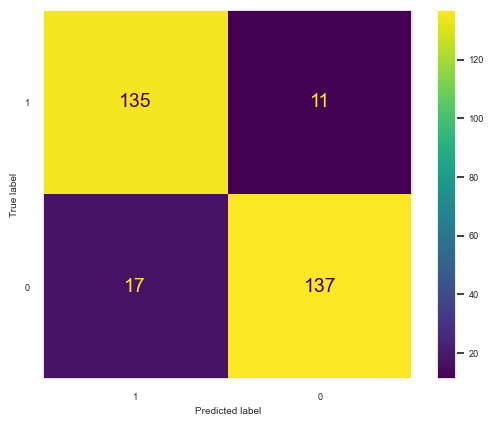

In [115]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots()

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 0])
disp.plot(ax=ax)
plt.grid(False)

plt.show()

In [116]:
plt.rcParams.update(original_params)
plt.rcParams['font.size']

7.199999999999999

In [117]:
clf3 = RandomForestClassifier(max_depth=None, random_state=1)

In [118]:
clf3.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [119]:
y_pred3 = clf3.predict(X_test)
y_pred3

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], d

In [120]:
unique, counts = np.unique(y_pred3, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 153]
 [  1 147]]


In [121]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred3)
cnf_matrix

array([[140,  14],
       [ 13, 133]], dtype=int64)

In [122]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred3)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred3, labels=[1,0])
print('\nMatriz de Confusão:\n')
print(cm)

accuracy = accuracy_score(y_test, y_pred3)
print('\nScore de Acuracidade (1):\n')
print(f'{accuracy:.2f}')

accuracy = clf3.score(X_test, y_test)
print('\nScore de Acuracidade (2):\n')
print(f'{accuracy:.2f}')

print('\nClassification Report:\n')
print(classification_report(y_test, y_pred3))


Matriz de Confusão:

[[133  13]
 [ 14 140]]

Score de Acuracidade (1):

0.91

Score de Acuracidade (2):

0.91

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       154
           1       0.90      0.91      0.91       146

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [258]:
clf4 = RandomForestClassifier(max_depth=6, random_state=1)

In [259]:
clf4.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, random_state=1)

In [260]:
y_pred4 = clf4.predict(X_test)
y_pred4

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1], d

In [261]:
unique, counts = np.unique(y_pred4, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 148]
 [  1 152]]


In [262]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred4)
cnf_matrix

array([[137,  17],
       [ 11, 135]], dtype=int64)

In [263]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred4)

0.9066666666666666

In [264]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred4, labels=[1,0])
print('\nMatriz de Confusão:\n')
print(cm)

accuracy = accuracy_score(y_test, y_pred4)
print('\nScore de Acuracidade (1):\n')
print(f'{accuracy:.2f}')

accuracy = clf4.score(X_test, y_test)
print('\nScore de Acuracidade (2):\n')
print(f'{accuracy:.2f}')

print('\nClassification Report:\n')
print(classification_report(y_test, y_pred4))


Matriz de Confusão:

[[135  11]
 [ 17 137]]

Score de Acuracidade (1):

0.91

Score de Acuracidade (2):

0.91

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       154
           1       0.89      0.92      0.91       146

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [137]:
## Retroalimentação - Usar o notebook "Tweepy.ipynb" pra isso

In [138]:
# Possível refatoração para comparação de modelos

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [135]:
def comparing_models_01(X_train, X_test, y_train, y_test, base_estimators):
    results_dict = {}

    for estimator in base_estimators:
        clf = estimator
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)

        print("------------------------------------------------------\n")
        print(clf) 

        cm = confusion_matrix(y_test, y_pred, labels=[1,0])
        print('\nMatriz de Confusão:\n')
        print(cm)

        accuracy = clf.score(X_test, y_test)
        print('\nScore de Acuracidade:\n')
        print(f'{accuracy:.2f}')

        results_dict[clf] = accuracy

        print('\nClassification Report:\n')
        print(classification_report(y_test, y_pred))


    print("\nResultados de cada iteração:")

    for clf, score in results_dict.items():
        print("------------------------------------------------------\n")
        print("Classificador:", clf)
        print("Score:", score)

    best_model = max(results_dict, key=results_dict.get)
    best_score = results_dict[best_model]

    print("\nMelhor modelo:")
    print(best_model)
    print("Score do melhor modelo:", best_score)

In [141]:
base_estimators_01 = [ LogisticRegression(),
                       KNeighborsClassifier(n_neighbors=5),
                       tree.DecisionTreeClassifier(random_state=3),
                       RandomForestClassifier(max_depth=5, random_state=1),
                       RandomForestClassifier(max_depth=None, random_state=1),
                       RandomForestClassifier(max_depth=6, random_state=1),
                       GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=1),
                       GradientBoostingClassifier(n_estimators=1000, learning_rate=1.0, random_state=1),
                       GradientBoostingClassifier(n_estimators=1000, max_depth=5, random_state=1),
                       SVC(kernel='linear', random_state=1), SVC(kernel='poly', random_state=1),
                       SVC(kernel='poly', degree=5, random_state=1),
                       SVC(kernel='rbf', random_state=1), SVC(kernel='sigmoid', random_state=1)]

base_estimators_02 = [ LogisticRegression(max_iter=1000),
                    LogisticRegression(max_iter=10000),
                    tree.DecisionTreeClassifier(max_depth=None, random_state=1),
                    RandomForestClassifier(max_depth=None, random_state=1),
                    GradientBoostingClassifier(random_state=1), SVC(random_state=1)]

In [140]:
x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)

y = new_df2_scaled.is_a_bot

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

comparing_models_01(X_train, X_test, y_train, y_test, base_estimators_01)

------------------------------------------------------

LogisticRegression()

Matriz de Confusão:

[[126  20]
 [ 17 137]]

Score de Acuracidade:

0.88

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       154
           1       0.88      0.86      0.87       146

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300

------------------------------------------------------

KNeighborsClassifier()

Matriz de Confusão:

[[125  21]
 [ 17 137]]

Score de Acuracidade:

0.87

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       154
           1       0.88      0.86      0.87       146

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87    

C:\Users\Diego\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Diego\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

------------------------------------------------------

RandomForestClassifier(random_state=1)

Matriz de Confusão:

[[133  13]
 [ 14 140]]

Score de Acuracidade:

0.91

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       154
           1       0.90      0.91      0.91       146

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300

------------------------------------------------------

RandomForestClassifier(max_depth=6, random_state=1)

Matriz de Confusão:

[[135  11]
 [ 17 137]]

Score de Acuracidade:

0.91

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       154
           1       0.89      0.92      0.91       146

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300


In [142]:
x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)

y = new_df2_scaled.is_a_bot

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

comparing_models_01(X_train, X_test, y_train, y_test, base_estimators_02)

------------------------------------------------------

LogisticRegression(max_iter=1000)

Matriz de Confusão:

[[126  20]
 [ 17 137]]

Score de Acuracidade:

0.88

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       154
           1       0.88      0.86      0.87       146

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300

------------------------------------------------------

LogisticRegression(max_iter=10000)

Matriz de Confusão:

[[126  20]
 [ 17 137]]

Score de Acuracidade:

0.88

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       154
           1       0.88      0.86      0.87       146

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.8

In [181]:
def comparing_models_k(X_train, X_test, y_train, y_test):
    final_results_dict = {}
    
    for k in range(3,10):
        results_dict = {}

        print("------------------------------------------------------")
        print("k =", k)
        
        base_estimators = [ KNeighborsClassifier(n_neighbors=k),
                    tree.DecisionTreeClassifier(max_depth=k,random_state=1),
                    RandomForestClassifier(max_depth=k, random_state=1),
                    GradientBoostingClassifier(max_depth=k, random_state=1)]

        for estimator in base_estimators:
            clf = estimator
            clf.fit(X_train, y_train)

            y_pred = clf.predict(X_test)

            print("------------------------------------------------------\n")
            print(clf) 

            cm = confusion_matrix(y_test, y_pred, labels=[1,0])
            print('\nMatriz de Confusão:\n')
            print(cm)

            accuracy = clf.score(X_test, y_test)
            print('\nScore de Acuracidade:\n')
            print(f'{accuracy:.2f}')

            results_dict[clf] = accuracy

            print('\nClassification Report:\n')
            print(classification_report(y_test, y_pred))

        print("\nResultados de cada iteração:")

        for clf, score in results_dict.items():
            print("------------------------------------------------------\n")
            print("Classificador:", clf)
            print("Score:", score)

        best_model = max(results_dict, key=results_dict.get)
        best_score = results_dict[best_model]

        final_results_dict[best_model] = best_score

        print("\nMelhor modelo:")
        print(best_model)
        print("Score do melhor modelo:", best_score)

    print("------------------------------------------------------")
    print("\nMelhores resultados de cada iteração:\n")
    for clf, score in final_results_dict.items():
        print("Classificador:", clf)
        print("Score:", score)
        print("------------------------------------------------------\n")
    
    best_model = max(final_results_dict, key=final_results_dict.get)
    best_score = final_results_dict[best_model]
    
    print("\nMelhor modelo:")
    print(best_model)
    print("Score do melhor modelo:", best_score)

In [182]:
import warnings
warnings.filterwarnings('ignore')

x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)

y = new_df2_scaled.is_a_bot

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

comparing_models_k(X_train, X_test, y_train, y_test)

------------------------------------------------------
k = 3
------------------------------------------------------

KNeighborsClassifier(n_neighbors=3)

Matriz de Confusão:

[[124  22]
 [ 14 140]]

Score de Acuracidade:

0.88

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       154
           1       0.90      0.85      0.87       146

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300

------------------------------------------------------

DecisionTreeClassifier(max_depth=3, random_state=1)

Matriz de Confusão:

[[106  40]
 [ 13 141]]

Score de Acuracidade:

0.82

Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       154
           1       0.89      0.73      0.80       146

    accuracy                           0.82       

------------------------------------------------------

GradientBoostingClassifier(max_depth=6, random_state=1)

Matriz de Confusão:

[[134  12]
 [ 17 137]]

Score de Acuracidade:

0.90

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       154
           1       0.89      0.92      0.90       146

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300


Resultados de cada iteração:
------------------------------------------------------

Classificador: KNeighborsClassifier(n_neighbors=6)
Score: 0.8766666666666667
------------------------------------------------------

Classificador: DecisionTreeClassifier(max_depth=6, random_state=1)
Score: 0.8866666666666667
------------------------------------------------------

Classificador: RandomForestClassifier(max_depth=6, random_state=1)
Score: 0.9066666666666666
-

------------------------------------------------------

GradientBoostingClassifier(max_depth=9, random_state=1)

Matriz de Confusão:

[[132  14]
 [ 15 139]]

Score de Acuracidade:

0.90

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       154
           1       0.90      0.90      0.90       146

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300


Resultados de cada iteração:
------------------------------------------------------

Classificador: KNeighborsClassifier(n_neighbors=9)
Score: 0.8866666666666667
------------------------------------------------------

Classificador: DecisionTreeClassifier(max_depth=9, random_state=1)
Score: 0.8766666666666667
------------------------------------------------------

Classificador: RandomForestClassifier(max_depth=9, random_state=1)
Score: 0.9033333333333333
-

In [183]:
import warnings
warnings.filterwarnings('ignore')

In [184]:
# stratify
x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)

y = new_df2_scaled.is_a_bot

X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=1)

In [147]:
comparing_models_01(X_train, X_test, y_train, y_test, base_estimators_01)

------------------------------------------------------

LogisticRegression()

Matriz de Confusão:

[[137  13]
 [ 15 135]]

Score de Acuracidade:

0.91

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       150
           1       0.90      0.91      0.91       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300

------------------------------------------------------

KNeighborsClassifier()

Matriz de Confusão:

[[135  15]
 [ 12 138]]

Score de Acuracidade:

0.91

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       150
           1       0.92      0.90      0.91       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91    

In [148]:
comparing_models_01(X_train, X_test, y_train, y_test, base_estimators_02)

------------------------------------------------------

LogisticRegression(max_iter=1000)

Matriz de Confusão:

[[137  13]
 [ 15 135]]

Score de Acuracidade:

0.91

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       150
           1       0.90      0.91      0.91       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300

------------------------------------------------------

LogisticRegression(max_iter=10000)

Matriz de Confusão:

[[137  13]
 [ 15 135]]

Score de Acuracidade:

0.91

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       150
           1       0.90      0.91      0.91       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.9

In [185]:
comparing_models_k(X_train, X_test, y_train, y_test)

------------------------------------------------------
k = 3
------------------------------------------------------

KNeighborsClassifier(n_neighbors=3)

Matriz de Confusão:

[[137  13]
 [ 16 134]]

Score de Acuracidade:

0.90

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       150
           1       0.90      0.91      0.90       150

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

------------------------------------------------------

DecisionTreeClassifier(max_depth=3, random_state=1)

Matriz de Confusão:

[[137  13]
 [ 32 118]]

Score de Acuracidade:

0.85

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.79      0.84       150
           1       0.81      0.91      0.86       150

    accuracy                           0.85       

------------------------------------------------------

GradientBoostingClassifier(max_depth=6, random_state=1)

Matriz de Confusão:

[[139  11]
 [ 15 135]]

Score de Acuracidade:

0.91

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       150
           1       0.90      0.93      0.91       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300


Resultados de cada iteração:
------------------------------------------------------

Classificador: KNeighborsClassifier(n_neighbors=6)
Score: 0.9066666666666666
------------------------------------------------------

Classificador: DecisionTreeClassifier(max_depth=6, random_state=1)
Score: 0.9066666666666666
------------------------------------------------------

Classificador: RandomForestClassifier(max_depth=6, random_state=1)
Score: 0.9033333333333333
-

------------------------------------------------------

GradientBoostingClassifier(max_depth=9, random_state=1)

Matriz de Confusão:

[[138  12]
 [ 21 129]]

Score de Acuracidade:

0.89

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.86      0.89       150
           1       0.87      0.92      0.89       150

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300


Resultados de cada iteração:
------------------------------------------------------

Classificador: KNeighborsClassifier(n_neighbors=9)
Score: 0.91
------------------------------------------------------

Classificador: DecisionTreeClassifier(max_depth=9, random_state=1)
Score: 0.8933333333333333
------------------------------------------------------

Classificador: RandomForestClassifier(max_depth=9, random_state=1)
Score: 0.9133333333333333
---------------

In [186]:
for state in range(1, 6):
    print("------------------------------------------------------\n")
    print("RANDOM STATE:", state)
    
    base_estimators_03 = [ LogisticRegression(), LogisticRegression(random_state=state),
                       KNeighborsClassifier(n_neighbors=5), 
                       tree.DecisionTreeClassifier(random_state=state),
                       RandomForestClassifier(max_depth=5, random_state=state),
                       RandomForestClassifier(max_depth=None, random_state=state),
                       RandomForestClassifier(max_depth=6, random_state=state),
                       GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=state),
                       GradientBoostingClassifier(n_estimators=1000, learning_rate=1.0, random_state=state),
                       GradientBoostingClassifier(n_estimators=1000, max_depth=5, random_state=state),
                       SVC(kernel='linear', random_state=state), SVC(kernel='poly', random_state=state),
                       SVC(kernel='poly', degree=5, random_state=state),
                       SVC(kernel='rbf', random_state=state), SVC(kernel='sigmoid', random_state=state)]

    base_estimators_04 = [ LogisticRegression(max_iter=1000),
                    LogisticRegression(max_iter=10000),
                    tree.DecisionTreeClassifier(max_depth=None, random_state=state),
                    RandomForestClassifier(max_depth=None, random_state=state),
                    GradientBoostingClassifier(random_state=state), SVC(random_state=state)]
    
    x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)

    y = new_df2_scaled.is_a_bot

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=state)
    
    comparing_models_01(X_train, X_test, y_train, y_test, base_estimators_03)
    comparing_models_01(X_train, X_test, y_train, y_test, base_estimators_04)
    comparing_models_k(X_train, X_test, y_train, y_test)

------------------------------------------------------

RANDOM STATE: 1
------------------------------------------------------

LogisticRegression()

Matriz de Confusão:

[[126  20]
 [ 17 137]]

Score de Acuracidade:

0.88

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       154
           1       0.88      0.86      0.87       146

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300

------------------------------------------------------

LogisticRegression(random_state=1)

Matriz de Confusão:

[[126  20]
 [ 17 137]]

Score de Acuracidade:

0.88

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       154
           1       0.88      0.86      0.87       146

    accuracy                           0.88       300
   macro avg     

------------------------------------------------------

RandomForestClassifier(random_state=1)

Matriz de Confusão:

[[133  13]
 [ 14 140]]

Score de Acuracidade:

0.91

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       154
           1       0.90      0.91      0.91       146

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300

------------------------------------------------------

GradientBoostingClassifier(random_state=1)

Matriz de Confusão:

[[133  13]
 [ 18 136]]

Score de Acuracidade:

0.90

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       154
           1       0.88      0.91      0.90       146

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted 

------------------------------------------------------

RandomForestClassifier(max_depth=5, random_state=1)

Matriz de Confusão:

[[135  11]
 [ 17 137]]

Score de Acuracidade:

0.91

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       154
           1       0.89      0.92      0.91       146

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300

------------------------------------------------------

GradientBoostingClassifier(max_depth=5, random_state=1)

Matriz de Confusão:

[[134  12]
 [ 16 138]]

Score de Acuracidade:

0.91

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       154
           1       0.89      0.92      0.91       146

    accuracy                           0.91       300
   macro avg       0.91      0.91    

------------------------------------------------------

GradientBoostingClassifier(max_depth=8, random_state=1)

Matriz de Confusão:

[[135  11]
 [ 18 136]]

Score de Acuracidade:

0.90

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       154
           1       0.88      0.92      0.90       146

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300


Resultados de cada iteração:
------------------------------------------------------

Classificador: KNeighborsClassifier(n_neighbors=8)
Score: 0.8766666666666667
------------------------------------------------------

Classificador: DecisionTreeClassifier(max_depth=8, random_state=1)
Score: 0.87
------------------------------------------------------

Classificador: RandomForestClassifier(max_depth=8, random_state=1)
Score: 0.8933333333333333
---------------

------------------------------------------------------

GradientBoostingClassifier(learning_rate=1.0, n_estimators=1000, random_state=2)

Matriz de Confusão:

[[143  16]
 [ 16 125]]

Score de Acuracidade:

0.89

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       141
           1       0.90      0.90      0.90       159

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300

------------------------------------------------------

GradientBoostingClassifier(max_depth=5, n_estimators=1000, random_state=2)

Matriz de Confusão:

[[147  12]
 [ 13 128]]

Score de Acuracidade:

0.92

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       141
           1       0.92      0.92      0.92       159

    accuracy                           0.92

------------------------------------------------------

RandomForestClassifier(max_depth=3, random_state=1)

Matriz de Confusão:

[[145  14]
 [ 19 122]]

Score de Acuracidade:

0.89

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       141
           1       0.88      0.91      0.90       159

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300

------------------------------------------------------

GradientBoostingClassifier(random_state=1)

Matriz de Confusão:

[[144  15]
 [ 15 126]]

Score de Acuracidade:

0.90

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       141
           1       0.91      0.91      0.91       159

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       

------------------------------------------------------

GradientBoostingClassifier(max_depth=6, random_state=1)

Matriz de Confusão:

[[145  14]
 [ 13 128]]

Score de Acuracidade:

0.91

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       141
           1       0.92      0.91      0.91       159

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300


Resultados de cada iteração:
------------------------------------------------------

Classificador: KNeighborsClassifier(n_neighbors=6)
Score: 0.8833333333333333
------------------------------------------------------

Classificador: DecisionTreeClassifier(max_depth=6, random_state=1)
Score: 0.9033333333333333
------------------------------------------------------

Classificador: RandomForestClassifier(max_depth=6, random_state=1)
Score: 0.9133333333333333
-

------------------------------------------------------

GradientBoostingClassifier(max_depth=9, random_state=1)

Matriz de Confusão:

[[144  15]
 [ 13 128]]

Score de Acuracidade:

0.91

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       141
           1       0.92      0.91      0.91       159

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300


Resultados de cada iteração:
------------------------------------------------------

Classificador: KNeighborsClassifier(n_neighbors=9)
Score: 0.8866666666666667
------------------------------------------------------

Classificador: DecisionTreeClassifier(max_depth=9, random_state=1)
Score: 0.8933333333333333
------------------------------------------------------

Classificador: RandomForestClassifier(max_depth=9, random_state=1)
Score: 0.92
---------------


Score de Acuracidade:

0.91

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       156
           1       0.90      0.91      0.90       144

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300

------------------------------------------------------

GradientBoostingClassifier(random_state=3)

Matriz de Confusão:

[[134  10]
 [ 16 140]]

Score de Acuracidade:

0.91

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       156
           1       0.89      0.93      0.91       144

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300

------------------------------------------------------

SVC(random_state=3)

Matriz de Confusã

------------------------------------------------------

RandomForestClassifier(max_depth=5, random_state=1)

Matriz de Confusão:

[[136   8]
 [ 18 138]]

Score de Acuracidade:

0.91

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       156
           1       0.88      0.94      0.91       144

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.92      0.91      0.91       300

------------------------------------------------------

GradientBoostingClassifier(max_depth=5, random_state=1)

Matriz de Confusão:

[[129  15]
 [ 15 141]]

Score de Acuracidade:

0.90

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       156
           1       0.90      0.90      0.90       144

    accuracy                           0.90       300
   macro avg       0.90      0.90    

------------------------------------------------------

GradientBoostingClassifier(max_depth=8, random_state=1)

Matriz de Confusão:

[[129  15]
 [ 16 140]]

Score de Acuracidade:

0.90

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       156
           1       0.89      0.90      0.89       144

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300


Resultados de cada iteração:
------------------------------------------------------

Classificador: KNeighborsClassifier(n_neighbors=8)
Score: 0.87
------------------------------------------------------

Classificador: DecisionTreeClassifier(max_depth=8, random_state=1)
Score: 0.8733333333333333
------------------------------------------------------

Classificador: RandomForestClassifier(max_depth=8, random_state=1)
Score: 0.9066666666666666
---------------

------------------------------------------------------

GradientBoostingClassifier(learning_rate=1.0, n_estimators=1000, random_state=4)

Matriz de Confusão:

[[139   9]
 [ 15 137]]

Score de Acuracidade:

0.92

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       152
           1       0.90      0.94      0.92       148

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

------------------------------------------------------

GradientBoostingClassifier(max_depth=5, n_estimators=1000, random_state=4)

Matriz de Confusão:

[[139   9]
 [ 15 137]]

Score de Acuracidade:

0.92

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       152
           1       0.90      0.94      0.92       148

    accuracy                           0.92

------------------------------------------------------

RandomForestClassifier(max_depth=3, random_state=1)

Matriz de Confusão:

[[140   8]
 [ 23 129]]

Score de Acuracidade:

0.90

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.85      0.89       152
           1       0.86      0.95      0.90       148

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

------------------------------------------------------

GradientBoostingClassifier(random_state=1)

Matriz de Confusão:

[[140   8]
 [ 15 137]]

Score de Acuracidade:

0.92

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       152
           1       0.90      0.95      0.92       148

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       

------------------------------------------------------

GradientBoostingClassifier(max_depth=6, random_state=1)

Matriz de Confusão:

[[138  10]
 [ 15 137]]

Score de Acuracidade:

0.92

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       152
           1       0.90      0.93      0.92       148

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300


Resultados de cada iteração:
------------------------------------------------------

Classificador: KNeighborsClassifier(n_neighbors=6)
Score: 0.8966666666666666
------------------------------------------------------

Classificador: DecisionTreeClassifier(max_depth=6, random_state=1)
Score: 0.8866666666666667
------------------------------------------------------

Classificador: RandomForestClassifier(max_depth=6, random_state=1)
Score: 0.9133333333333333
-

------------------------------------------------------

GradientBoostingClassifier(max_depth=9, random_state=1)

Matriz de Confusão:

[[135  13]
 [ 16 136]]

Score de Acuracidade:

0.90

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       152
           1       0.89      0.91      0.90       148

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300


Resultados de cada iteração:
------------------------------------------------------

Classificador: KNeighborsClassifier(n_neighbors=9)
Score: 0.8933333333333333
------------------------------------------------------

Classificador: DecisionTreeClassifier(max_depth=9, random_state=1)
Score: 0.87
------------------------------------------------------

Classificador: RandomForestClassifier(max_depth=9, random_state=1)
Score: 0.9266666666666666
---------------

------------------------------------------------------

RandomForestClassifier(random_state=5)

Matriz de Confusão:

[[134  12]
 [ 11 143]]

Score de Acuracidade:

0.92

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       154
           1       0.92      0.92      0.92       146

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

------------------------------------------------------

GradientBoostingClassifier(random_state=5)

Matriz de Confusão:

[[136  10]
 [  9 145]]

Score de Acuracidade:

0.94

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       154
           1       0.94      0.93      0.93       146

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted 

------------------------------------------------------

RandomForestClassifier(max_depth=5, random_state=1)

Matriz de Confusão:

[[136  10]
 [ 11 143]]

Score de Acuracidade:

0.93

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       154
           1       0.93      0.93      0.93       146

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

------------------------------------------------------

GradientBoostingClassifier(max_depth=5, random_state=1)

Matriz de Confusão:

[[136  10]
 [ 11 143]]

Score de Acuracidade:

0.93

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       154
           1       0.93      0.93      0.93       146

    accuracy                           0.93       300
   macro avg       0.93      0.93    

------------------------------------------------------

GradientBoostingClassifier(max_depth=8, random_state=1)

Matriz de Confusão:

[[134  12]
 [ 16 138]]

Score de Acuracidade:

0.91

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       154
           1       0.89      0.92      0.91       146

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300


Resultados de cada iteração:
------------------------------------------------------

Classificador: KNeighborsClassifier(n_neighbors=8)
Score: 0.9
------------------------------------------------------

Classificador: DecisionTreeClassifier(max_depth=8, random_state=1)
Score: 0.89
------------------------------------------------------

Classificador: RandomForestClassifier(max_depth=8, random_state=1)
Score: 0.93
--------------------------------------------

In [187]:
# stratify = y
for state in range(1, 6):
    print("------------------------------------------------------\n")
    print("RANDOM STATE:", state)
    
    base_estimators_03 = [ LogisticRegression(), LogisticRegression(random_state=state),
                       KNeighborsClassifier(n_neighbors=5), 
                       tree.DecisionTreeClassifier(random_state=state),
                       RandomForestClassifier(max_depth=5, random_state=state),
                       RandomForestClassifier(max_depth=None, random_state=state),
                       RandomForestClassifier(max_depth=6, random_state=state),
                       GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=state),
                       GradientBoostingClassifier(n_estimators=1000, learning_rate=1.0, random_state=state),
                       GradientBoostingClassifier(n_estimators=1000, max_depth=5, random_state=state),
                       SVC(kernel='linear', random_state=state), SVC(kernel='poly', random_state=state),
                       SVC(kernel='poly', degree=5, random_state=state),
                       SVC(kernel='rbf', random_state=state), SVC(kernel='sigmoid', random_state=state)]

    base_estimators_04 = [ LogisticRegression(max_iter=1000),
                    LogisticRegression(max_iter=10000),
                    tree.DecisionTreeClassifier(max_depth=None, random_state=state),
                    RandomForestClassifier(max_depth=None, random_state=state),
                    GradientBoostingClassifier(random_state=state), SVC(random_state=state)]
    
    x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)

    y = new_df2_scaled.is_a_bot

    X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=state)
    
    comparing_models_01(X_train, X_test, y_train, y_test, base_estimators_03)
    comparing_models_01(X_train, X_test, y_train, y_test, base_estimators_04)
    comparing_models_k(X_train, X_test, y_train, y_test)

------------------------------------------------------

RANDOM STATE: 1
------------------------------------------------------

LogisticRegression()

Matriz de Confusão:

[[137  13]
 [ 15 135]]

Score de Acuracidade:

0.91

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       150
           1       0.90      0.91      0.91       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300

------------------------------------------------------

LogisticRegression(random_state=1)

Matriz de Confusão:

[[137  13]
 [ 15 135]]

Score de Acuracidade:

0.91

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       150
           1       0.90      0.91      0.91       150

    accuracy                           0.91       300
   macro avg     

------------------------------------------------------

RandomForestClassifier(random_state=1)

Matriz de Confusão:

[[141   9]
 [ 16 134]]

Score de Acuracidade:

0.92

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       150
           1       0.90      0.94      0.92       150

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

------------------------------------------------------

GradientBoostingClassifier(random_state=1)

Matriz de Confusão:

[[141   9]
 [ 17 133]]

Score de Acuracidade:

0.91

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       150
           1       0.89      0.94      0.92       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted 

------------------------------------------------------

RandomForestClassifier(max_depth=5, random_state=1)

Matriz de Confusão:

[[140  10]
 [ 22 128]]

Score de Acuracidade:

0.89

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       150
           1       0.86      0.93      0.90       150

    accuracy                           0.89       300
   macro avg       0.90      0.89      0.89       300
weighted avg       0.90      0.89      0.89       300

------------------------------------------------------

GradientBoostingClassifier(max_depth=5, random_state=1)

Matriz de Confusão:

[[140  10]
 [ 16 134]]

Score de Acuracidade:

0.91

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       150
           1       0.90      0.93      0.92       150

    accuracy                           0.91       300
   macro avg       0.91      0.91    

------------------------------------------------------

GradientBoostingClassifier(max_depth=8, random_state=1)

Matriz de Confusão:

[[138  12]
 [ 16 134]]

Score de Acuracidade:

0.91

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       150
           1       0.90      0.92      0.91       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300


Resultados de cada iteração:
------------------------------------------------------

Classificador: KNeighborsClassifier(n_neighbors=8)
Score: 0.9133333333333333
------------------------------------------------------

Classificador: DecisionTreeClassifier(max_depth=8, random_state=1)
Score: 0.8966666666666666
------------------------------------------------------

Classificador: RandomForestClassifier(max_depth=8, random_state=1)
Score: 0.91
---------------

------------------------------------------------------

GradientBoostingClassifier(learning_rate=1.0, n_estimators=1000, random_state=2)

Matriz de Confusão:

[[130  20]
 [ 20 130]]

Score de Acuracidade:

0.87

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       150
           1       0.87      0.87      0.87       150

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300

------------------------------------------------------

GradientBoostingClassifier(max_depth=5, n_estimators=1000, random_state=2)

Matriz de Confusão:

[[133  17]
 [ 17 133]]

Score de Acuracidade:

0.89

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       150
           1       0.89      0.89      0.89       150

    accuracy                           0.89

------------------------------------------------------

RandomForestClassifier(max_depth=3, random_state=1)

Matriz de Confusão:

[[143   7]
 [ 30 120]]

Score de Acuracidade:

0.88

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.80      0.87       150
           1       0.83      0.95      0.89       150

    accuracy                           0.88       300
   macro avg       0.89      0.88      0.88       300
weighted avg       0.89      0.88      0.88       300

------------------------------------------------------

GradientBoostingClassifier(random_state=1)

Matriz de Confusão:

[[139  11]
 [ 20 130]]

Score de Acuracidade:

0.90

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       150
           1       0.87      0.93      0.90       150

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       

------------------------------------------------------

GradientBoostingClassifier(max_depth=6, random_state=1)

Matriz de Confusão:

[[132  18]
 [ 16 134]]

Score de Acuracidade:

0.89

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       150
           1       0.89      0.88      0.89       150

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300


Resultados de cada iteração:
------------------------------------------------------

Classificador: KNeighborsClassifier(n_neighbors=6)
Score: 0.85
------------------------------------------------------

Classificador: DecisionTreeClassifier(max_depth=6, random_state=1)
Score: 0.8666666666666667
------------------------------------------------------

Classificador: RandomForestClassifier(max_depth=6, random_state=1)
Score: 0.89
-----------------------------

------------------------------------------------------

GradientBoostingClassifier(max_depth=9, random_state=1)

Matriz de Confusão:

[[133  17]
 [ 18 132]]

Score de Acuracidade:

0.88

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       150
           1       0.88      0.89      0.88       150

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300


Resultados de cada iteração:
------------------------------------------------------

Classificador: KNeighborsClassifier(n_neighbors=9)
Score: 0.8633333333333333
------------------------------------------------------

Classificador: DecisionTreeClassifier(max_depth=9, random_state=1)
Score: 0.8566666666666667
------------------------------------------------------

Classificador: RandomForestClassifier(max_depth=9, random_state=1)
Score: 0.89
---------------

------------------------------------------------------

RandomForestClassifier(random_state=3)

Matriz de Confusão:

[[137  13]
 [ 13 137]]

Score de Acuracidade:

0.91

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       150
           1       0.91      0.91      0.91       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300

------------------------------------------------------

GradientBoostingClassifier(random_state=3)

Matriz de Confusão:

[[137  13]
 [ 13 137]]

Score de Acuracidade:

0.91

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       150
           1       0.91      0.91      0.91       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted 

------------------------------------------------------

RandomForestClassifier(max_depth=5, random_state=1)

Matriz de Confusão:

[[137  13]
 [ 17 133]]

Score de Acuracidade:

0.90

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       150
           1       0.89      0.91      0.90       150

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

------------------------------------------------------

GradientBoostingClassifier(max_depth=5, random_state=1)

Matriz de Confusão:

[[137  13]
 [ 13 137]]

Score de Acuracidade:

0.91

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       150
           1       0.91      0.91      0.91       150

    accuracy                           0.91       300
   macro avg       0.91      0.91    

------------------------------------------------------

GradientBoostingClassifier(max_depth=8, random_state=1)

Matriz de Confusão:

[[135  15]
 [ 14 136]]

Score de Acuracidade:

0.90

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       150
           1       0.91      0.90      0.90       150

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300


Resultados de cada iteração:
------------------------------------------------------

Classificador: KNeighborsClassifier(n_neighbors=8)
Score: 0.8966666666666666
------------------------------------------------------

Classificador: DecisionTreeClassifier(max_depth=8, random_state=1)
Score: 0.8833333333333333
------------------------------------------------------

Classificador: RandomForestClassifier(max_depth=8, random_state=1)
Score: 0.9133333333333333
-

------------------------------------------------------

GradientBoostingClassifier(learning_rate=1.0, n_estimators=1000, random_state=4)

Matriz de Confusão:

[[136  14]
 [ 13 137]]

Score de Acuracidade:

0.91

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       150
           1       0.91      0.91      0.91       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300

------------------------------------------------------

GradientBoostingClassifier(max_depth=5, n_estimators=1000, random_state=4)

Matriz de Confusão:

[[139  11]
 [ 16 134]]

Score de Acuracidade:

0.91

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       150
           1       0.90      0.93      0.91       150

    accuracy                           0.91

------------------------------------------------------

RandomForestClassifier(max_depth=3, random_state=1)

Matriz de Confusão:

[[139  11]
 [ 31 119]]

Score de Acuracidade:

0.86

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.79      0.85       150
           1       0.82      0.93      0.87       150

    accuracy                           0.86       300
   macro avg       0.87      0.86      0.86       300
weighted avg       0.87      0.86      0.86       300

------------------------------------------------------

GradientBoostingClassifier(random_state=1)

Matriz de Confusão:

[[139  11]
 [ 17 133]]

Score de Acuracidade:

0.91

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       150
           1       0.89      0.93      0.91       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       

------------------------------------------------------

GradientBoostingClassifier(max_depth=6, random_state=1)

Matriz de Confusão:

[[141   9]
 [ 17 133]]

Score de Acuracidade:

0.91

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       150
           1       0.89      0.94      0.92       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300


Resultados de cada iteração:
------------------------------------------------------

Classificador: KNeighborsClassifier(n_neighbors=6)
Score: 0.8733333333333333
------------------------------------------------------

Classificador: DecisionTreeClassifier(max_depth=6, random_state=1)
Score: 0.8833333333333333
------------------------------------------------------

Classificador: RandomForestClassifier(max_depth=6, random_state=1)
Score: 0.8966666666666666
-

------------------------------------------------------

GradientBoostingClassifier(max_depth=9, random_state=1)

Matriz de Confusão:

[[137  13]
 [ 19 131]]

Score de Acuracidade:

0.89

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       150
           1       0.88      0.91      0.90       150

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300


Resultados de cada iteração:
------------------------------------------------------

Classificador: KNeighborsClassifier(n_neighbors=9)
Score: 0.8666666666666667
------------------------------------------------------

Classificador: DecisionTreeClassifier(max_depth=9, random_state=1)
Score: 0.8566666666666667
------------------------------------------------------

Classificador: RandomForestClassifier(max_depth=9, random_state=1)
Score: 0.8966666666666666
-

------------------------------------------------------

RandomForestClassifier(random_state=5)

Matriz de Confusão:

[[139  11]
 [ 15 135]]

Score de Acuracidade:

0.91

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       150
           1       0.90      0.93      0.91       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300

------------------------------------------------------

GradientBoostingClassifier(random_state=5)

Matriz de Confusão:

[[138  12]
 [ 21 129]]

Score de Acuracidade:

0.89

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.86      0.89       150
           1       0.87      0.92      0.89       150

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted 

------------------------------------------------------

RandomForestClassifier(max_depth=5, random_state=1)

Matriz de Confusão:

[[140  10]
 [ 23 127]]

Score de Acuracidade:

0.89

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       150
           1       0.86      0.93      0.89       150

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300

------------------------------------------------------

GradientBoostingClassifier(max_depth=5, random_state=1)

Matriz de Confusão:

[[140  10]
 [ 20 130]]

Score de Acuracidade:

0.90

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       150
           1       0.88      0.93      0.90       150

    accuracy                           0.90       300
   macro avg       0.90      0.90    

------------------------------------------------------

GradientBoostingClassifier(max_depth=8, random_state=1)

Matriz de Confusão:

[[142   8]
 [ 21 129]]

Score de Acuracidade:

0.90

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       150
           1       0.87      0.95      0.91       150

    accuracy                           0.90       300
   macro avg       0.91      0.90      0.90       300
weighted avg       0.91      0.90      0.90       300


Resultados de cada iteração:
------------------------------------------------------

Classificador: KNeighborsClassifier(n_neighbors=8)
Score: 0.8966666666666666
------------------------------------------------------

Classificador: DecisionTreeClassifier(max_depth=8, random_state=1)
Score: 0.9066666666666666
------------------------------------------------------

Classificador: RandomForestClassifier(max_depth=8, random_state=1)
Score: 0.9066666666666666
-

In [188]:
df_aux.columns # SelectKBest com mutual_info_classif

Index(['author_follower_count', 'account_has_url',
       'followers_followings_ratio', 'last_five_tweets_rts_mean',
       'last_five_tweets_favs_mean', 'last_five_rts_favs_ratio',
       'posted_more_than_once', 'posted_by_other'],
      dtype='object')

In [189]:
x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)
x = x[df_aux.columns]

y = new_df2_scaled.is_a_bot

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [155]:
comparing_models_01(X_train, X_test, y_train, y_test, base_estimators_01)

------------------------------------------------------

LogisticRegression()

Matriz de Confusão:

[[ 93  53]
 [  2 152]]

Score de Acuracidade:

0.82

Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       154
           1       0.98      0.64      0.77       146

    accuracy                           0.82       300
   macro avg       0.86      0.81      0.81       300
weighted avg       0.86      0.82      0.81       300

------------------------------------------------------

KNeighborsClassifier()

Matriz de Confusão:

[[136  10]
 [ 15 139]]

Score de Acuracidade:

0.92

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       154
           1       0.90      0.93      0.92       146

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92    

In [156]:
comparing_models_01(X_train, X_test, y_train, y_test, base_estimators_02)

------------------------------------------------------

LogisticRegression(max_iter=1000)

Matriz de Confusão:

[[ 93  53]
 [  2 152]]

Score de Acuracidade:

0.82

Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       154
           1       0.98      0.64      0.77       146

    accuracy                           0.82       300
   macro avg       0.86      0.81      0.81       300
weighted avg       0.86      0.82      0.81       300

------------------------------------------------------

LogisticRegression(max_iter=10000)

Matriz de Confusão:

[[ 93  53]
 [  2 152]]

Score de Acuracidade:

0.82

Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       154
           1       0.98      0.64      0.77       146

    accuracy                           0.82       300
   macro avg       0.86      0.81      0.81       300
weighted avg       0.8

In [190]:
comparing_models_k(X_train, X_test, y_train, y_test)

------------------------------------------------------
k = 3
------------------------------------------------------

KNeighborsClassifier(n_neighbors=3)

Matriz de Confusão:

[[134  12]
 [ 16 138]]

Score de Acuracidade:

0.91

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       154
           1       0.89      0.92      0.91       146

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300

------------------------------------------------------

DecisionTreeClassifier(max_depth=3, random_state=1)

Matriz de Confusão:

[[125  21]
 [ 18 136]]

Score de Acuracidade:

0.87

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       154
           1       0.87      0.86      0.87       146

    accuracy                           0.87       

------------------------------------------------------

GradientBoostingClassifier(max_depth=6, random_state=1)

Matriz de Confusão:

[[131  15]
 [ 20 134]]

Score de Acuracidade:

0.88

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       154
           1       0.87      0.90      0.88       146

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300


Resultados de cada iteração:
------------------------------------------------------

Classificador: KNeighborsClassifier(n_neighbors=6)
Score: 0.92
------------------------------------------------------

Classificador: DecisionTreeClassifier(max_depth=6, random_state=1)
Score: 0.87
------------------------------------------------------

Classificador: RandomForestClassifier(max_depth=6, random_state=1)
Score: 0.9166666666666666
-----------------------------

------------------------------------------------------

GradientBoostingClassifier(max_depth=9, random_state=1)

Matriz de Confusão:

[[131  15]
 [ 23 131]]

Score de Acuracidade:

0.87

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       154
           1       0.85      0.90      0.87       146

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300


Resultados de cada iteração:
------------------------------------------------------

Classificador: KNeighborsClassifier(n_neighbors=9)
Score: 0.92
------------------------------------------------------

Classificador: DecisionTreeClassifier(max_depth=9, random_state=1)
Score: 0.8866666666666667
------------------------------------------------------

Classificador: RandomForestClassifier(max_depth=9, random_state=1)
Score: 0.9066666666666666
---------------

In [191]:
# stratify = y
x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)
x = x[df_aux.columns]

y = new_df2_scaled.is_a_bot

X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=1)

In [158]:
comparing_models_01(X_train, X_test, y_train, y_test, base_estimators_01)

------------------------------------------------------

LogisticRegression()

Matriz de Confusão:

[[139  11]
 [ 39 111]]

Score de Acuracidade:

0.83

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.74      0.82       150
           1       0.78      0.93      0.85       150

    accuracy                           0.83       300
   macro avg       0.85      0.83      0.83       300
weighted avg       0.85      0.83      0.83       300

------------------------------------------------------

KNeighborsClassifier()

Matriz de Confusão:

[[142   8]
 [ 18 132]]

Score de Acuracidade:

0.91

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       150
           1       0.89      0.95      0.92       150

    accuracy                           0.91       300
   macro avg       0.92      0.91      0.91       300
weighted avg       0.92      0.91      0.91    

In [159]:
comparing_models_01(X_train, X_test, y_train, y_test, base_estimators_02)

------------------------------------------------------

LogisticRegression(max_iter=1000)

Matriz de Confusão:

[[139  11]
 [ 39 111]]

Score de Acuracidade:

0.83

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.74      0.82       150
           1       0.78      0.93      0.85       150

    accuracy                           0.83       300
   macro avg       0.85      0.83      0.83       300
weighted avg       0.85      0.83      0.83       300

------------------------------------------------------

LogisticRegression(max_iter=10000)

Matriz de Confusão:

[[139  11]
 [ 39 111]]

Score de Acuracidade:

0.83

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.74      0.82       150
           1       0.78      0.93      0.85       150

    accuracy                           0.83       300
   macro avg       0.85      0.83      0.83       300
weighted avg       0.8

In [192]:
comparing_models_k(X_train, X_test, y_train, y_test)

------------------------------------------------------
k = 3
------------------------------------------------------

KNeighborsClassifier(n_neighbors=3)

Matriz de Confusão:

[[137  13]
 [ 18 132]]

Score de Acuracidade:

0.90

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       150
           1       0.88      0.91      0.90       150

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

------------------------------------------------------

DecisionTreeClassifier(max_depth=3, random_state=1)

Matriz de Confusão:

[[137  13]
 [ 32 118]]

Score de Acuracidade:

0.85

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.79      0.84       150
           1       0.81      0.91      0.86       150

    accuracy                           0.85       

------------------------------------------------------

GradientBoostingClassifier(max_depth=6, random_state=1)

Matriz de Confusão:

[[137  13]
 [ 22 128]]

Score de Acuracidade:

0.88

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       150
           1       0.86      0.91      0.89       150

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300


Resultados de cada iteração:
------------------------------------------------------

Classificador: KNeighborsClassifier(n_neighbors=6)
Score: 0.9033333333333333
------------------------------------------------------

Classificador: DecisionTreeClassifier(max_depth=6, random_state=1)
Score: 0.89
------------------------------------------------------

Classificador: RandomForestClassifier(max_depth=6, random_state=1)
Score: 0.89
-----------------------------

------------------------------------------------------

GradientBoostingClassifier(max_depth=9, random_state=1)

Matriz de Confusão:

[[138  12]
 [ 23 127]]

Score de Acuracidade:

0.88

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       150
           1       0.86      0.92      0.89       150

    accuracy                           0.88       300
   macro avg       0.89      0.88      0.88       300
weighted avg       0.89      0.88      0.88       300


Resultados de cada iteração:
------------------------------------------------------

Classificador: KNeighborsClassifier(n_neighbors=9)
Score: 0.9066666666666666
------------------------------------------------------

Classificador: DecisionTreeClassifier(max_depth=9, random_state=1)
Score: 0.8866666666666667
------------------------------------------------------

Classificador: RandomForestClassifier(max_depth=9, random_state=1)
Score: 0.9
----------------

In [188]:
# --------------------------------------------------------------------------------------------- #

In [193]:
df_aux_rfe[df_aux_rfe['var_select'] == True].index # Feature selection com RFE + RandomForestRegressor

Index(['author_follower_count', 'author_followings_count',
       'author_favourites_count', 'author_statuses_count',
       'last_five_tweets_favs_mean', 'last_five_rts_favs_ratio',
       'posted_more_than_once', 'posted_by_other'],
      dtype='object')

In [194]:
x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)
x = x[df_aux_rfe[df_aux_rfe['var_select'] == True].index]

y = new_df2_scaled.is_a_bot

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [162]:
comparing_models_01(X_train, X_test, y_train, y_test, base_estimators_01)

------------------------------------------------------

LogisticRegression()

Matriz de Confusão:

[[ 93  53]
 [  2 152]]

Score de Acuracidade:

0.82

Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       154
           1       0.98      0.64      0.77       146

    accuracy                           0.82       300
   macro avg       0.86      0.81      0.81       300
weighted avg       0.86      0.82      0.81       300

------------------------------------------------------

KNeighborsClassifier()

Matriz de Confusão:

[[123  23]
 [ 23 131]]

Score de Acuracidade:

0.85

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       154
           1       0.84      0.84      0.84       146

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85    

In [163]:
comparing_models_01(X_train, X_test, y_train, y_test, base_estimators_02)

------------------------------------------------------

LogisticRegression(max_iter=1000)

Matriz de Confusão:

[[ 93  53]
 [  2 152]]

Score de Acuracidade:

0.82

Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       154
           1       0.98      0.64      0.77       146

    accuracy                           0.82       300
   macro avg       0.86      0.81      0.81       300
weighted avg       0.86      0.82      0.81       300

------------------------------------------------------

LogisticRegression(max_iter=10000)

Matriz de Confusão:

[[ 93  53]
 [  2 152]]

Score de Acuracidade:

0.82

Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       154
           1       0.98      0.64      0.77       146

    accuracy                           0.82       300
   macro avg       0.86      0.81      0.81       300
weighted avg       0.8

In [195]:
comparing_models_k(X_train, X_test, y_train, y_test)

------------------------------------------------------
k = 3
------------------------------------------------------

KNeighborsClassifier(n_neighbors=3)

Matriz de Confusão:

[[123  23]
 [ 30 124]]

Score de Acuracidade:

0.82

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       154
           1       0.80      0.84      0.82       146

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300

------------------------------------------------------

DecisionTreeClassifier(max_depth=3, random_state=1)

Matriz de Confusão:

[[106  40]
 [ 13 141]]

Score de Acuracidade:

0.82

Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       154
           1       0.89      0.73      0.80       146

    accuracy                           0.82       

------------------------------------------------------

GradientBoostingClassifier(max_depth=6, random_state=1)

Matriz de Confusão:

[[135  11]
 [ 19 135]]

Score de Acuracidade:

0.90

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       154
           1       0.88      0.92      0.90       146

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300


Resultados de cada iteração:
------------------------------------------------------

Classificador: KNeighborsClassifier(n_neighbors=6)
Score: 0.85
------------------------------------------------------

Classificador: DecisionTreeClassifier(max_depth=6, random_state=1)
Score: 0.89
------------------------------------------------------

Classificador: RandomForestClassifier(max_depth=6, random_state=1)
Score: 0.8933333333333333
-----------------------------

------------------------------------------------------

GradientBoostingClassifier(max_depth=9, random_state=1)

Matriz de Confusão:

[[134  12]
 [ 23 131]]

Score de Acuracidade:

0.88

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       154
           1       0.85      0.92      0.88       146

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.89      0.88      0.88       300


Resultados de cada iteração:
------------------------------------------------------

Classificador: KNeighborsClassifier(n_neighbors=9)
Score: 0.8433333333333334
------------------------------------------------------

Classificador: DecisionTreeClassifier(max_depth=9, random_state=1)
Score: 0.88
------------------------------------------------------

Classificador: RandomForestClassifier(max_depth=9, random_state=1)
Score: 0.8933333333333333
---------------

In [196]:
# stratify = y
x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)
x = x[df_aux_rfe[df_aux_rfe['var_select'] == True].index]

y = new_df2_scaled.is_a_bot

X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=1)

In [165]:
comparing_models_01(X_train, X_test, y_train, y_test, base_estimators_01)

------------------------------------------------------

LogisticRegression()

Matriz de Confusão:

[[ 96  54]
 [  3 147]]

Score de Acuracidade:

0.81

Classification Report:

              precision    recall  f1-score   support

           0       0.73      0.98      0.84       150
           1       0.97      0.64      0.77       150

    accuracy                           0.81       300
   macro avg       0.85      0.81      0.80       300
weighted avg       0.85      0.81      0.80       300

------------------------------------------------------

KNeighborsClassifier()

Matriz de Confusão:

[[131  19]
 [ 18 132]]

Score de Acuracidade:

0.88

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       150
           1       0.88      0.87      0.88       150

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88    

In [166]:
comparing_models_01(X_train, X_test, y_train, y_test, base_estimators_02)

------------------------------------------------------

LogisticRegression(max_iter=1000)

Matriz de Confusão:

[[ 96  54]
 [  3 147]]

Score de Acuracidade:

0.81

Classification Report:

              precision    recall  f1-score   support

           0       0.73      0.98      0.84       150
           1       0.97      0.64      0.77       150

    accuracy                           0.81       300
   macro avg       0.85      0.81      0.80       300
weighted avg       0.85      0.81      0.80       300

------------------------------------------------------

LogisticRegression(max_iter=10000)

Matriz de Confusão:

[[ 96  54]
 [  3 147]]

Score de Acuracidade:

0.81

Classification Report:

              precision    recall  f1-score   support

           0       0.73      0.98      0.84       150
           1       0.97      0.64      0.77       150

    accuracy                           0.81       300
   macro avg       0.85      0.81      0.80       300
weighted avg       0.8

In [197]:
comparing_models_k(X_train, X_test, y_train, y_test)

------------------------------------------------------
k = 3
------------------------------------------------------

KNeighborsClassifier(n_neighbors=3)

Matriz de Confusão:

[[129  21]
 [ 24 126]]

Score de Acuracidade:

0.85

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       150
           1       0.84      0.86      0.85       150

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300

------------------------------------------------------

DecisionTreeClassifier(max_depth=3, random_state=1)

Matriz de Confusão:

[[137  13]
 [ 32 118]]

Score de Acuracidade:

0.85

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.79      0.84       150
           1       0.81      0.91      0.86       150

    accuracy                           0.85       

------------------------------------------------------

GradientBoostingClassifier(max_depth=6, random_state=1)

Matriz de Confusão:

[[141   9]
 [ 17 133]]

Score de Acuracidade:

0.91

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       150
           1       0.89      0.94      0.92       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300


Resultados de cada iteração:
------------------------------------------------------

Classificador: KNeighborsClassifier(n_neighbors=6)
Score: 0.8733333333333333
------------------------------------------------------

Classificador: DecisionTreeClassifier(max_depth=6, random_state=1)
Score: 0.8733333333333333
------------------------------------------------------

Classificador: RandomForestClassifier(max_depth=6, random_state=1)
Score: 0.89
---------------

------------------------------------------------------

GradientBoostingClassifier(max_depth=9, random_state=1)

Matriz de Confusão:

[[137  13]
 [ 26 124]]

Score de Acuracidade:

0.87

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.83      0.86       150
           1       0.84      0.91      0.88       150

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300


Resultados de cada iteração:
------------------------------------------------------

Classificador: KNeighborsClassifier(n_neighbors=9)
Score: 0.85
------------------------------------------------------

Classificador: DecisionTreeClassifier(max_depth=9, random_state=1)
Score: 0.8533333333333334
------------------------------------------------------

Classificador: RandomForestClassifier(max_depth=9, random_state=1)
Score: 0.9033333333333333
---------------

In [187]:
# --------------------------------------------------------------------------------------------- #

In [198]:
rfecv_aux[0:8]

atributtes  feature_importances
0        author_follower_count             0.427883
2      author_favourites_count             0.144283
15             posted_by_other             0.130469
3        author_statuses_count             0.064784
11  last_five_tweets_favs_mean             0.058113
1      author_followings_count             0.053551
5                2020_or_later             0.033926
14       posted_more_than_once             0.030508

In [199]:
rfecv_aux.atributtes[0:8] # Feature selection com RFECV + DecisionTreeClassifier

0          author_follower_count
2        author_favourites_count
15               posted_by_other
3          author_statuses_count
11    last_five_tweets_favs_mean
1        author_followings_count
5                  2020_or_later
14         posted_more_than_once
Name: atributtes, dtype: object

In [200]:
x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)
x = x[rfecv_aux.atributtes[0:8]]

y = new_df2_scaled.is_a_bot

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [170]:
comparing_models_01(X_train, X_test, y_train, y_test, base_estimators_01)

------------------------------------------------------

LogisticRegression()

Matriz de Confusão:

[[132  14]
 [ 39 115]]

Score de Acuracidade:

0.82

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.75      0.81       154
           1       0.77      0.90      0.83       146

    accuracy                           0.82       300
   macro avg       0.83      0.83      0.82       300
weighted avg       0.83      0.82      0.82       300

------------------------------------------------------

KNeighborsClassifier()

Matriz de Confusão:

[[126  20]
 [ 25 129]]

Score de Acuracidade:

0.85

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       154
           1       0.83      0.86      0.85       146

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85    

In [171]:
comparing_models_01(X_train, X_test, y_train, y_test, base_estimators_02)

------------------------------------------------------

LogisticRegression(max_iter=1000)

Matriz de Confusão:

[[132  14]
 [ 39 115]]

Score de Acuracidade:

0.82

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.75      0.81       154
           1       0.77      0.90      0.83       146

    accuracy                           0.82       300
   macro avg       0.83      0.83      0.82       300
weighted avg       0.83      0.82      0.82       300

------------------------------------------------------

LogisticRegression(max_iter=10000)

Matriz de Confusão:

[[132  14]
 [ 39 115]]

Score de Acuracidade:

0.82

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.75      0.81       154
           1       0.77      0.90      0.83       146

    accuracy                           0.82       300
   macro avg       0.83      0.83      0.82       300
weighted avg       0.8

In [201]:
comparing_models_k(X_train, X_test, y_train, y_test)

------------------------------------------------------
k = 3
------------------------------------------------------

KNeighborsClassifier(n_neighbors=3)

Matriz de Confusão:

[[125  21]
 [ 25 129]]

Score de Acuracidade:

0.85

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       154
           1       0.83      0.86      0.84       146

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300

------------------------------------------------------

DecisionTreeClassifier(max_depth=3, random_state=1)

Matriz de Confusão:

[[106  40]
 [ 13 141]]

Score de Acuracidade:

0.82

Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       154
           1       0.89      0.73      0.80       146

    accuracy                           0.82       

------------------------------------------------------

GradientBoostingClassifier(max_depth=6, random_state=1)

Matriz de Confusão:

[[131  15]
 [ 19 135]]

Score de Acuracidade:

0.89

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       154
           1       0.87      0.90      0.89       146

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300


Resultados de cada iteração:
------------------------------------------------------

Classificador: KNeighborsClassifier(n_neighbors=6)
Score: 0.8333333333333334
------------------------------------------------------

Classificador: DecisionTreeClassifier(max_depth=6, random_state=1)
Score: 0.8733333333333333
------------------------------------------------------

Classificador: RandomForestClassifier(max_depth=6, random_state=1)
Score: 0.8833333333333333
-

------------------------------------------------------

GradientBoostingClassifier(max_depth=9, random_state=1)

Matriz de Confusão:

[[131  15]
 [ 23 131]]

Score de Acuracidade:

0.87

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       154
           1       0.85      0.90      0.87       146

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300


Resultados de cada iteração:
------------------------------------------------------

Classificador: KNeighborsClassifier(n_neighbors=9)
Score: 0.86
------------------------------------------------------

Classificador: DecisionTreeClassifier(max_depth=9, random_state=1)
Score: 0.86
------------------------------------------------------

Classificador: RandomForestClassifier(max_depth=9, random_state=1)
Score: 0.89
-------------------------------------------

In [186]:
# --------------------------------------------------------------------------------------------- #

In [176]:
# Método Ensemble - RandomForestRegressor

In [202]:
s_atributos

author_follower_count         0.369671
last_five_tweets_favs_mean    0.205522
author_favourites_count       0.120026
author_followings_count       0.065023
posted_by_other               0.059833
author_statuses_count         0.051984
posted_more_than_once         0.039590
last_five_rts_favs_ratio      0.025491
2020_or_later                 0.017188
account_has_url               0.016309
followers_followings_ratio    0.011898
default_profile               0.005068
last_five_tweets_rts_mean     0.004653
account_has_location          0.003748
suspicious_source             0.002193
author_verified               0.001804
dtype: float64

In [203]:
s_atributos.index

Index(['author_follower_count', 'last_five_tweets_favs_mean',
       'author_favourites_count', 'author_followings_count', 'posted_by_other',
       'author_statuses_count', 'posted_more_than_once',
       'last_five_rts_favs_ratio', '2020_or_later', 'account_has_url',
       'followers_followings_ratio', 'default_profile',
       'last_five_tweets_rts_mean', 'account_has_location',
       'suspicious_source', 'author_verified'],
      dtype='object')

In [204]:
x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)
x = x[s_atributos[0:8].index]

y = new_df2_scaled.is_a_bot

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [175]:
comparing_models_01(X_train, X_test, y_train, y_test, base_estimators_01)

------------------------------------------------------

LogisticRegression()

Matriz de Confusão:

[[ 93  53]
 [  2 152]]

Score de Acuracidade:

0.82

Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       154
           1       0.98      0.64      0.77       146

    accuracy                           0.82       300
   macro avg       0.86      0.81      0.81       300
weighted avg       0.86      0.82      0.81       300

------------------------------------------------------

KNeighborsClassifier()

Matriz de Confusão:

[[123  23]
 [ 23 131]]

Score de Acuracidade:

0.85

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       154
           1       0.84      0.84      0.84       146

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85    

In [176]:
comparing_models_01(X_train, X_test, y_train, y_test, base_estimators_02)

------------------------------------------------------

LogisticRegression(max_iter=1000)

Matriz de Confusão:

[[ 93  53]
 [  2 152]]

Score de Acuracidade:

0.82

Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       154
           1       0.98      0.64      0.77       146

    accuracy                           0.82       300
   macro avg       0.86      0.81      0.81       300
weighted avg       0.86      0.82      0.81       300

------------------------------------------------------

LogisticRegression(max_iter=10000)

Matriz de Confusão:

[[ 93  53]
 [  2 152]]

Score de Acuracidade:

0.82

Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       154
           1       0.98      0.64      0.77       146

    accuracy                           0.82       300
   macro avg       0.86      0.81      0.81       300
weighted avg       0.8

In [205]:
comparing_models_k(X_train, X_test, y_train, y_test)

------------------------------------------------------
k = 3
------------------------------------------------------

KNeighborsClassifier(n_neighbors=3)

Matriz de Confusão:

[[123  23]
 [ 30 124]]

Score de Acuracidade:

0.82

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       154
           1       0.80      0.84      0.82       146

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300

------------------------------------------------------

DecisionTreeClassifier(max_depth=3, random_state=1)

Matriz de Confusão:

[[106  40]
 [ 13 141]]

Score de Acuracidade:

0.82

Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       154
           1       0.89      0.73      0.80       146

    accuracy                           0.82       

------------------------------------------------------

GradientBoostingClassifier(max_depth=6, random_state=1)

Matriz de Confusão:

[[135  11]
 [ 20 134]]

Score de Acuracidade:

0.90

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.87      0.90       154
           1       0.87      0.92      0.90       146

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300


Resultados de cada iteração:
------------------------------------------------------

Classificador: KNeighborsClassifier(n_neighbors=6)
Score: 0.85
------------------------------------------------------

Classificador: DecisionTreeClassifier(max_depth=6, random_state=1)
Score: 0.8866666666666667
------------------------------------------------------

Classificador: RandomForestClassifier(max_depth=6, random_state=1)
Score: 0.8933333333333333
---------------

------------------------------------------------------

GradientBoostingClassifier(max_depth=9, random_state=1)

Matriz de Confusão:

[[133  13]
 [ 22 132]]

Score de Acuracidade:

0.88

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.86      0.88       154
           1       0.86      0.91      0.88       146

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300


Resultados de cada iteração:
------------------------------------------------------

Classificador: KNeighborsClassifier(n_neighbors=9)
Score: 0.8433333333333334
------------------------------------------------------

Classificador: DecisionTreeClassifier(max_depth=9, random_state=1)
Score: 0.88
------------------------------------------------------

Classificador: RandomForestClassifier(max_depth=9, random_state=1)
Score: 0.8933333333333333
---------------

In [189]:
# --------------------------------------------------------------------------------------------- #

In [190]:
# Random Search Parameter Tuning

In [177]:
import numpy as np
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

In [244]:
# Método Ensemble - RandomForestRegressor
x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)
x = x[s_atributos[0:8].index]

y = new_df2_scaled.is_a_bot

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [246]:
# -- Padrões do RandomForestClassifier:
# criterion: {“gini”, “entropy”, “log_loss”}, default=”gini”
# min_samples_split: int or float, default=2
# min_samples_leaf: int or float, default=1
# bootstrap: bool, default=True

In [178]:
grid_values = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 3, 4, 5, 6, 7, 8, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [1, 2, 3, 4, 5]
}

In [248]:
base_estimators_01

[LogisticRegression(),
 KNeighborsClassifier(),
 DecisionTreeClassifier(random_state=3),
 RandomForestClassifier(max_depth=5, random_state=1),
 RandomForestClassifier(random_state=1),
 RandomForestClassifier(max_depth=6, random_state=1)]

In [249]:
base_estimators_02

[LogisticRegression(max_iter=1000),
 LogisticRegression(max_iter=10000),
 DecisionTreeClassifier(random_state=1),
 RandomForestClassifier(random_state=1)]

In [250]:
random_search = RandomizedSearchCV(estimator = RandomForestClassifier(),
                                  param_distributions = grid_values,
                                  n_iter = 100,
                                  random_state = 1)

In [251]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 4, 5, 6, 7, 8,
                                                      9],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300],
                                        'random_state': [1, 2, 3, 4, 5]},
                   random_state=1)

In [252]:
best_model = random_search.best_estimator_
best_score = random_search.best_score_

print("Melhor modelo:", best_model)
print("Melhor pontuação:", best_score)

Melhor modelo: RandomForestClassifier(max_depth=6, min_samples_split=10, n_estimators=200,
                       random_state=4)
Melhor pontuação: 0.9028571428571428


In [253]:
# SelectKBest com mutual_info_classif
x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)
x = x[df_aux.columns]

y = new_df2_scaled.is_a_bot

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [254]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 4, 5, 6, 7, 8,
                                                      9],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300],
                                        'random_state': [1, 2, 3, 4, 5]},
                   random_state=1)

In [255]:
best_model = random_search.best_estimator_
best_score = random_search.best_score_

print("Melhor modelo:", best_model)
print("Melhor pontuação:", best_score)

Melhor modelo: RandomForestClassifier(max_depth=7, min_samples_split=5, n_estimators=300,
                       random_state=2)
Melhor pontuação: 0.9042857142857142


In [256]:
# Feature selection com RFE + RandomForestRegressor
x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)
x = x[df_aux_rfe[df_aux_rfe['var_select'] == True].index]

y = new_df2_scaled.is_a_bot

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [257]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 4, 5, 6, 7, 8,
                                                      9],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300],
                                        'random_state': [1, 2, 3, 4, 5]},
                   random_state=1)

In [258]:
best_model = random_search.best_estimator_
best_score = random_search.best_score_

print("Melhor modelo:", best_model)
print("Melhor pontuação:", best_score)

Melhor modelo: RandomForestClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=10,
                       random_state=1)
Melhor pontuação: 0.9028571428571428


In [259]:
# Feature selection com RFECV + DecisionTreeClassifier
x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)
x = x[rfecv_aux.atributtes[0:8]]

y = new_df2_scaled.is_a_bot

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [260]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 4, 5, 6, 7, 8,
                                                      9],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300],
                                        'random_state': [1, 2, 3, 4, 5]},
                   random_state=1)

In [261]:
best_model = random_search.best_estimator_
best_score = random_search.best_score_

print("Melhor modelo:", best_model)
print("Melhor pontuação:", best_score)

Melhor modelo: RandomForestClassifier(max_depth=8, n_estimators=200, random_state=4)
Melhor pontuação: 0.9142857142857143


In [262]:
# Sem nenhuma seleção de atributos
x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)

y = new_df2_scaled.is_a_bot

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [263]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 4, 5, 6, 7, 8,
                                                      9],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300],
                                        'random_state': [1, 2, 3, 4, 5]},
                   random_state=1)

In [264]:
best_model = random_search.best_estimator_
best_score = random_search.best_score_

print("Melhor modelo:", best_model)
print("Melhor pontuação:", best_score)

Melhor modelo: RandomForestClassifier(min_samples_split=5, n_estimators=300, random_state=3)
Melhor pontuação: 0.9085714285714286


In [265]:
# Repetição dos testes - variação do test-size

In [266]:
for size in [0.20, 0.25]:
    # Método Ensemble - RandomForestRegressor
    x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)
    x = x[s_atributos[0:8].index]

    y = new_df2_scaled.is_a_bot

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=1)
    
    random_search = RandomizedSearchCV(estimator = RandomForestClassifier(),
                                  param_distributions = grid_values,
                                  n_iter = 100,
                                  random_state = 1)
    
    random_search.fit(X_train, y_train)
    
    best_model = random_search.best_estimator_
    best_score = random_search.best_score_

    print("Melhor modelo:", best_model)
    print("Melhor pontuação:", best_score)
    
    # SelectKBest com mutual_info_classif
    x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)
    x = x[df_aux.columns]

    y = new_df2_scaled.is_a_bot

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=1)

    random_search.fit(X_train, y_train)

    best_model = random_search.best_estimator_
    best_score = random_search.best_score_

    print("Melhor modelo:", best_model)
    print("Melhor pontuação:", best_score)

    # Feature selection com RFE + RandomForestRegressor
    x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)
    x = x[df_aux_rfe[df_aux_rfe['var_select'] == True].index]

    y = new_df2_scaled.is_a_bot

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=1)

    random_search.fit(X_train, y_train)

    best_model = random_search.best_estimator_
    best_score = random_search.best_score_

    print("Melhor modelo:", best_model)
    print("Melhor pontuação:", best_score)

    # Feature selection com RFECV + DecisionTreeClassifier
    x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)
    x = x[rfecv_aux.atributtes[0:8]]

    y = new_df2_scaled.is_a_bot

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=1)

    random_search.fit(X_train, y_train)

    best_model = random_search.best_estimator_
    best_score = random_search.best_score_

    print("Melhor modelo:", best_model)
    print("Melhor pontuação:", best_score)

    x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)

    y = new_df2_scaled.is_a_bot

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=1)

    random_search.fit(X_train, y_train)

    best_model = random_search.best_estimator_
    best_score = random_search.best_score_

    print("Melhor modelo:", best_model)
    print("Melhor pontuação:", best_score)

Melhor modelo: RandomForestClassifier(min_samples_leaf=2, min_samples_split=5, random_state=1)
Melhor pontuação: 0.89625
Melhor modelo: RandomForestClassifier(max_depth=8, min_samples_split=10, n_estimators=300,
                       random_state=4)
Melhor pontuação: 0.8925000000000001
Melhor modelo: RandomForestClassifier(min_samples_leaf=2, random_state=5)
Melhor pontuação: 0.89375
Melhor modelo: RandomForestClassifier(max_depth=9, min_samples_split=5, n_estimators=300,
                       random_state=5)
Melhor pontuação: 0.9025000000000001
Melhor modelo: RandomForestClassifier(min_samples_leaf=2, random_state=5)
Melhor pontuação: 0.9075000000000001
Melhor modelo: RandomForestClassifier(max_depth=8, n_estimators=200, random_state=4)
Melhor pontuação: 0.8933333333333333
Melhor modelo: RandomForestClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=10,
                       random_state=1)
Melhor pontuação: 0.8960000000000001
Melhor modelo: RandomForestClassifier(min_sa

In [179]:
# RandomSearch - GradientBoostingClassifier

In [209]:
grid_values_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 1.0],
    'max_depth': [3, 4, 5, 6, 7, 8, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [1, 2, 3, 4, 5]
}

In [208]:
for size in [0.20, 0.25, 0.30]:
    # Método Ensemble - RandomForestRegressor
    x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)
    x = x[s_atributos[0:8].index]

    y = new_df2_scaled.is_a_bot

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=1)
    
    random_search = RandomizedSearchCV(estimator = GradientBoostingClassifier(),
                                  param_distributions = grid_values_gb,
                                  n_iter = 100,
                                  random_state = 1)
    
    random_search.fit(X_train, y_train)
    
    best_model = random_search.best_estimator_
    best_score = random_search.best_score_

    print("Melhor modelo:", best_model)
    print("Melhor pontuação:", best_score)
    
    # SelectKBest com mutual_info_classif
    x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)
    x = x[df_aux.columns]

    y = new_df2_scaled.is_a_bot

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=1)

    random_search.fit(X_train, y_train)

    best_model = random_search.best_estimator_
    best_score = random_search.best_score_

    print("Melhor modelo:", best_model)
    print("Melhor pontuação:", best_score)

    # Feature selection com RFE + RandomForestRegressor
    x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)
    x = x[df_aux_rfe[df_aux_rfe['var_select'] == True].index]

    y = new_df2_scaled.is_a_bot

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=1)

    random_search.fit(X_train, y_train)

    best_model = random_search.best_estimator_
    best_score = random_search.best_score_

    print("Melhor modelo:", best_model)
    print("Melhor pontuação:", best_score)

    # Feature selection com RFECV + DecisionTreeClassifier
    x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)
    x = x[rfecv_aux.atributtes[0:8]]

    y = new_df2_scaled.is_a_bot

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=1)

    random_search.fit(X_train, y_train)

    best_model = random_search.best_estimator_
    best_score = random_search.best_score_

    print("Melhor modelo:", best_model)
    print("Melhor pontuação:", best_score)

    x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)

    y = new_df2_scaled.is_a_bot

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=1)

    random_search.fit(X_train, y_train)

    best_model = random_search.best_estimator_
    best_score = random_search.best_score_

    print("Melhor modelo:", best_model)
    print("Melhor pontuação:", best_score)

Melhor modelo: GradientBoostingClassifier(learning_rate=0.2, max_depth=7, min_samples_leaf=4,
                           n_estimators=200, random_state=4)
Melhor pontuação: 0.8875
Melhor modelo: GradientBoostingClassifier(learning_rate=0.01, max_depth=4, min_samples_leaf=4,
                           min_samples_split=5, n_estimators=300,
                           random_state=2, subsample=0.8)
Melhor pontuação: 0.89375
Melhor modelo: GradientBoostingClassifier(learning_rate=0.01, max_depth=4, min_samples_leaf=2,
                           min_samples_split=10, n_estimators=200,
                           random_state=2, subsample=0.8)
Melhor pontuação: 0.8887499999999999
Melhor modelo: GradientBoostingClassifier(max_depth=8, min_samples_leaf=2, n_estimators=200,
                           random_state=5)
Melhor pontuação: 0.9025000000000001
Melhor modelo: GradientBoostingClassifier(learning_rate=0.3, max_depth=6, min_samples_leaf=4,
                           min_samples_split=5, n_e

In [185]:
# --------------------------------------------------------------------------------------------- #

In [120]:
for size in [0.20, 0.25]:
    for state in range(1, 6):
        # Método Ensemble - RandomForestRegressor
        x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)
        x = x[s_atributos[0:8].index]

        y = new_df2_scaled.is_a_bot

        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=state)

        random_search = RandomizedSearchCV(estimator = RandomForestClassifier(),
                                      param_distributions = grid_values,
                                      n_iter = 100,
                                      random_state = 1)

        random_search.fit(X_train, y_train)

        best_model = random_search.best_estimator_
        best_score = random_search.best_score_

        print("ENTRADA: Método Ensemble - RandomForestRegressor\n")
        print("Melhor modelo:", best_model)
        print("random_state para train_test_split: ", state)
        print("test_size para train-test_split: ", size)
        print("Melhor pontuação:", best_score)
        print("\n\n")

        # SelectKBest com mutual_info_classif
        x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)
        x = x[df_aux.columns]

        y = new_df2_scaled.is_a_bot

        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=state)

        random_search.fit(X_train, y_train)

        best_model = random_search.best_estimator_
        best_score = random_search.best_score_

        print("ENTRADA: SelectKBest com mutual_info_classif\n")
        print("Melhor modelo:", best_model)
        print("random_state para train_test_split: ", state)
        print("test_size para train-test_split: ", size)
        print("Melhor pontuação:", best_score)
        print("\n\n")

        # Feature selection com RFE + RandomForestRegressor
        x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)
        x = x[df_aux_rfe[df_aux_rfe['var_select'] == True].index]

        y = new_df2_scaled.is_a_bot

        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=state)

        random_search.fit(X_train, y_train)

        best_model = random_search.best_estimator_
        best_score = random_search.best_score_

        print("ENTRADA: Feature selection com RFE + RandomForestRegressor\n")
        print("Melhor modelo:", best_model)
        print("random_state para train_test_split: ", state)
        print("test_size para train-test_split: ", size)
        print("Melhor pontuação:", best_score)
        print("\n\n")

        # Feature selection com RFECV + DecisionTreeClassifier
        x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)
        x = x[rfecv_aux.atributtes[0:8]]

        y = new_df2_scaled.is_a_bot

        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=state)

        random_search.fit(X_train, y_train)

        best_model = random_search.best_estimator_
        best_score = random_search.best_score_

        print("ENTRADA: Feature selection com RFECV + DecisionTreeClassifier\n")
        print("Melhor modelo:", best_model)
        print("random_state para train_test_split: ", state)
        print("test_size para train-test_split: ", size)
        print("Melhor pontuação:", best_score)
        print("\n\n")

        x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)

        y = new_df2_scaled.is_a_bot

        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=state)

        random_search.fit(X_train, y_train)

        best_model = random_search.best_estimator_
        best_score = random_search.best_score_

        print("ENTRADA: x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)\n")
        print("Melhor modelo:", best_model)
        print("random_state para train_test_split: ", state)
        print("test_size para train-test_split: ", size)
        print("Melhor pontuação:", best_score)
        print("\n\n")

ENTRADA: Método Ensemble - RandomForestRegressor

Melhor modelo: RandomForestClassifier(min_samples_leaf=2, min_samples_split=5, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.2
Melhor pontuação: 0.89625



ENTRADA: SelectKBest com mutual_info_classif

Melhor modelo: RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.2
Melhor pontuação: 0.9025000000000001



ENTRADA: Feature selection com RFE + RandomForestRegressor

Melhor modelo: RandomForestClassifier(min_samples_leaf=2, random_state=5)
random_state para train_test_split:  1
test_size para train-test_split:  0.2
Melhor pontuação: 0.89375



ENTRADA: Feature selection com RFECV + DecisionTreeClassifier

Melhor modelo: RandomForestClassifier(max_depth=9, min_samples_split=5, n_estimators=300,
                       random_state=5)
random_state para 

ENTRADA: Método Ensemble - RandomForestRegressor

Melhor modelo: RandomForestClassifier(max_depth=8, random_state=3)
random_state para train_test_split:  2
test_size para train-test_split:  0.25
Melhor pontuação: 0.9053333333333334



ENTRADA: SelectKBest com mutual_info_classif

Melhor modelo: RandomForestClassifier(min_samples_leaf=2, random_state=3)
random_state para train_test_split:  2
test_size para train-test_split:  0.25
Melhor pontuação: 0.9040000000000001



ENTRADA: Feature selection com RFE + RandomForestRegressor

Melhor modelo: RandomForestClassifier(max_depth=9, min_samples_split=5, n_estimators=300,
                       random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.25
Melhor pontuação: 0.9053333333333333



ENTRADA: Feature selection com RFECV + DecisionTreeClassifier

Melhor modelo: RandomForestClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=10,
                       random_state=5)
random_state para train_t

In [116]:
# --------------------------------------------------------------------------------------------- #

In [112]:
# com stratify=y

for size in [0.20, 0.25]:
    for state in range(1, 6):
        # Método Ensemble - RandomForestRegressor
        x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)
        x = x[s_atributos[0:8].index]

        y = new_df2_scaled.is_a_bot

        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, stratify=y, random_state=state)

        random_search = RandomizedSearchCV(estimator = RandomForestClassifier(),
                                      param_distributions = grid_values,
                                      n_iter = 100,
                                      random_state = 1)

        random_search.fit(X_train, y_train)

        best_model = random_search.best_estimator_
        best_score = random_search.best_score_

        print("ENTRADA: Método Ensemble - RandomForestRegressor\n")
        print("Melhor modelo:", best_model)
        print("random_state para train_test_split: ", state)
        print("test_size para train-test_split: ", size)
        print("Melhor pontuação:", best_score)
        print("\n\n")

        # SelectKBest com mutual_info_classif
        x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)
        x = x[df_aux.columns]

        y = new_df2_scaled.is_a_bot

        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, stratify=y, random_state=state)

        random_search.fit(X_train, y_train)

        best_model = random_search.best_estimator_
        best_score = random_search.best_score_

        print("ENTRADA: SelectKBest com mutual_info_classif\n")
        print("Melhor modelo:", best_model)
        print("random_state para train_test_split: ", state)
        print("test_size para train-test_split: ", size)
        print("Melhor pontuação:", best_score)
        print("\n\n")

        # Feature selection com RFE + RandomForestRegressor
        x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)
        x = x[df_aux_rfe[df_aux_rfe['var_select'] == True].index]

        y = new_df2_scaled.is_a_bot

        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, stratify=y, random_state=state)

        random_search.fit(X_train, y_train)

        best_model = random_search.best_estimator_
        best_score = random_search.best_score_

        print("ENTRADA: Feature selection com RFE + RandomForestRegressor\n")
        print("Melhor modelo:", best_model)
        print("random_state para train_test_split: ", state)
        print("test_size para train-test_split: ", size)
        print("Melhor pontuação:", best_score)
        print("\n\n")

        # Feature selection com RFECV + DecisionTreeClassifier
        x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)
        x = x[rfecv_aux.atributtes[0:8]]

        y = new_df2_scaled.is_a_bot

        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, stratify=y, random_state=state)

        random_search.fit(X_train, y_train)

        best_model = random_search.best_estimator_
        best_score = random_search.best_score_

        print("ENTRADA: Feature selection com RFECV + DecisionTreeClassifier\n")
        print("Melhor modelo:", best_model)
        print("random_state para train_test_split: ", state)
        print("test_size para train-test_split: ", size)
        print("Melhor pontuação:", best_score)
        print("\n\n")

        x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)

        y = new_df2_scaled.is_a_bot

        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, stratify=y, random_state=state)

        random_search.fit(X_train, y_train)

        best_model = random_search.best_estimator_
        best_score = random_search.best_score_

        print("ENTRADA: x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)\n")
        print("Melhor modelo:", best_model)
        print("random_state para train_test_split: ", state)
        print("test_size para train-test_split: ", size)
        print("Melhor pontuação:", best_score)
        print("\n\n")

ENTRADA: Método Ensemble - RandomForestRegressor

Melhor modelo: RandomForestClassifier(max_depth=8, min_samples_split=5, n_estimators=200,
                       random_state=5)
random_state para train_test_split:  1
test_size para train-test_split:  0.2
Melhor pontuação: 0.9037499999999999



ENTRADA: SelectKBest com mutual_info_classif

Melhor modelo: RandomForestClassifier(min_samples_split=10, n_estimators=300, random_state=2)
random_state para train_test_split:  1
test_size para train-test_split:  0.2
Melhor pontuação: 0.90625



ENTRADA: Feature selection com RFE + RandomForestRegressor

Melhor modelo: RandomForestClassifier(max_depth=8, n_estimators=200, random_state=4)
random_state para train_test_split:  1
test_size para train-test_split:  0.2
Melhor pontuação: 0.9025000000000001



ENTRADA: Feature selection com RFECV + DecisionTreeClassifier

Melhor modelo: RandomForestClassifier(min_samples_leaf=2, random_state=3)
random_state para train_test_split:  1
test_size para train

ENTRADA: Método Ensemble - RandomForestRegressor

Melhor modelo: RandomForestClassifier(max_depth=9, min_samples_split=5, n_estimators=300,
                       random_state=5)
random_state para train_test_split:  2
test_size para train-test_split:  0.25
Melhor pontuação: 0.9093333333333333



ENTRADA: SelectKBest com mutual_info_classif

Melhor modelo: RandomForestClassifier(min_samples_split=10, n_estimators=200, random_state=1)
random_state para train_test_split:  2
test_size para train-test_split:  0.25
Melhor pontuação: 0.9053333333333333



ENTRADA: Feature selection com RFE + RandomForestRegressor

Melhor modelo: RandomForestClassifier(min_samples_leaf=2, min_samples_split=5, random_state=1)
random_state para train_test_split:  2
test_size para train-test_split:  0.25
Melhor pontuação: 0.9106666666666665



ENTRADA: Feature selection com RFECV + DecisionTreeClassifier

Melhor modelo: RandomForestClassifier(max_depth=8, random_state=3)
random_state para train_test_split:  2
tes

In [ ]:
# --------------------------------------------------------------------------------------------- #

In [210]:
# Grid Search Parameter Tuning
from sklearn.model_selection import GridSearchCV

In [119]:
for size in [0.20, 0.30]:
    # Método Ensemble - RandomForestRegressor
    x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)
    x = x[s_atributos[0:8].index]

    y = new_df2_scaled.is_a_bot

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=1)
    
    grid_search = GridSearchCV(estimator = RandomForestClassifier(),
                                param_grid = grid_values,
                                cv = 5,  # Número de dobras na validação cruzada (k-fold)
                                scoring = 'accuracy',  # Métrica de avaliação
                                n_jobs = 5)  # -1 = Usar todos os núcleos da CPU para paralelizar o processo
    
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_
    
    y_pred = grid_search.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=[1,0])

    print("ENTRADA: Método Ensemble - RandomForestRegressor\n")
    print("Melhor modelo:", best_model)
    print("test_size para train-test_split: ", size)
    print("Melhor pontuação:", best_score)
    print("Melhores parâmetros:", best_params)
    print('\nMatriz de Confusão:\n', cm)
    print('\nClassification Report:\n', classification_report(y_test, y_pred))
    print("\n\n")
    
    # SelectKBest com mutual_info_classif
    x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)
    x = x[df_aux.columns]

    y = new_df2_scaled.is_a_bot

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=1)

    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_
    
    y_pred = grid_search.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=[1,0])

    print("ENTRADA: SelectKBest com mutual_info_classif\n")
    print("Melhor modelo:", best_model)
    print("test_size para train-test_split: ", size)
    print("Melhor pontuação:", best_score)
    print("Melhores parâmetros:", best_params)
    print('\nMatriz de Confusão:\n', cm)
    print('\nClassification Report:\n', classification_report(y_test, y_pred))
    print("\n\n")

    # Feature selection com RFE + RandomForestRegressor
    x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)
    x = x[df_aux_rfe[df_aux_rfe['var_select'] == True].index]

    y = new_df2_scaled.is_a_bot

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=1)

    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_
    
    y_pred = grid_search.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=[1,0])

    print("ENTRADA: Feature selection com RFE + RandomForestRegressor\n")
    print("Melhor modelo:", best_model)
    print("test_size para train-test_split: ", size)
    print("Melhor pontuação:", best_score)
    print("Melhores parâmetros:", best_params)
    print('\nMatriz de Confusão:\n', cm)
    print('\nClassification Report:\n', classification_report(y_test, y_pred))
    print("\n\n")

    # Feature selection com RFECV + DecisionTreeClassifier
    x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)
    x = x[rfecv_aux.atributtes[0:8]]

    y = new_df2_scaled.is_a_bot

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=1)

    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_
    
    y_pred = grid_search.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=[1,0])

    print("ENTRADA: Feature selection com RFECV + DecisionTreeClassifier\n")
    print("Melhor modelo:", best_model)
    print("test_size para train-test_split: ", size)
    print("Melhor pontuação:", best_score)
    print("Melhores parâmetros:", best_params)
    print('\nMatriz de Confusão:\n', cm)
    print('\nClassification Report:\n', classification_report(y_test, y_pred))
    print("\n\n")

    x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)

    y = new_df2_scaled.is_a_bot

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=1)

    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_
    
    y_pred = grid_search.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=[1,0])

    print("ENTRADA: x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)\n")
    print("Melhor modelo:", best_model)
    print("test_size para train-test_split: ", size)
    print("Melhor pontuação:", best_score)
    print("Melhores parâmetros:", best_params)
    print('\nMatriz de Confusão:\n', cm)
    print('\nClassification Report:\n', classification_report(y_test, y_pred))
    print("\n\n")

ENTRADA: Método Ensemble - RandomForestRegressor

Melhor modelo: RandomForestClassifier(random_state=1)
test_size para train-test_split:  0.2
Melhor pontuação: 0.8975
Melhores parâmetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 1}

Matriz de Confusão:
 [[84  8]
 [13 95]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       108
           1       0.87      0.91      0.89        92

    accuracy                           0.90       200
   macro avg       0.89      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200




ENTRADA: SelectKBest com mutual_info_classif

Melhor modelo: RandomForestClassifier(max_depth=8, min_samples_leaf=2, random_state=3)
test_size para train-test_split:  0.2
Melhor pontuação: 0.8949999999999999
Melhores parâmetros: {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 

In [120]:
# --------------------------------------------------------------------------------------------- #

In [141]:
# Antes de pegar o top 10 modelos, algumas etapas ficaram faltando
# Irei fazê-las aqui e depois refazer o teste dos modelos, caso necessário

In [88]:
new_df2_scaled.head(5)

source  author_follower_count  author_followings_count  \
0          Twitter Web App           1.538645e-08                 0.000354   
1      Twitter for Android           2.838799e-06                 0.006422   
2  Cheap Bots, Done Quick!           3.438871e-06                 0.000304   
3          Twitter Web App           7.693223e-09                 0.000000   
4          Twitter Web App           8.693342e-06                 0.001000   

   author_favourites_count  author_statuses_count  author_verified  \
0                 0.000078               0.000076                0   
1                 0.002495               0.012856                0   
2                 0.000011               0.014535                0   
3                 0.000000               0.000766                0   
4                 0.002638               0.003150                0   

    author_created_at  2020_or_later  default_profile  account_has_location  \
0 2023-02-17 18:59:56              1                1                     1   
1 2011-04-16 11:41:50              0                0                     1   
2 2021-10-12 10:28:22              1                1                     1   
3 2022-11-09 17:33:04              1                1                     0   
4 2021-12-27 04:59:50              1                1                     0   

   account_has_url  followers_followings_ratio  last_five_tweets_rts_mean  \
0                0                2.022124e-08                        0.0   
1                1                2.056641e-07                        0.0   
2                1                5.257317e-06                        0.0   
3                1                0.000000e+00                        0.0   
4                0                4.044877e-06                        0.0   

   last_five_tweets_favs_mean  last_five_rts_favs_ratio  suspicious_source  \
0                    0.000010                       0.0                  0   
1                    0.000000                       0.0                  0   
2                    0.000033                       0.0                  1   
3                    0.000000                       0.0                  0   
4                    0.000035                       0.0                  0   

   posted_more_than_once  posted_by_other  is_a_bot  
0                      0                0         1  
1                      0                0         0  
2                      1                0         1  
3                      1                0         1  
4                      0                0         0

In [90]:
df_to_be_saved = new_df2_scaled.copy()

In [91]:
df_to_be_saved.head(5)

source  author_follower_count  author_followings_count  \
0          Twitter Web App           1.538645e-08                 0.000354   
1      Twitter for Android           2.838799e-06                 0.006422   
2  Cheap Bots, Done Quick!           3.438871e-06                 0.000304   
3          Twitter Web App           7.693223e-09                 0.000000   
4          Twitter Web App           8.693342e-06                 0.001000   

   author_favourites_count  author_statuses_count  author_verified  \
0                 0.000078               0.000076                0   
1                 0.002495               0.012856                0   
2                 0.000011               0.014535                0   
3                 0.000000               0.000766                0   
4                 0.002638               0.003150                0   

    author_created_at  2020_or_later  default_profile  account_has_location  \
0 2023-02-17 18:59:56              1                1                     1   
1 2011-04-16 11:41:50              0                0                     1   
2 2021-10-12 10:28:22              1                1                     1   
3 2022-11-09 17:33:04              1                1                     0   
4 2021-12-27 04:59:50              1                1                     0   

   account_has_url  followers_followings_ratio  last_five_tweets_rts_mean  \
0                0                2.022124e-08                        0.0   
1                1                2.056641e-07                        0.0   
2                1                5.257317e-06                        0.0   
3                1                0.000000e+00                        0.0   
4                0                4.044877e-06                        0.0   

   last_five_tweets_favs_mean  last_five_rts_favs_ratio  suspicious_source  \
0                    0.000010                       0.0                  0   
1                    0.000000                       0.0                  0   
2                    0.000033                       0.0                  1   
3                    0.000000                       0.0                  0   
4                    0.000035                       0.0                  0   

   posted_more_than_once  posted_by_other  is_a_bot  
0                      0                0         1  
1                      0                0         0  
2                      1                0         1  
3                      1                0         1  
4                      0                0         0

In [214]:
df_to_be_saved.shape

(1000, 20)

In [215]:
# Dropar alguns atributos não utilizados
df_to_be_saved = df_to_be_saved.drop(['source', 'author_created_at'], axis=1)
df_to_be_saved.columns

Index(['author_follower_count', 'author_followings_count',
       'author_favourites_count', 'author_statuses_count', 'author_verified',
       '2020_or_later', 'default_profile', 'account_has_location',
       'account_has_url', 'followers_followings_ratio',
       'last_five_tweets_rts_mean', 'last_five_tweets_favs_mean',
       'last_five_rts_favs_ratio', 'suspicious_source',
       'posted_more_than_once', 'posted_by_other', 'is_a_bot'],
      dtype='object')

In [216]:
# Dropar outros atributos:
# - last_five_tweets_rts_mean - correlação bem alta com last_five_tweets_favs_mean (0.87)
# - default_profile - atributo não parece ter tanta relevância, não é possível obter manual/com a nova API
# - suspicious_source - atributo não parece ter tanta relevância, não é possível obter manual

df_to_be_saved = df_to_be_saved.drop(
    ['last_five_tweets_rts_mean', 'default_profile', 'suspicious_source'], axis=1)
df_to_be_saved.columns

Index(['author_follower_count', 'author_followings_count',
       'author_favourites_count', 'author_statuses_count', 'author_verified',
       '2020_or_later', 'account_has_location', 'account_has_url',
       'followers_followings_ratio', 'last_five_tweets_favs_mean',
       'last_five_rts_favs_ratio', 'posted_more_than_once', 'posted_by_other',
       'is_a_bot'],
      dtype='object')

In [168]:
# TALVEZ: 
# - followers_followings_ratio - atributo derivado de author_follower_count / author_followings_count
# Para ver se é melhor com ou sem ele, vou fazer validação cruzada

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

x = df_to_be_saved.drop(['is_a_bot'], axis=1)
y = df_to_be_saved.is_a_bot

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

clf = RandomForestClassifier() 

kf = KFold(n_splits=20, shuffle=True, random_state=1)
scores = cross_val_score(clf, X_train, y_train, cv=kf)

for i, score in enumerate(scores, start=1):
    print(f'Dobra {i}: {score}')

mean_score = scores.mean()
print(f'Média das pontuações: {mean_score}')

print('###################################################')

x = df_to_be_saved.drop(['followers_followings_ratio', 'is_a_bot'], axis=1)
y = df_to_be_saved.is_a_bot

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

kf = KFold(n_splits=20, shuffle=True, random_state=1)
scores = cross_val_score(clf, X_train, y_train, cv=kf)

for i, score in enumerate(scores, start=1):
    print(f'Dobra {i}: {score}')

mean_score = scores.mean()
print(f'Média das pontuações: {mean_score}')

Dobra 1: 0.8285714285714286
Dobra 2: 0.9428571428571428
Dobra 3: 0.9428571428571428
Dobra 4: 0.9428571428571428
Dobra 5: 0.9714285714285714
Dobra 6: 0.9714285714285714
Dobra 7: 0.8857142857142857
Dobra 8: 0.8857142857142857
Dobra 9: 0.8571428571428571
Dobra 10: 0.9142857142857143
Dobra 11: 0.9142857142857143
Dobra 12: 0.8571428571428571
Dobra 13: 0.8285714285714286
Dobra 14: 0.8571428571428571
Dobra 15: 0.9142857142857143
Dobra 16: 0.9142857142857143
Dobra 17: 0.8857142857142857
Dobra 18: 0.9428571428571428
Dobra 19: 0.9142857142857143
Dobra 20: 0.9428571428571428
Média das pontuações: 0.9057142857142857
###################################################
Dobra 1: 0.8285714285714286
Dobra 2: 0.9142857142857143
Dobra 3: 0.9142857142857143
Dobra 4: 0.9142857142857143
Dobra 5: 0.9714285714285714
Dobra 6: 0.9714285714285714
Dobra 7: 0.8857142857142857
Dobra 8: 0.8857142857142857
Dobra 9: 0.8285714285714286
Dobra 10: 0.9428571428571428
Dobra 11: 0.9142857142857143
Dobra 12: 0.88571428571428

In [169]:
# Mesma coisa acima, mas mudando o clf

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

x = df_to_be_saved.drop(['is_a_bot'], axis=1)
y = df_to_be_saved.is_a_bot

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

clf = RandomForestClassifier(max_depth=8)

kf = KFold(n_splits=20, shuffle=True, random_state=1)
scores = cross_val_score(clf, X_train, y_train, cv=kf)

for i, score in enumerate(scores, start=1):
    print(f'Dobra {i}: {score}')

mean_score = scores.mean()
print(f'Média das pontuações: {mean_score}')

print('###################################################')

x = df_to_be_saved.drop(['followers_followings_ratio', 'is_a_bot'], axis=1)
y = df_to_be_saved.is_a_bot

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

kf = KFold(n_splits=20, shuffle=True, random_state=1)
scores = cross_val_score(clf, X_train, y_train, cv=kf)

for i, score in enumerate(scores, start=1):
    print(f'Dobra {i}: {score}')

mean_score = scores.mean()
print(f'Média das pontuações: {mean_score}')

Dobra 1: 0.8571428571428571
Dobra 2: 0.8857142857142857
Dobra 3: 0.9428571428571428
Dobra 4: 0.8857142857142857
Dobra 5: 0.9714285714285714
Dobra 6: 0.9714285714285714
Dobra 7: 0.9142857142857143
Dobra 8: 0.8857142857142857
Dobra 9: 0.8285714285714286
Dobra 10: 0.9142857142857143
Dobra 11: 0.9142857142857143
Dobra 12: 0.8857142857142857
Dobra 13: 0.8571428571428571
Dobra 14: 0.8571428571428571
Dobra 15: 0.9428571428571428
Dobra 16: 0.9428571428571428
Dobra 17: 0.9142857142857143
Dobra 18: 0.9428571428571428
Dobra 19: 0.9142857142857143
Dobra 20: 0.9142857142857143
Média das pontuações: 0.9071428571428571
###################################################
Dobra 1: 0.8571428571428571
Dobra 2: 0.9142857142857143
Dobra 3: 0.9142857142857143
Dobra 4: 0.9142857142857143
Dobra 5: 0.9714285714285714
Dobra 6: 0.9714285714285714
Dobra 7: 0.8857142857142857
Dobra 8: 0.8571428571428571
Dobra 9: 0.8285714285714286
Dobra 10: 0.9142857142857143
Dobra 11: 0.9142857142857143
Dobra 12: 0.88571428571428

In [217]:
# Como está agregando pouco, resolvi dropar o atributo
df_to_be_saved = df_to_be_saved.drop(['followers_followings_ratio'], axis=1)
df_to_be_saved.columns

Index(['author_follower_count', 'author_followings_count',
       'author_favourites_count', 'author_statuses_count', 'author_verified',
       '2020_or_later', 'account_has_location', 'account_has_url',
       'last_five_tweets_favs_mean', 'last_five_rts_favs_ratio',
       'posted_more_than_once', 'posted_by_other', 'is_a_bot'],
      dtype='object')

In [218]:
df_to_be_saved.head(5)

author_follower_count  author_followings_count  author_favourites_count  \
0           1.538645e-08                 0.000354                 0.000078   
1           2.838799e-06                 0.006422                 0.002495   
2           3.438871e-06                 0.000304                 0.000011   
3           7.693223e-09                 0.000000                 0.000000   
4           8.693342e-06                 0.001000                 0.002638   

   author_statuses_count  author_verified  2020_or_later  \
0               0.000076                0              1   
1               0.012856                0              0   
2               0.014535                0              1   
3               0.000766                0              1   
4               0.003150                0              1   

   account_has_location  account_has_url  last_five_tweets_favs_mean  \
0                     1                0                    0.000010   
1                     1                1                    0.000000   
2                     1                1                    0.000033   
3                     0                1                    0.000000   
4                     0                0                    0.000035   

   last_five_rts_favs_ratio  posted_more_than_once  posted_by_other  is_a_bot  
0                       0.0                      0                0         1  
1                       0.0                      0                0         0  
2                       0.0                      1                0         1  
3                       0.0                      1                0         1  
4                       0.0                      0                0         0

In [219]:
df_to_be_saved.shape

(1000, 13)

In [180]:
# Após dropar no dataset, dropar também na amostra de teste

In [107]:
new_test_sample = new_test.copy()

In [108]:
new_test_sample.head(5)

source  author_follower_count  author_followings_count  \
460  Twitter for Android           7.693223e-08                 0.001720   
974  Twitter for Android           9.231868e-08                 0.002720   
840   Twitter for iPhone           4.117459e-03                 0.009571   
575  Twitter for Android           4.385137e-07                 0.000373   
327      Twitter Web App           7.154698e-07                 0.000006   

     author_favourites_count  author_statuses_count  author_verified  \
460                 0.000649               0.001074                0   
974                 0.000593               0.001011                0   
840                 0.131190               0.190294                0   
575                 0.000206               0.000425                0   
327                 0.000002               0.001490                0   

      author_created_at  2020_or_later  default_profile  account_has_location  \
460 2022-04-27 05:26:19              1                1                     1   
974 2019-12-11 10:17:45              0                1                     1   
840 2010-01-13 18:31:53              0                0                     1   
575 2017-07-05 18:04:38              0                1                     1   
327 2009-10-11 04:23:49              0                1                     1   

     account_has_url  followers_followings_ratio  last_five_tweets_rts_mean  \
460                0                2.080525e-08                   0.000000   
974                0                1.578919e-08                   0.000000   
840                1                2.001571e-04                   0.000571   
575                0                5.474902e-07                   0.000000   
327                0                5.359641e-05                   0.000000   

     last_five_tweets_favs_mean  last_five_rts_favs_ratio  suspicious_source  \
460                    0.000000                  0.000000                  0   
974                    0.000000                  0.000000                  0   
840                    0.000978                  0.029714                  0   
575                    0.000002                  0.000000                  0   
327                    0.000002                  0.000000                  0   

     posted_more_than_once  posted_by_other  is_a_bot  
460                      1                1         1  
974                      1                1         1  
840                      0                0         0  
575                      0                0         0  
327                      1                0         1

In [222]:
new_test_sample = new_test_sample.drop(['source', 'author_created_at',
                                       'last_five_tweets_rts_mean', 'default_profile', 
                                        'suspicious_source', 'followers_followings_ratio'], axis=1)

In [223]:
new_test_sample.columns

Index(['author_follower_count', 'author_followings_count',
       'author_favourites_count', 'author_statuses_count', 'author_verified',
       '2020_or_later', 'account_has_location', 'account_has_url',
       'last_five_tweets_favs_mean', 'last_five_rts_favs_ratio',
       'posted_more_than_once', 'posted_by_other', 'is_a_bot'],
      dtype='object')

In [224]:
new_test_sample.head(5)

author_follower_count  author_followings_count  author_favourites_count  \
460           7.693223e-08                 0.001720                 0.000649   
974           9.231868e-08                 0.002720                 0.000593   
840           4.117459e-03                 0.009571                 0.131190   
575           4.385137e-07                 0.000373                 0.000206   
327           7.154698e-07                 0.000006                 0.000002   

     author_statuses_count  author_verified  2020_or_later  \
460               0.001074                0              1   
974               0.001011                0              0   
840               0.190294                0              0   
575               0.000425                0              0   
327               0.001490                0              0   

     account_has_location  account_has_url  last_five_tweets_favs_mean  \
460                     1                0                    0.000000   
974                     1                0                    0.000000   
840                     1                1                    0.000978   
575                     1                0                    0.000002   
327                     1                0                    0.000002   

     last_five_rts_favs_ratio  posted_more_than_once  posted_by_other  \
460                  0.000000                      1                1   
974                  0.000000                      1                1   
840                  0.029714                      0                0   
575                  0.000000                      0                0   
327                  0.000000                      1                0   

     is_a_bot  
460         1  
974         1  
840         0  
575         0  
327         1

In [225]:
new_test_sample.shape

(20, 13)

In [182]:
# Salvar o dataset reconstruído

In [188]:
df_to_be_saved.to_excel('retro-output.xlsx')

In [226]:
final_df = pd.concat([df_to_be_saved, new_test_sample])
final_df

author_follower_count  author_followings_count  author_favourites_count  \
0             1.538645e-08                 0.000354                 0.000078   
1             2.838799e-06                 0.006422                 0.002495   
2             3.438871e-06                 0.000304                 0.000011   
3             7.693223e-09                 0.000000                 0.000000   
4             8.693342e-06                 0.001000                 0.002638   
..                     ...                      ...                      ...   
455           6.300750e-06                 0.000099                 0.000017   
596           3.038915e-03                 0.005795                 0.090342   
732           1.893110e-03                 1.174147                 0.293160   
143           1.238609e-06                 0.022874                 0.007236   
183           1.829448e-05                 0.022098                 0.024647   

     author_statuses_count  author_verified  2020_or_later  \
0                 0.000076                0              1   
1                 0.012856                0              0   
2                 0.014535                0              1   
3                 0.000766                0              1   
4                 0.003150                0              1   
..                     ...              ...            ...   
455               0.000352                0              0   
596               0.010751                1              0   
732               0.113263                0              0   
143               0.021918                0              1   
183               0.013130                1              0   

     account_has_location  account_has_url  last_five_tweets_favs_mean  \
0                       1                0                    0.000010   
1                       1                1                    0.000000   
2                       1                1                    0.000033   
3                       0                1                    0.000000   
4                       0                0                    0.000035   
..                    ...              ...                         ...   
455                     1                0                    0.000000   
596                     1                0                    0.012967   
732                     1                0                    0.000590   
143                     1                1                    0.000000   
183                     1                0                    0.000000   

     last_five_rts_favs_ratio  posted_more_than_once  posted_by_other  \
0                    0.000000                      0                0   
1                    0.000000                      0                0   
2                    0.000000                      1                0   
3                    0.000000                      1                0   
4                    0.000000                      0                0   
..                        ...                    ...              ...   
455                  0.000000                      1                1   
596                  0.024491                      0                0   
732                  0.066209                      0                0   
143                  0.000000                      0                0   
183                  0.000000                      0                0   

     is_a_bot  
0           1  
1           0  
2           1  
3           1  
4           0  
..        ...  
455         1  
596         0  
732         0  
143         0  
183         0  

[1020 rows x 13 columns]

In [227]:
final_df.isnull().sum()

author_follower_count         0
author_followings_count       0
author_favourites_count       0
author_statuses_count         0
author_verified               0
2020_or_later                 0
account_has_location          0
account_has_url               0
last_five_tweets_favs_mean    0
last_five_rts_favs_ratio      0
posted_more_than_once         0
posted_by_other               0
is_a_bot                      0
dtype: int64

In [187]:
final_df.to_excel('final-output.xlsx')

In [192]:
# Refacção da seleção de atributos

In [77]:
# SelectKBest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

x1 = df_to_be_saved.drop(['is_a_bot'], axis=1)

y1 = df_to_be_saved.is_a_bot

# SelectKBest com mutual_info_classif

print("\nSelectKBest com mutual_info_classif\n")

select_features = SelectKBest(mutual_info_classif, k=8).fit(x1, y1)

print(select_features.get_support())

new_x1 = select_features.transform(x1)

df_aux = pd.DataFrame(new_x1, columns=x1.columns[select_features.get_support()])
df_aux

print(df_aux.columns)

# Feature selection com RFE + RandomForestRegressor

print("\nFeature selection com RFE + RandomForestRegressor\n")

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

x1 = df_to_be_saved.drop(['is_a_bot'], axis=1)

y1 = df_to_be_saved.is_a_bot

modelo = RandomForestRegressor(random_state=1)

rfe = RFE(modelo, n_features_to_select=8)
rfe_fit = rfe.fit(x1, y1)

df_aux_rfe = pd.DataFrame(data={"var_select":rfe_fit.support_, "ranking":rfe_fit.ranking_}, index = x1.columns)

print(df_aux_rfe[df_aux_rfe['var_select'] == True])

# Feature selection com RFECV + DecisionTreeClassifier

print("\nFeature selection com RFECV + DecisionTreeClassifier\n")

from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV

x1 = df_to_be_saved.drop(['is_a_bot'], axis=1)

y1 = df_to_be_saved.is_a_bot

modelo = DecisionTreeClassifier(criterion='entropy', random_state=1)

modelo.fit(x1, y1)

rfecv = RFECV(estimator=modelo, step=1, cv=2, scoring="accuracy", min_features_to_select=1)

rfecv.fit(x1, y1)

print("Optimal number of features : %d" % rfecv.n_features_)

rfecv_aux = pd.DataFrame({'atributtes':  x1.columns, 
                          'feature_importances': modelo.feature_importances_}).sort_values(
                                                                                'feature_importances',ascending=False)
print(rfecv_aux)

# Método Ensemble - RandomForestRegressor

print("\nMétodo Ensemble - RandomForestRegressor\n")

from sklearn.ensemble import RandomForestRegressor

x1 = df_to_be_saved.drop(['is_a_bot'], axis=1)

y1 = df_to_be_saved.is_a_bot

modelo = RandomForestRegressor(random_state=1)
modelo.fit(x1, y1)

# Monta uma série contendo os nomes dos atributos e a sua importância 
s_atributos = pd.Series(modelo.feature_importances_, index=x1.columns).sort_values(ascending=False)
print(s_atributos)


SelectKBest com mutual_info_classif

[ True False  True False False  True False  True  True  True  True  True]
Index(['author_follower_count', 'author_favourites_count', '2020_or_later',
       'account_has_url', 'last_five_tweets_favs_mean',
       'last_five_rts_favs_ratio', 'posted_more_than_once', 'posted_by_other'],
      dtype='object')

Feature selection com RFE + RandomForestRegressor

                            var_select  ranking
author_follower_count             True        1
author_followings_count           True        1
author_favourites_count           True        1
author_statuses_count             True        1
last_five_tweets_favs_mean        True        1
last_five_rts_favs_ratio          True        1
posted_more_than_once             True        1
posted_by_other                   True        1

Feature selection com RFECV + DecisionTreeClassifier

Optimal number of features : 10
                    atributtes  feature_importances
0        author_follower_count 

In [229]:
# SelectKBest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

x1 = df_to_be_saved.drop(['is_a_bot'], axis=1)

y1 = df_to_be_saved.is_a_bot

# SelectKBest com mutual_info_classif

print("\nSelectKBest com mutual_info_classif\n")

select_features = SelectKBest(mutual_info_classif, k=8).fit(x1, y1)

print(select_features.get_support())

new_x1 = select_features.transform(x1)

df_aux = pd.DataFrame(new_x1, columns=x1.columns[select_features.get_support()])
df_aux

print(df_aux.columns)

# Feature selection com RFE + RandomForestRegressor

print("\nFeature selection com RFE + RandomForestRegressor\n")

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

x1 = df_to_be_saved.drop(['is_a_bot'], axis=1)

y1 = df_to_be_saved.is_a_bot

modelo = RandomForestRegressor(random_state=1)

rfe = RFE(modelo, n_features_to_select=8)
rfe_fit = rfe.fit(x1, y1)

df_aux_rfe = pd.DataFrame(data={"var_select":rfe_fit.support_, "ranking":rfe_fit.ranking_}, index = x1.columns)

print(df_aux_rfe[df_aux_rfe['var_select'] == True])

# Feature selection com RFECV + DecisionTreeClassifier

print("\nFeature selection com RFECV + DecisionTreeClassifier\n")

from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV

x1 = df_to_be_saved.drop(['is_a_bot'], axis=1)

y1 = df_to_be_saved.is_a_bot

modelo = DecisionTreeClassifier(criterion='entropy', random_state=1)

modelo.fit(x1, y1)

rfecv = RFECV(estimator=modelo, step=1, cv=2, scoring="accuracy", min_features_to_select=1)

rfecv.fit(x1, y1)

print("Optimal number of features : %d" % rfecv.n_features_)

rfecv_aux = pd.DataFrame({'atributtes':  x1.columns, 
                          'feature_importances': modelo.feature_importances_}).sort_values(
                                                                                'feature_importances',ascending=False)
print(rfecv_aux)

# Método Ensemble - RandomForestRegressor

print("\nMétodo Ensemble - RandomForestRegressor\n")

from sklearn.ensemble import RandomForestRegressor

x1 = df_to_be_saved.drop(['is_a_bot'], axis=1)

y1 = df_to_be_saved.is_a_bot

modelo = RandomForestRegressor(random_state=1)
modelo.fit(x1, y1)

# Monta uma série contendo os nomes dos atributos e a sua importância 
s_atributos = pd.Series(modelo.feature_importances_, index=x1.columns).sort_values(ascending=False)
print(s_atributos)


SelectKBest com mutual_info_classif

[ True False  True False  True False False  True  True  True  True  True]
Index(['author_follower_count', 'author_favourites_count', 'author_verified',
       'account_has_url', 'last_five_tweets_favs_mean',
       'last_five_rts_favs_ratio', 'posted_more_than_once', 'posted_by_other'],
      dtype='object')

Feature selection com RFE + RandomForestRegressor

                            var_select  ranking
author_follower_count             True        1
author_followings_count           True        1
author_favourites_count           True        1
author_statuses_count             True        1
last_five_tweets_favs_mean        True        1
last_five_rts_favs_ratio          True        1
posted_more_than_once             True        1
posted_by_other                   True        1

Feature selection com RFECV + DecisionTreeClassifier

Optimal number of features : 10
                    atributtes  feature_importances
0        author_follower_coun

In [181]:
# Refacção da variação de hiperparâmetros

In [203]:
for size in [0.20, 0.30]:
    for state in range(1, 3):
        estimators = [RandomForestClassifier(max_depth=None, random_state=state),
                   RandomForestClassifier(max_depth=8, random_state=state),
                   RandomForestClassifier(max_depth=10, random_state=state)]
        
        for clf in estimators:
            print("##################################################\n")
            # Método Ensemble - RandomForestRegressor
            x = df_to_be_saved
            x = x[s_atributos[0:10].index]

            y = df_to_be_saved.is_a_bot

            X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=state)

            clf.fit(X_train, y_train)
            
            y_pred = clf.predict(X_test)
            cm = confusion_matrix(y_test, y_pred, labels=[1,0])

            print("ENTRADA: Método Ensemble - RandomForestRegressor\n")
            print("Modelo:", clf)
            print("random_state para train_test_split: ", state)
            print("test_size para train-test_split: ", size)
            print("Acurácia:",  clf.score(X_test, y_test))
            
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(y_test, y_pred))
            print("\n\n")
            
            y_pred = clf.predict(new_test_sample[s_atributos[0:10].index])
            cm = confusion_matrix(new_test_sample.is_a_bot, y_pred, labels=[1,0])
            print("Test Sample\n")
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(new_test_sample.is_a_bot, y_pred))
            print("\n\n")
            
            # STRATIFY = Y
            X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=size, random_state=state)

            clf.fit(X_train, y_train)
            
            y_pred = clf.predict(X_test)
            cm = confusion_matrix(y_test, y_pred, labels=[1,0])

            print("ENTRADA: Método Ensemble - RandomForestRegressor\n")
            print("Stratify = y")
            print("Modelo:", clf)
            print("random_state para train_test_split: ", state)
            print("test_size para train-test_split: ", size)
            print("Acurácia:",  clf.score(X_test, y_test))
            
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(y_test, y_pred))
            print("\n\n")
            
            y_pred = clf.predict(new_test_sample[s_atributos[0:10].index])
            cm = confusion_matrix(new_test_sample.is_a_bot, y_pred, labels=[1,0])
            print("Test Sample\n")
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(new_test_sample.is_a_bot, y_pred))
            print("\n\n")

            # SelectKBest com mutual_info_classif
            x = df_to_be_saved
            x = x[df_aux.columns]

            y = df_to_be_saved.is_a_bot

            X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=state)

            clf.fit(X_train, y_train)
            
            y_pred = clf.predict(X_test)
            cm = confusion_matrix(y_test, y_pred, labels=[1,0])

            print("ENTRADA: SelectKBest com mutual_info_classif\n")
            print("Modelo:", clf)
            print("random_state para train_test_split: ", state)
            print("test_size para train-test_split: ", size)
            print("Acurácia:",  clf.score(X_test, y_test))

            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(y_test, y_pred))
            print("\n\n")
            
            y_pred = clf.predict(new_test_sample[df_aux.columns])
            cm = confusion_matrix(new_test_sample.is_a_bot, y_pred, labels=[1,0])
            print("Test Sample\n")
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(new_test_sample.is_a_bot, y_pred))
            print("\n\n")
            
            # STRATIFY = Y
            X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=size, random_state=state)

            clf.fit(X_train, y_train)
            
            y_pred = clf.predict(X_test)
            cm = confusion_matrix(y_test, y_pred, labels=[1,0])

            print("ENTRADA: Método Ensemble - RandomForestRegressor\n")
            print("Stratify = y")
            print("Modelo:", clf)
            print("random_state para train_test_split: ", state)
            print("test_size para train-test_split: ", size)
            print("Acurácia:",  clf.score(X_test, y_test))
            
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(y_test, y_pred))
            print("\n\n")
            
            y_pred = clf.predict(new_test_sample[df_aux.columns])
            cm = confusion_matrix(new_test_sample.is_a_bot, y_pred, labels=[1,0])
            print("Test Sample\n")
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(new_test_sample.is_a_bot, y_pred))
            print("\n\n")

            # Feature selection com RFE + RandomForestRegressor
            x = df_to_be_saved
            x = x[df_aux_rfe[df_aux_rfe['var_select'] == True].index]

            y = df_to_be_saved.is_a_bot

            X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=state)

            clf.fit(X_train, y_train)
            
            y_pred = clf.predict(X_test)
            cm = confusion_matrix(y_test, y_pred, labels=[1,0])

            print("ENTRADA: Feature selection com RFE + RandomForestRegressor\n")
            print("Modelo:", clf)
            print("random_state para train_test_split: ", state)
            print("test_size para train-test_split: ", size)
            print("Acurácia:",  clf.score(X_test, y_test))
            
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(y_test, y_pred))
            print("\n\n")
            
            y_pred = clf.predict(new_test_sample[df_aux_rfe[df_aux_rfe['var_select'] == True].index])
            cm = confusion_matrix(new_test_sample.is_a_bot, y_pred, labels=[1,0])
            print("Test Sample\n")
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(new_test_sample.is_a_bot, y_pred))
            print("\n\n")
            
            # STRATIFY = Y
            X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=size, random_state=state)

            clf.fit(X_train, y_train)
            
            y_pred = clf.predict(X_test)
            cm = confusion_matrix(y_test, y_pred, labels=[1,0])

            print("ENTRADA: Método Ensemble - RandomForestRegressor\n")
            print("Stratify = y")
            print("Modelo:", clf)
            print("random_state para train_test_split: ", state)
            print("test_size para train-test_split: ", size)
            print("Acurácia:",  clf.score(X_test, y_test))
            
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(y_test, y_pred))
            print("\n\n")
            
            y_pred = clf.predict(new_test_sample[df_aux_rfe[df_aux_rfe['var_select'] == True].index])
            cm = confusion_matrix(new_test_sample.is_a_bot, y_pred, labels=[1,0])
            print("Test Sample\n")
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(new_test_sample.is_a_bot, y_pred))
            print("\n\n")

            # Feature selection com RFECV + DecisionTreeClassifier
            x = df_to_be_saved
            x = x[rfecv_aux.atributtes[0:10]]

            y = df_to_be_saved.is_a_bot

            X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=state)

            clf.fit(X_train, y_train)
            
            y_pred = clf.predict(X_test)
            cm = confusion_matrix(y_test, y_pred, labels=[1,0])

            print("ENTRADA: Feature selection com RFECV + DecisionTreeClassifier\n")
            print("Modelo:", clf)
            print("random_state para train_test_split: ", state)
            print("test_size para train-test_split: ", size)
            print("Acurácia:",  clf.score(X_test, y_test))
            
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(y_test, y_pred))
            print("\n\n")
            
            y_pred = clf.predict(new_test_sample[rfecv_aux.atributtes[0:10]])
            cm = confusion_matrix(new_test_sample.is_a_bot, y_pred, labels=[1,0])
            print("Test Sample\n")
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(new_test_sample.is_a_bot, y_pred))
            print("\n\n")
            
            # STRATIFY = Y
            X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=size, random_state=state)

            clf.fit(X_train, y_train)
            
            y_pred = clf.predict(X_test)
            cm = confusion_matrix(y_test, y_pred, labels=[1,0])

            print("ENTRADA: Método Ensemble - RandomForestRegressor\n")
            print("Stratify = y")
            print("Modelo:", clf)
            print("random_state para train_test_split: ", state)
            print("test_size para train-test_split: ", size)
            print("Acurácia:",  clf.score(X_test, y_test))
            
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(y_test, y_pred))
            print("\n\n")
            
            y_pred = clf.predict(new_test_sample[rfecv_aux.atributtes[0:10]])
            cm = confusion_matrix(new_test_sample.is_a_bot, y_pred, labels=[1,0])
            print("Test Sample\n")
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(new_test_sample.is_a_bot, y_pred))
            print("\n\n")
            
            # ENTRADA NORMAL

            x = df_to_be_saved.drop(['is_a_bot'], axis=1)

            y = df_to_be_saved.is_a_bot

            X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=state)

            clf.fit(X_train, y_train)
            
            y_pred = clf.predict(X_test)
            cm = confusion_matrix(y_test, y_pred, labels=[1,0])

            print("ENTRADA: x = df_to_be_saved.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)\n")
            print("Modelo:", clf)
            print("random_state para train_test_split: ", state)
            print("test_size para train-test_split: ", size)
            print("Acurácia:",  clf.score(X_test, y_test))
            
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(y_test, y_pred))
            print("\n\n")
            
            y_pred = clf.predict(new_test_sample.drop(['is_a_bot'], axis=1))
            cm = confusion_matrix(new_test_sample.is_a_bot, y_pred, labels=[1,0])
            print("Test Sample\n")
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(new_test_sample.is_a_bot, y_pred))
            print("\n\n")
            
            # STRATIFY = Y
            X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=size, random_state=state)

            clf.fit(X_train, y_train)
            
            y_pred = clf.predict(X_test)
            cm = confusion_matrix(y_test, y_pred, labels=[1,0])

            print("ENTRADA: Método Ensemble - RandomForestRegressor\n")
            print("Stratify = y")
            print("Modelo:", clf)
            print("random_state para train_test_split: ", state)
            print("test_size para train-test_split: ", size)
            print("Acurácia:",  clf.score(X_test, y_test))
            
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(y_test, y_pred))
            print("\n\n")
            
            y_pred = clf.predict(new_test_sample.drop(['is_a_bot'], axis=1))
            cm = confusion_matrix(new_test_sample.is_a_bot, y_pred, labels=[1,0])
            print("Test Sample\n")
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(new_test_sample.is_a_bot, y_pred))
            print("\n\n")

##################################################

ENTRADA: Método Ensemble - RandomForestRegressor

Modelo: RandomForestClassifier(random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.2
Acurácia: 0.915

Matriz de Confusão:
 [[84  8]
 [ 9 99]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       108
           1       0.90      0.91      0.91        92

    accuracy                           0.92       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.92      0.92      0.92       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted av

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.2
Acurácia: 0.925

Matriz de Confusão:
 [[96  4]
 [11 89]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.92       100
           1       0.90      0.96      0.93       100

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.92       200
weighted avg       0.93      0.93      0.92       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85       

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=8, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.2
Acurácia: 0.915

Matriz de Confusão:
 [[96  4]
 [13 87]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.87      0.91       100
           1       0.88      0.96      0.92       100

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.91       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90    

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=10, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.2
Acurácia: 0.92

Matriz de Confusão:
 [[96  4]
 [12 88]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.88      0.92       100
           1       0.89      0.96      0.92       100

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90    

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.2
Acurácia: 0.9

Matriz de Confusão:
 [[90 10]
 [10 90]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       100
           1       0.90      0.90      0.90       100

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85        2

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=8, random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.2
Acurácia: 0.89

Matriz de Confusão:
 [[91  9]
 [13 87]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       100
           1       0.88      0.91      0.89       100

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90     

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=10, random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.2
Acurácia: 0.9

Matriz de Confusão:
 [[92  8]
 [12 88]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       100
           1       0.88      0.92      0.90       100

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90     

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.3
Acurácia: 0.9166666666666666

Matriz de Confusão:
 [[139  11]
 [ 14 136]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       150
           1       0.91      0.93      0.92       150

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=8, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.3
Acurácia: 0.8966666666666666

Matriz de Confusão:
 [[141   9]
 [ 22 128]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89       150
           1       0.87      0.94      0.90       150

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=10, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.3
Acurácia: 0.9133333333333333

Matriz de Confusão:
 [[139  11]
 [ 15 135]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       150
           1       0.90      0.93      0.91       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.3
Acurácia: 0.89

Matriz de Confusão:
 [[134  16]
 [ 17 133]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       150
           1       0.89      0.89      0.89       150

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 4  6]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.71      1.00      0.83        10

    accuracy                           0.80        20
   macro avg       0.86      0.80      0.79        20
weighted avg       0.86      0.80      0.79    

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=8, random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.3
Acurácia: 0.8966666666666666

Matriz de Confusão:
 [[137  13]
 [ 18 132]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89       150
           1       0.88      0.91      0.90       150

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=8, random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.3
Acurácia: 0.8933333333333333

Matriz de Confusão:
 [[137  13]
 [ 19 131]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       150
           1       0.88      0.91      0.90       150

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=10, random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.3
Acurácia: 0.89

Matriz de Confusão:
 [[136  14]
 [ 19 131]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.89       150
           1       0.88      0.91      0.89       150

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85

In [231]:
# TODO! - GradientBoosting

for size in [0.20, 0.30]:
    for state in range(1, 3):
        estimators = [GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=state),
                       GradientBoostingClassifier(n_estimators=1000, learning_rate=1.0, random_state=state),
                       GradientBoostingClassifier(n_estimators=1000, max_depth=5, random_state=state)]
        
        for clf in estimators:
            print("##################################################\n")
            # Método Ensemble - RandomForestRegressor
            x = df_to_be_saved
            x = x[s_atributos[0:10].index]

            y = df_to_be_saved.is_a_bot

            X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=state)

            clf.fit(X_train, y_train)
            
            y_pred = clf.predict(X_test)
            cm = confusion_matrix(y_test, y_pred, labels=[1,0])

            print("ENTRADA: Método Ensemble - RandomForestRegressor\n")
            print("Modelo:", clf)
            print("random_state para train_test_split: ", state)
            print("test_size para train-test_split: ", size)
            print("Acurácia:",  clf.score(X_test, y_test))
            
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(y_test, y_pred))
            print("\n\n")
            
            y_pred = clf.predict(new_test_sample[s_atributos[0:10].index])
            cm = confusion_matrix(new_test_sample.is_a_bot, y_pred, labels=[1,0])
            print("Test Sample\n")
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(new_test_sample.is_a_bot, y_pred))
            print("\n\n")
            
            # STRATIFY = Y
            X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=size, random_state=state)

            clf.fit(X_train, y_train)
            
            y_pred = clf.predict(X_test)
            cm = confusion_matrix(y_test, y_pred, labels=[1,0])

            print("ENTRADA: Método Ensemble - RandomForestRegressor\n")
            print("Stratify = y")
            print("Modelo:", clf)
            print("random_state para train_test_split: ", state)
            print("test_size para train-test_split: ", size)
            print("Acurácia:",  clf.score(X_test, y_test))
            
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(y_test, y_pred))
            print("\n\n")
            
            y_pred = clf.predict(new_test_sample[s_atributos[0:10].index])
            cm = confusion_matrix(new_test_sample.is_a_bot, y_pred, labels=[1,0])
            print("Test Sample\n")
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(new_test_sample.is_a_bot, y_pred))
            print("\n\n")

            # SelectKBest com mutual_info_classif
            x = df_to_be_saved
            x = x[df_aux.columns]

            y = df_to_be_saved.is_a_bot

            X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=state)

            clf.fit(X_train, y_train)
            
            y_pred = clf.predict(X_test)
            cm = confusion_matrix(y_test, y_pred, labels=[1,0])

            print("ENTRADA: SelectKBest com mutual_info_classif\n")
            print("Modelo:", clf)
            print("random_state para train_test_split: ", state)
            print("test_size para train-test_split: ", size)
            print("Acurácia:",  clf.score(X_test, y_test))

            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(y_test, y_pred))
            print("\n\n")
            
            y_pred = clf.predict(new_test_sample[df_aux.columns])
            cm = confusion_matrix(new_test_sample.is_a_bot, y_pred, labels=[1,0])
            print("Test Sample\n")
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(new_test_sample.is_a_bot, y_pred))
            print("\n\n")
            
            # STRATIFY = Y
            X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=size, random_state=state)

            clf.fit(X_train, y_train)
            
            y_pred = clf.predict(X_test)
            cm = confusion_matrix(y_test, y_pred, labels=[1,0])

            print("ENTRADA: Método Ensemble - RandomForestRegressor\n")
            print("Stratify = y")
            print("Modelo:", clf)
            print("random_state para train_test_split: ", state)
            print("test_size para train-test_split: ", size)
            print("Acurácia:",  clf.score(X_test, y_test))
            
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(y_test, y_pred))
            print("\n\n")
            
            y_pred = clf.predict(new_test_sample[df_aux.columns])
            cm = confusion_matrix(new_test_sample.is_a_bot, y_pred, labels=[1,0])
            print("Test Sample\n")
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(new_test_sample.is_a_bot, y_pred))
            print("\n\n")

            # Feature selection com RFE + RandomForestRegressor
            x = df_to_be_saved
            x = x[df_aux_rfe[df_aux_rfe['var_select'] == True].index]

            y = df_to_be_saved.is_a_bot

            X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=state)

            clf.fit(X_train, y_train)
            
            y_pred = clf.predict(X_test)
            cm = confusion_matrix(y_test, y_pred, labels=[1,0])

            print("ENTRADA: Feature selection com RFE + RandomForestRegressor\n")
            print("Modelo:", clf)
            print("random_state para train_test_split: ", state)
            print("test_size para train-test_split: ", size)
            print("Acurácia:",  clf.score(X_test, y_test))
            
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(y_test, y_pred))
            print("\n\n")
            
            y_pred = clf.predict(new_test_sample[df_aux_rfe[df_aux_rfe['var_select'] == True].index])
            cm = confusion_matrix(new_test_sample.is_a_bot, y_pred, labels=[1,0])
            print("Test Sample\n")
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(new_test_sample.is_a_bot, y_pred))
            print("\n\n")
            
            # STRATIFY = Y
            X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=size, random_state=state)

            clf.fit(X_train, y_train)
            
            y_pred = clf.predict(X_test)
            cm = confusion_matrix(y_test, y_pred, labels=[1,0])

            print("ENTRADA: Método Ensemble - RandomForestRegressor\n")
            print("Stratify = y")
            print("Modelo:", clf)
            print("random_state para train_test_split: ", state)
            print("test_size para train-test_split: ", size)
            print("Acurácia:",  clf.score(X_test, y_test))
            
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(y_test, y_pred))
            print("\n\n")
            
            y_pred = clf.predict(new_test_sample[df_aux_rfe[df_aux_rfe['var_select'] == True].index])
            cm = confusion_matrix(new_test_sample.is_a_bot, y_pred, labels=[1,0])
            print("Test Sample\n")
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(new_test_sample.is_a_bot, y_pred))
            print("\n\n")

            # Feature selection com RFECV + DecisionTreeClassifier
            x = df_to_be_saved
            x = x[rfecv_aux.atributtes[0:10]]

            y = df_to_be_saved.is_a_bot

            X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=state)

            clf.fit(X_train, y_train)
            
            y_pred = clf.predict(X_test)
            cm = confusion_matrix(y_test, y_pred, labels=[1,0])

            print("ENTRADA: Feature selection com RFECV + DecisionTreeClassifier\n")
            print("Modelo:", clf)
            print("random_state para train_test_split: ", state)
            print("test_size para train-test_split: ", size)
            print("Acurácia:",  clf.score(X_test, y_test))
            
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(y_test, y_pred))
            print("\n\n")
            
            y_pred = clf.predict(new_test_sample[rfecv_aux.atributtes[0:10]])
            cm = confusion_matrix(new_test_sample.is_a_bot, y_pred, labels=[1,0])
            print("Test Sample\n")
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(new_test_sample.is_a_bot, y_pred))
            print("\n\n")
            
            # STRATIFY = Y
            X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=size, random_state=state)

            clf.fit(X_train, y_train)
            
            y_pred = clf.predict(X_test)
            cm = confusion_matrix(y_test, y_pred, labels=[1,0])

            print("ENTRADA: Método Ensemble - RandomForestRegressor\n")
            print("Stratify = y")
            print("Modelo:", clf)
            print("random_state para train_test_split: ", state)
            print("test_size para train-test_split: ", size)
            print("Acurácia:",  clf.score(X_test, y_test))
            
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(y_test, y_pred))
            print("\n\n")
            
            y_pred = clf.predict(new_test_sample[rfecv_aux.atributtes[0:10]])
            cm = confusion_matrix(new_test_sample.is_a_bot, y_pred, labels=[1,0])
            print("Test Sample\n")
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(new_test_sample.is_a_bot, y_pred))
            print("\n\n")
            
            # ENTRADA NORMAL

            x = df_to_be_saved.drop(['is_a_bot'], axis=1)

            y = df_to_be_saved.is_a_bot

            X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=state)

            clf.fit(X_train, y_train)
            
            y_pred = clf.predict(X_test)
            cm = confusion_matrix(y_test, y_pred, labels=[1,0])

            print("ENTRADA: x = df_to_be_saved.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)\n")
            print("Modelo:", clf)
            print("random_state para train_test_split: ", state)
            print("test_size para train-test_split: ", size)
            print("Acurácia:",  clf.score(X_test, y_test))
            
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(y_test, y_pred))
            print("\n\n")
            
            y_pred = clf.predict(new_test_sample.drop(['is_a_bot'], axis=1))
            cm = confusion_matrix(new_test_sample.is_a_bot, y_pred, labels=[1,0])
            print("Test Sample\n")
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(new_test_sample.is_a_bot, y_pred))
            print("\n\n")
            
            # STRATIFY = Y
            X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=size, random_state=state)

            clf.fit(X_train, y_train)
            
            y_pred = clf.predict(X_test)
            cm = confusion_matrix(y_test, y_pred, labels=[1,0])

            print("ENTRADA: Método Ensemble - RandomForestRegressor\n")
            print("Stratify = y")
            print("Modelo:", clf)
            print("random_state para train_test_split: ", state)
            print("test_size para train-test_split: ", size)
            print("Acurácia:",  clf.score(X_test, y_test))
            
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(y_test, y_pred))
            print("\n\n")
            
            y_pred = clf.predict(new_test_sample.drop(['is_a_bot'], axis=1))
            cm = confusion_matrix(new_test_sample.is_a_bot, y_pred, labels=[1,0])
            print("Test Sample\n")
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(new_test_sample.is_a_bot, y_pred))
            print("\n\n")

##################################################

ENTRADA: Método Ensemble - RandomForestRegressor

Modelo: GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.2
Acurácia: 0.91

Matriz de Confusão:
 [[86  6]
 [12 96]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91       108
           1       0.88      0.93      0.91        92

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0

ENTRADA: x = df_to_be_saved.drop(['source', 'author', 'is_a_bot', 'author_created_at'], axis=1)

Modelo: GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.2
Acurácia: 0.895

Matriz de Confusão:
 [[84  8]
 [13 95]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       108
           1       0.87      0.91      0.89        92

    accuracy                           0.90       200
   macro avg       0.89      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85 

ENTRADA: Feature selection com RFECV + DecisionTreeClassifier

Modelo: GradientBoostingClassifier(learning_rate=1.0, n_estimators=1000, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.2
Acurácia: 0.895

Matriz de Confusão:
 [[82 10]
 [11 97]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90       108
           1       0.88      0.89      0.89        92

    accuracy                           0.90       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.90      0.90      0.90       200




Test Sample


Matriz de Confusão:
 [[9 1]
 [2 8]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.82      0.90      0.86        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg

ENTRADA: Feature selection com RFE + RandomForestRegressor

Modelo: GradientBoostingClassifier(max_depth=5, n_estimators=1000, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.2
Acurácia: 0.9

Matriz de Confusão:
 [[85  7]
 [13 95]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90       108
           1       0.87      0.92      0.89        92

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 4  6]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.71      1.00      0.83        10

    accuracy                           0.80        20
   macro avg       0.86      0.80      0.79        20
weighted avg       

ENTRADA: Feature selection com RFE + RandomForestRegressor

Modelo: GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.2
Acurácia: 0.875

Matriz de Confusão:
 [[88 14]
 [11 87]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87        98
           1       0.89      0.86      0.88       102

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.87       200
weighted avg       0.88      0.88      0.88       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg     

ENTRADA: SelectKBest com mutual_info_classif

Modelo: GradientBoostingClassifier(learning_rate=1.0, n_estimators=1000, random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.2
Acurácia: 0.905

Matriz de Confusão:
 [[92 10]
 [ 9 89]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90        98
           1       0.91      0.90      0.91       102

    accuracy                           0.91       200
   macro avg       0.90      0.91      0.90       200
weighted avg       0.91      0.91      0.91       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88  

ENTRADA: Método Ensemble - RandomForestRegressor

Modelo: GradientBoostingClassifier(max_depth=5, n_estimators=1000, random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.2
Acurácia: 0.9

Matriz de Confusão:
 [[91 11]
 [ 9 89]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90        98
           1       0.91      0.89      0.90       102

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200




Test Sample


Matriz de Confusão:
 [[9 1]
 [4 6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.69      0.90      0.78        10

    accuracy                           0.75        20
   macro avg       0.77      0.75      0.74        20
weighted avg       0.77      0.75

ENTRADA: x = df_to_be_saved.drop(['source', 'author', 'is_a_bot', 'author_created_at'], axis=1)

Modelo: GradientBoostingClassifier(max_depth=5, n_estimators=1000, random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.2
Acurácia: 0.895

Matriz de Confusão:
 [[91 11]
 [10 88]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.89        98
           1       0.90      0.89      0.90       102

    accuracy                           0.90       200
   macro avg       0.89      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200




Test Sample


Matriz de Confusão:
 [[9 1]
 [4 6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.69      0.90      0.78        10

    accuracy                           0.75        20
   macro avg       0.77      0.75     


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85        20




ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.3
Acurácia: 0.9033333333333333

Matriz de Confusão:
 [[135  15]
 [ 14 136]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90       150
           1       0.91      0.90      0.90       150

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       3

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(learning_rate=1.0, n_estimators=1000, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.3
Acurácia: 0.9066666666666666

Matriz de Confusão:
 [[138  12]
 [ 16 134]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.91       150
           1       0.90      0.92      0.91       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300




Test Sample


Matriz de Confusão:
 [[9 1]
 [4 6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.69      0.90      0.78        10

    accuracy                           0.75        20
   macro avg       0.77      0.75      0.74      

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=5, n_estimators=1000, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.3
Acurácia: 0.8766666666666667

Matriz de Confusão:
 [[134  16]
 [ 21 129]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.87       150
           1       0.86      0.89      0.88       150

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300




Test Sample


Matriz de Confusão:
 [[9 1]
 [4 6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.69      0.90      0.78        10

    accuracy                           0.75        20
   macro avg       0.77      0.75      0.74        20
w

ENTRADA: Feature selection com RFE + RandomForestRegressor

Modelo: GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.3
Acurácia: 0.9

Matriz de Confusão:
 [[143  16]
 [ 14 127]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.89       141
           1       0.91      0.90      0.91       159

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg   

ENTRADA: SelectKBest com mutual_info_classif

Modelo: GradientBoostingClassifier(learning_rate=1.0, n_estimators=1000, random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.3
Acurácia: 0.91

Matriz de Confusão:
 [[142  17]
 [ 10 131]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       141
           1       0.93      0.89      0.91       159

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.8

ENTRADA: Método Ensemble - RandomForestRegressor

Modelo: GradientBoostingClassifier(max_depth=5, n_estimators=1000, random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.3
Acurácia: 0.9066666666666666

Matriz de Confusão:
 [[142  17]
 [ 11 130]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       141
           1       0.93      0.89      0.91       159

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 4  6]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.71      1.00      0.83        10

    accuracy                           0.80        20
   macro avg       0.86      0.80      0.79        20
weighted a

ENTRADA: x = df_to_be_saved.drop(['source', 'author', 'is_a_bot', 'author_created_at'], axis=1)

Modelo: GradientBoostingClassifier(max_depth=5, n_estimators=1000, random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.3
Acurácia: 0.9133333333333333

Matriz de Confusão:
 [[146  13]
 [ 13 128]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       141
           1       0.92      0.92      0.92       159

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 4  6]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.71      1.00      0.83        10

    accuracy                           0.80        20
   macro avg     

In [210]:
for size in [0.20, 0.30]:
    for state in range(1, 6):
        for deep in [None, 5, 6, 7, 8, 9, 10]:
            clf = RandomForestClassifier(max_depth=deep, random_state=state)
        
            print("##################################################\n")
            # Método Ensemble - RandomForestRegressor
            x = df_to_be_saved
            x = x[s_atributos[0:10].index]

            y = df_to_be_saved.is_a_bot

            X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=state)

            clf.fit(X_train, y_train)
            
            y_pred = clf.predict(X_test)
            cm = confusion_matrix(y_test, y_pred, labels=[1,0])

            print("ENTRADA: Método Ensemble - RandomForestRegressor\n")
            print("Modelo:", clf)
            print("random_state para train_test_split: ", state)
            print("test_size para train-test_split: ", size)
            print("Acurácia:",  clf.score(X_test, y_test))
            
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(y_test, y_pred))
            print("\n\n")
            
            y_pred = clf.predict(new_test_sample[s_atributos[0:10].index])
            cm = confusion_matrix(new_test_sample.is_a_bot, y_pred, labels=[1,0])
            print("Test Sample\n")
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(new_test_sample.is_a_bot, y_pred))
            print("\n\n")
            
            # STRATIFY = Y
            X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=size, random_state=state)

            clf.fit(X_train, y_train)
            
            y_pred = clf.predict(X_test)
            cm = confusion_matrix(y_test, y_pred, labels=[1,0])

            print("ENTRADA: Método Ensemble - RandomForestRegressor\n")
            print("Stratify = y")
            print("Modelo:", clf)
            print("random_state para train_test_split: ", state)
            print("test_size para train-test_split: ", size)
            print("Acurácia:",  clf.score(X_test, y_test))
            
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(y_test, y_pred))
            print("\n\n")
            
            y_pred = clf.predict(new_test_sample[s_atributos[0:10].index])
            cm = confusion_matrix(new_test_sample.is_a_bot, y_pred, labels=[1,0])
            print("Test Sample\n")
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(new_test_sample.is_a_bot, y_pred))
            print("\n\n")

            # SelectKBest com mutual_info_classif
            x = df_to_be_saved
            x = x[df_aux.columns]

            y = df_to_be_saved.is_a_bot

            X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=state)

            clf.fit(X_train, y_train)
            
            y_pred = clf.predict(X_test)
            cm = confusion_matrix(y_test, y_pred, labels=[1,0])

            print("ENTRADA: SelectKBest com mutual_info_classif\n")
            print("Modelo:", clf)
            print("random_state para train_test_split: ", state)
            print("test_size para train-test_split: ", size)
            print("Acurácia:",  clf.score(X_test, y_test))

            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(y_test, y_pred))
            print("\n\n")
            
            y_pred = clf.predict(new_test_sample[df_aux.columns])
            cm = confusion_matrix(new_test_sample.is_a_bot, y_pred, labels=[1,0])
            print("Test Sample\n")
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(new_test_sample.is_a_bot, y_pred))
            print("\n\n")
            
            # STRATIFY = Y
            X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=size, random_state=state)

            clf.fit(X_train, y_train)
            
            y_pred = clf.predict(X_test)
            cm = confusion_matrix(y_test, y_pred, labels=[1,0])

            print("ENTRADA: Método Ensemble - RandomForestRegressor\n")
            print("Stratify = y")
            print("Modelo:", clf)
            print("random_state para train_test_split: ", state)
            print("test_size para train-test_split: ", size)
            print("Acurácia:",  clf.score(X_test, y_test))
            
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(y_test, y_pred))
            print("\n\n")
            
            y_pred = clf.predict(new_test_sample[df_aux.columns])
            cm = confusion_matrix(new_test_sample.is_a_bot, y_pred, labels=[1,0])
            print("Test Sample\n")
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(new_test_sample.is_a_bot, y_pred))
            print("\n\n")

            # Feature selection com RFE + RandomForestRegressor
            x = df_to_be_saved
            x = x[df_aux_rfe[df_aux_rfe['var_select'] == True].index]

            y = df_to_be_saved.is_a_bot

            X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=state)

            clf.fit(X_train, y_train)
            
            y_pred = clf.predict(X_test)
            cm = confusion_matrix(y_test, y_pred, labels=[1,0])

            print("ENTRADA: Feature selection com RFE + RandomForestRegressor\n")
            print("Modelo:", clf)
            print("random_state para train_test_split: ", state)
            print("test_size para train-test_split: ", size)
            print("Acurácia:",  clf.score(X_test, y_test))
            
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(y_test, y_pred))
            print("\n\n")
            
            y_pred = clf.predict(new_test_sample[df_aux_rfe[df_aux_rfe['var_select'] == True].index])
            cm = confusion_matrix(new_test_sample.is_a_bot, y_pred, labels=[1,0])
            print("Test Sample\n")
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(new_test_sample.is_a_bot, y_pred))
            print("\n\n")
            
            # STRATIFY = Y
            X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=size, random_state=state)

            clf.fit(X_train, y_train)
            
            y_pred = clf.predict(X_test)
            cm = confusion_matrix(y_test, y_pred, labels=[1,0])

            print("ENTRADA: Método Ensemble - RandomForestRegressor\n")
            print("Stratify = y")
            print("Modelo:", clf)
            print("random_state para train_test_split: ", state)
            print("test_size para train-test_split: ", size)
            print("Acurácia:",  clf.score(X_test, y_test))
            
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(y_test, y_pred))
            print("\n\n")
            
            y_pred = clf.predict(new_test_sample[df_aux_rfe[df_aux_rfe['var_select'] == True].index])
            cm = confusion_matrix(new_test_sample.is_a_bot, y_pred, labels=[1,0])
            print("Test Sample\n")
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(new_test_sample.is_a_bot, y_pred))
            print("\n\n")

            # Feature selection com RFECV + DecisionTreeClassifier
            x = df_to_be_saved
            x = x[rfecv_aux.atributtes[0:10]]

            y = df_to_be_saved.is_a_bot

            X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=state)

            clf.fit(X_train, y_train)
            
            y_pred = clf.predict(X_test)
            cm = confusion_matrix(y_test, y_pred, labels=[1,0])

            print("ENTRADA: Feature selection com RFECV + DecisionTreeClassifier\n")
            print("Modelo:", clf)
            print("random_state para train_test_split: ", state)
            print("test_size para train-test_split: ", size)
            print("Acurácia:",  clf.score(X_test, y_test))
            
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(y_test, y_pred))
            print("\n\n")
            
            y_pred = clf.predict(new_test_sample[rfecv_aux.atributtes[0:10]])
            cm = confusion_matrix(new_test_sample.is_a_bot, y_pred, labels=[1,0])
            print("Test Sample\n")
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(new_test_sample.is_a_bot, y_pred))
            print("\n\n")
            
            # STRATIFY = Y
            X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=size, random_state=state)

            clf.fit(X_train, y_train)
            
            y_pred = clf.predict(X_test)
            cm = confusion_matrix(y_test, y_pred, labels=[1,0])

            print("ENTRADA: Método Ensemble - RandomForestRegressor\n")
            print("Stratify = y")
            print("Modelo:", clf)
            print("random_state para train_test_split: ", state)
            print("test_size para train-test_split: ", size)
            print("Acurácia:",  clf.score(X_test, y_test))
            
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(y_test, y_pred))
            print("\n\n")
            
            y_pred = clf.predict(new_test_sample[rfecv_aux.atributtes[0:10]])
            cm = confusion_matrix(new_test_sample.is_a_bot, y_pred, labels=[1,0])
            print("Test Sample\n")
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(new_test_sample.is_a_bot, y_pred))
            print("\n\n")
            
            # ENTRADA NORMAL

            x = df_to_be_saved.drop(['is_a_bot'], axis=1)

            y = df_to_be_saved.is_a_bot

            X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=state)

            clf.fit(X_train, y_train)
            
            y_pred = clf.predict(X_test)
            cm = confusion_matrix(y_test, y_pred, labels=[1,0])

            print("ENTRADA: x = df_to_be_saved.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)\n")
            print("Modelo:", clf)
            print("random_state para train_test_split: ", state)
            print("test_size para train-test_split: ", size)
            print("Acurácia:",  clf.score(X_test, y_test))
            
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(y_test, y_pred))
            print("\n\n")
            
            y_pred = clf.predict(new_test_sample.drop(['is_a_bot'], axis=1))
            cm = confusion_matrix(new_test_sample.is_a_bot, y_pred, labels=[1,0])
            print("Test Sample\n")
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(new_test_sample.is_a_bot, y_pred))
            print("\n\n")
            
            # STRATIFY = Y
            X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=size, random_state=state)

            clf.fit(X_train, y_train)
            
            y_pred = clf.predict(X_test)
            cm = confusion_matrix(y_test, y_pred, labels=[1,0])

            print("ENTRADA: Método Ensemble - RandomForestRegressor\n")
            print("Stratify = y")
            print("Modelo:", clf)
            print("random_state para train_test_split: ", state)
            print("test_size para train-test_split: ", size)
            print("Acurácia:",  clf.score(X_test, y_test))
            
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(y_test, y_pred))
            print("\n\n")
            
            y_pred = clf.predict(new_test_sample.drop(['is_a_bot'], axis=1))
            cm = confusion_matrix(new_test_sample.is_a_bot, y_pred, labels=[1,0])
            print("Test Sample\n")
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(new_test_sample.is_a_bot, y_pred))
            print("\n\n")

##################################################

ENTRADA: Método Ensemble - RandomForestRegressor

Modelo: RandomForestClassifier(random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.2
Acurácia: 0.915

Matriz de Confusão:
 [[84  8]
 [ 9 99]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       108
           1       0.90      0.91      0.91        92

    accuracy                           0.92       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.92      0.92      0.92       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted av

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.2
Acurácia: 0.925

Matriz de Confusão:
 [[96  4]
 [11 89]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.92       100
           1       0.90      0.96      0.93       100

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.92       200
weighted avg       0.93      0.93      0.92       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85       

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=5, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.2
Acurácia: 0.915

Matriz de Confusão:
 [[96  4]
 [13 87]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.87      0.91       100
           1       0.88      0.96      0.92       100

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.91       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90    

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=6, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.2
Acurácia: 0.915

Matriz de Confusão:
 [[96  4]
 [13 87]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.87      0.91       100
           1       0.88      0.96      0.92       100

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.91       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90    

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=7, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.2
Acurácia: 0.915

Matriz de Confusão:
 [[96  4]
 [13 87]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.87      0.91       100
           1       0.88      0.96      0.92       100

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.91       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90    

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=8, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.2
Acurácia: 0.915

Matriz de Confusão:
 [[96  4]
 [13 87]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.87      0.91       100
           1       0.88      0.96      0.92       100

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.91       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90    

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=9, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.2
Acurácia: 0.92

Matriz de Confusão:
 [[96  4]
 [12 88]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.88      0.92       100
           1       0.89      0.96      0.92       100

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90     

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=10, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.2
Acurácia: 0.92

Matriz de Confusão:
 [[96  4]
 [12 88]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.88      0.92       100
           1       0.89      0.96      0.92       100

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90    

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.2
Acurácia: 0.9

Matriz de Confusão:
 [[90 10]
 [10 90]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       100
           1       0.90      0.90      0.90       100

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85        2

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=5, random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.2
Acurácia: 0.885

Matriz de Confusão:
 [[94  6]
 [17 83]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.83      0.88       100
           1       0.85      0.94      0.89       100

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.88       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85    

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=6, random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.2
Acurácia: 0.89

Matriz de Confusão:
 [[91  9]
 [13 87]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       100
           1       0.88      0.91      0.89       100

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85     

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=7, random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.2
Acurácia: 0.89

Matriz de Confusão:
 [[92  8]
 [14 86]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.89       100
           1       0.87      0.92      0.89       100

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85     

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=8, random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.2
Acurácia: 0.89

Matriz de Confusão:
 [[91  9]
 [13 87]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       100
           1       0.88      0.91      0.89       100

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90     

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=9, random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.2
Acurácia: 0.895

Matriz de Confusão:
 [[91  9]
 [12 88]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89       100
           1       0.88      0.91      0.90       100

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.89       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85    

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=10, random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.2
Acurácia: 0.89

Matriz de Confusão:
 [[89 11]
 [11 89]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       100
           1       0.89      0.89      0.89       100

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90    

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(random_state=3)
random_state para train_test_split:  3
test_size para train-test_split:  0.2
Acurácia: 0.92

Matriz de Confusão:
 [[92  8]
 [ 8 92]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       100
           1       0.92      0.92      0.92       100

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85        

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=5, random_state=3)
random_state para train_test_split:  3
test_size para train-test_split:  0.2
Acurácia: 0.91

Matriz de Confusão:
 [[93  7]
 [11 89]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91       100
           1       0.89      0.93      0.91       100

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90     

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=6, random_state=3)
random_state para train_test_split:  3
test_size para train-test_split:  0.2
Acurácia: 0.91

Matriz de Confusão:
 [[93  7]
 [11 89]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91       100
           1       0.89      0.93      0.91       100

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85     

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=7, random_state=3)
random_state para train_test_split:  3
test_size para train-test_split:  0.2
Acurácia: 0.91

Matriz de Confusão:
 [[94  6]
 [12 88]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91       100
           1       0.89      0.94      0.91       100

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90     

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=8, random_state=3)
random_state para train_test_split:  3
test_size para train-test_split:  0.2
Acurácia: 0.915

Matriz de Confusão:
 [[93  7]
 [10 90]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       100
           1       0.90      0.93      0.92       100

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.91       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90    

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=8, random_state=3)
random_state para train_test_split:  3
test_size para train-test_split:  0.2
Acurácia: 0.915

Matriz de Confusão:
 [[93  7]
 [10 90]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       100
           1       0.90      0.93      0.92       100

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.91       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85    

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=9, random_state=3)
random_state para train_test_split:  3
test_size para train-test_split:  0.2
Acurácia: 0.92

Matriz de Confusão:
 [[93  7]
 [ 9 91]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       100
           1       0.91      0.93      0.92       100

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85     

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=10, random_state=3)
random_state para train_test_split:  3
test_size para train-test_split:  0.2
Acurácia: 0.915

Matriz de Confusão:
 [[93  7]
 [10 90]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       100
           1       0.90      0.93      0.92       100

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.91       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85   

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(random_state=4)
random_state para train_test_split:  4
test_size para train-test_split:  0.2
Acurácia: 0.91

Matriz de Confusão:
 [[91  9]
 [ 9 91]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       100
           1       0.91      0.91      0.91       100

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85        

Acurácia: 0.91

Matriz de Confusão:
 [[93  7]
 [11 89]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91       100
           1       0.89      0.93      0.91       100

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85        20




ENTRADA: Feature selection com RFE + RandomForestRegressor

Modelo: RandomForestClassifier(max_depth=5, random_state=4)
random_state para train_test_split:  4
test_size para train-

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=6, random_state=4)
random_state para train_test_split:  4
test_size para train-test_split:  0.2
Acurácia: 0.91

Matriz de Confusão:
 [[92  8]
 [10 90]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       100
           1       0.90      0.92      0.91       100

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90     

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=7, random_state=4)
random_state para train_test_split:  4
test_size para train-test_split:  0.2
Acurácia: 0.915

Matriz de Confusão:
 [[92  8]
 [ 9 91]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       100
           1       0.91      0.92      0.92       100

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.91       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85    

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=8, random_state=4)
random_state para train_test_split:  4
test_size para train-test_split:  0.2
Acurácia: 0.915

Matriz de Confusão:
 [[92  8]
 [ 9 91]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       100
           1       0.91      0.92      0.92       100

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.91       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85    

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=9, random_state=4)
random_state para train_test_split:  4
test_size para train-test_split:  0.2
Acurácia: 0.925

Matriz de Confusão:
 [[92  8]
 [ 7 93]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       100
           1       0.93      0.92      0.92       100

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.92       200
weighted avg       0.93      0.93      0.92       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85    

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=10, random_state=4)
random_state para train_test_split:  4
test_size para train-test_split:  0.2
Acurácia: 0.92

Matriz de Confusão:
 [[92  8]
 [ 8 92]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       100
           1       0.92      0.92      0.92       100

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85    

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(random_state=5)
random_state para train_test_split:  5
test_size para train-test_split:  0.2
Acurácia: 0.89

Matriz de Confusão:
 [[90 10]
 [12 88]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       100
           1       0.88      0.90      0.89       100

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85        

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=5, random_state=5)
random_state para train_test_split:  5
test_size para train-test_split:  0.2
Acurácia: 0.87

Matriz de Confusão:
 [[92  8]
 [18 82]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.82      0.86       100
           1       0.84      0.92      0.88       100

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90     

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=6, random_state=5)
random_state para train_test_split:  5
test_size para train-test_split:  0.2
Acurácia: 0.88

Matriz de Confusão:
 [[92  8]
 [16 84]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.87       100
           1       0.85      0.92      0.88       100

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90     

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=7, random_state=5)
random_state para train_test_split:  5
test_size para train-test_split:  0.2
Acurácia: 0.88

Matriz de Confusão:
 [[91  9]
 [15 85]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.88       100
           1       0.86      0.91      0.88       100

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90     

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=8, random_state=5)
random_state para train_test_split:  5
test_size para train-test_split:  0.2
Acurácia: 0.89

Matriz de Confusão:
 [[92  8]
 [14 86]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.89       100
           1       0.87      0.92      0.89       100

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90     

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=9, random_state=5)
random_state para train_test_split:  5
test_size para train-test_split:  0.2
Acurácia: 0.89

Matriz de Confusão:
 [[92  8]
 [14 86]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.89       100
           1       0.87      0.92      0.89       100

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90     

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=10, random_state=5)
random_state para train_test_split:  5
test_size para train-test_split:  0.2
Acurácia: 0.885

Matriz de Confusão:
 [[92  8]
 [15 85]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88       100
           1       0.86      0.92      0.89       100

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.88       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90   

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.3
Acurácia: 0.9133333333333333

Matriz de Confusão:
 [[139  11]
 [ 15 135]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       150
           1       0.90      0.93      0.91       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.3
Acurácia: 0.91

Matriz de Confusão:
 [[139  11]
 [ 16 134]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.91       150
           1       0.90      0.93      0.91       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85    

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=5, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.3
Acurácia: 0.9033333333333333

Matriz de Confusão:
 [[140  10]
 [ 19 131]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       150
           1       0.88      0.93      0.91       150

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=6, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.3
Acurácia: 0.89

Matriz de Confusão:
 [[141   9]
 [ 24 126]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.84      0.88       150
           1       0.85      0.94      0.90       150

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90 

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=7, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.3
Acurácia: 0.9133333333333333

Matriz de Confusão:
 [[140  10]
 [ 16 134]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91       150
           1       0.90      0.93      0.92       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=8, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.3
Acurácia: 0.9133333333333333

Matriz de Confusão:
 [[140  10]
 [ 16 134]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91       150
           1       0.90      0.93      0.92       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=8, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.3
Acurácia: 0.9133333333333333

Matriz de Confusão:
 [[142   8]
 [ 18 132]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91       150
           1       0.89      0.95      0.92       150

    accuracy                           0.91       300
   macro avg       0.92      0.91      0.91       300
weighted avg       0.92      0.91      0.91       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=9, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.3
Acurácia: 0.9066666666666666

Matriz de Confusão:
 [[140  10]
 [ 18 132]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90       150
           1       0.89      0.93      0.91       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=10, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.3
Acurácia: 0.9033333333333333

Matriz de Confusão:
 [[142   8]
 [ 21 129]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.86      0.90       150
           1       0.87      0.95      0.91       150

    accuracy                           0.90       300
   macro avg       0.91      0.90      0.90       300
weighted avg       0.91      0.90      0.90       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.3
Acurácia: 0.8933333333333333

Matriz de Confusão:
 [[137  13]
 [ 19 131]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       150
           1       0.88      0.91      0.90       150

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 4  6]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.71      1.00      0.83        10

    accuracy                           0.80        20
   macro avg       0.86      0.80      0.79        20
weighted avg       0.86      0.80

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=5, random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.3
Acurácia: 0.8933333333333333

Matriz de Confusão:
 [[142   8]
 [ 24 126]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.84      0.89       150
           1       0.86      0.95      0.90       150

    accuracy                           0.89       300
   macro avg       0.90      0.89      0.89       300
weighted avg       0.90      0.89      0.89       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=5, random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.3
Acurácia: 0.8866666666666667

Matriz de Confusão:
 [[140  10]
 [ 24 126]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.84      0.88       150
           1       0.85      0.93      0.89       150

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=6, random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.3
Acurácia: 0.8933333333333333

Matriz de Confusão:
 [[137  13]
 [ 19 131]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       150
           1       0.88      0.91      0.90       150

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=7, random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.3
Acurácia: 0.8966666666666666

Matriz de Confusão:
 [[138  12]
 [ 19 131]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.89       150
           1       0.88      0.92      0.90       150

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=8, random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.3
Acurácia: 0.9033333333333333

Matriz de Confusão:
 [[142   8]
 [ 21 129]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.86      0.90       150
           1       0.87      0.95      0.91       150

    accuracy                           0.90       300
   macro avg       0.91      0.90      0.90       300
weighted avg       0.91      0.90      0.90       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=9, random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.3
Acurácia: 0.8933333333333333

Matriz de Confusão:
 [[137  13]
 [ 19 131]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       150
           1       0.88      0.91      0.90       150

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=9, random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.3
Acurácia: 0.89

Matriz de Confusão:
 [[138  12]
 [ 21 129]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.89       150
           1       0.87      0.92      0.89       150

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85 

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=10, random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.3
Acurácia: 0.89

Matriz de Confusão:
 [[136  14]
 [ 19 131]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.89       150
           1       0.88      0.91      0.89       150

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(random_state=3)
random_state para train_test_split:  3
test_size para train-test_split:  0.3
Acurácia: 0.9133333333333333

Matriz de Confusão:
 [[138  12]
 [ 14 136]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       150
           1       0.91      0.92      0.91       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90

Acurácia: 0.9066666666666666

Matriz de Confusão:
 [[140  10]
 [ 18 132]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90       150
           1       0.89      0.93      0.91       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 1  9]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.91      1.00      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20




ENTRADA: Feature selection com RFE + RandomForestRegressor

Modelo: RandomForestClassifier(max_depth=5, random_state=3)
random_state para train_test_split:  3
tes

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=6, random_state=3)
random_state para train_test_split:  3
test_size para train-test_split:  0.3
Acurácia: 0.9033333333333333

Matriz de Confusão:
 [[139  11]
 [ 18 132]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       150
           1       0.89      0.93      0.91       150

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=7, random_state=3)
random_state para train_test_split:  3
test_size para train-test_split:  0.3
Acurácia: 0.9133333333333333

Matriz de Confusão:
 [[138  12]
 [ 14 136]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       150
           1       0.91      0.92      0.91       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=7, random_state=3)
random_state para train_test_split:  3
test_size para train-test_split:  0.3
Acurácia: 0.9166666666666666

Matriz de Confusão:
 [[139  11]
 [ 14 136]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       150
           1       0.91      0.93      0.92       150

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=8, random_state=3)
random_state para train_test_split:  3
test_size para train-test_split:  0.3
Acurácia: 0.9133333333333333

Matriz de Confusão:
 [[139  11]
 [ 15 135]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       150
           1       0.90      0.93      0.91       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=9, random_state=3)
random_state para train_test_split:  3
test_size para train-test_split:  0.3
Acurácia: 0.9133333333333333

Matriz de Confusão:
 [[141   9]
 [ 17 133]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91       150
           1       0.89      0.94      0.92       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=10, random_state=3)
random_state para train_test_split:  3
test_size para train-test_split:  0.3
Acurácia: 0.9133333333333333

Matriz de Confusão:
 [[141   9]
 [ 17 133]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91       150
           1       0.89      0.94      0.92       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(random_state=4)
random_state para train_test_split:  4
test_size para train-test_split:  0.3
Acurácia: 0.9

Matriz de Confusão:
 [[138  12]
 [ 18 132]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       150
           1       0.88      0.92      0.90       150

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85     

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=5, random_state=4)
random_state para train_test_split:  4
test_size para train-test_split:  0.3
Acurácia: 0.8933333333333333

Matriz de Confusão:
 [[138  12]
 [ 20 130]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.89       150
           1       0.87      0.92      0.90       150

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=5, random_state=4)
random_state para train_test_split:  4
test_size para train-test_split:  0.3
Acurácia: 0.8966666666666666

Matriz de Confusão:
 [[138  12]
 [ 19 131]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.89       150
           1       0.88      0.92      0.90       150

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=6, random_state=4)
random_state para train_test_split:  4
test_size para train-test_split:  0.3
Acurácia: 0.8966666666666666

Matriz de Confusão:
 [[137  13]
 [ 18 132]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89       150
           1       0.88      0.91      0.90       150

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=7, random_state=4)
random_state para train_test_split:  4
test_size para train-test_split:  0.3
Acurácia: 0.9066666666666666

Matriz de Confusão:
 [[139  11]
 [ 17 133]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90       150
           1       0.89      0.93      0.91       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=8, random_state=4)
random_state para train_test_split:  4
test_size para train-test_split:  0.3
Acurácia: 0.9033333333333333

Matriz de Confusão:
 [[139  11]
 [ 18 132]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       150
           1       0.89      0.93      0.91       150

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=9, random_state=4)
random_state para train_test_split:  4
test_size para train-test_split:  0.3
Acurácia: 0.9166666666666666

Matriz de Confusão:
 [[140  10]
 [ 15 135]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92       150
           1       0.90      0.93      0.92       150

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=9, random_state=4)
random_state para train_test_split:  4
test_size para train-test_split:  0.3
Acurácia: 0.8966666666666666

Matriz de Confusão:
 [[138  12]
 [ 19 131]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.89       150
           1       0.88      0.92      0.90       150

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=10, random_state=4)
random_state para train_test_split:  4
test_size para train-test_split:  0.3
Acurácia: 0.91

Matriz de Confusão:
 [[138  12]
 [ 15 135]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       150
           1       0.90      0.92      0.91       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(random_state=5)
random_state para train_test_split:  5
test_size para train-test_split:  0.3
Acurácia: 0.89

Matriz de Confusão:
 [[139  11]
 [ 22 128]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.89       150
           1       0.86      0.93      0.89       150

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85    

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=5, random_state=5)
random_state para train_test_split:  5
test_size para train-test_split:  0.3
Acurácia: 0.8933333333333333

Matriz de Confusão:
 [[139  11]
 [ 21 129]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89       150
           1       0.87      0.93      0.90       150

    accuracy                           0.89       300
   macro avg       0.90      0.89      0.89       300
weighted avg       0.90      0.89      0.89       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=6, random_state=5)
random_state para train_test_split:  5
test_size para train-test_split:  0.3
Acurácia: 0.89

Matriz de Confusão:
 [[137  13]
 [ 20 130]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       150
           1       0.87      0.91      0.89       150

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90 

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=6, random_state=5)
random_state para train_test_split:  5
test_size para train-test_split:  0.3
Acurácia: 0.8933333333333333

Matriz de Confusão:
 [[139  11]
 [ 21 129]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89       150
           1       0.87      0.93      0.90       150

    accuracy                           0.89       300
   macro avg       0.90      0.89      0.89       300
weighted avg       0.90      0.89      0.89       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=7, random_state=5)
random_state para train_test_split:  5
test_size para train-test_split:  0.3
Acurácia: 0.9

Matriz de Confusão:
 [[141   9]
 [ 21 129]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.86      0.90       150
           1       0.87      0.94      0.90       150

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90  

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=8, random_state=5)
random_state para train_test_split:  5
test_size para train-test_split:  0.3
Acurácia: 0.9

Matriz de Confusão:
 [[141   9]
 [ 21 129]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.86      0.90       150
           1       0.87      0.94      0.90       150

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90  

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=9, random_state=5)
random_state para train_test_split:  5
test_size para train-test_split:  0.3
Acurácia: 0.9066666666666666

Matriz de Confusão:
 [[140  10]
 [ 18 132]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90       150
           1       0.89      0.93      0.91       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=10, random_state=5)
random_state para train_test_split:  5
test_size para train-test_split:  0.3
Acurácia: 0.9066666666666666

Matriz de Confusão:
 [[139  11]
 [ 17 133]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90       150
           1       0.89      0.93      0.91       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: RandomForestClassifier(max_depth=10, random_state=5)
random_state para train_test_split:  5
test_size para train-test_split:  0.3
Acurácia: 0.91

Matriz de Confusão:
 [[142   8]
 [ 19 131]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.87      0.91       150
           1       0.88      0.95      0.91       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90

In [232]:
# TODO! - GradientBoosting
for size in [0.20, 0.30]:
    for state in range(1, 6):
        for deep in [None, 5, 6, 7, 8, 9, 10]:
            clf = GradientBoostingClassifier(max_depth=deep, random_state=state)
        
            print("##################################################\n")
            # Método Ensemble - RandomForestRegressor
            x = df_to_be_saved
            x = x[s_atributos[0:10].index]

            y = df_to_be_saved.is_a_bot

            X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=state)

            clf.fit(X_train, y_train)
            
            y_pred = clf.predict(X_test)
            cm = confusion_matrix(y_test, y_pred, labels=[1,0])

            print("ENTRADA: Método Ensemble - RandomForestRegressor\n")
            print("Modelo:", clf)
            print("random_state para train_test_split: ", state)
            print("test_size para train-test_split: ", size)
            print("Acurácia:",  clf.score(X_test, y_test))
            
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(y_test, y_pred))
            print("\n\n")
            
            y_pred = clf.predict(new_test_sample[s_atributos[0:10].index])
            cm = confusion_matrix(new_test_sample.is_a_bot, y_pred, labels=[1,0])
            print("Test Sample\n")
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(new_test_sample.is_a_bot, y_pred))
            print("\n\n")
            
            # STRATIFY = Y
            X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=size, random_state=state)

            clf.fit(X_train, y_train)
            
            y_pred = clf.predict(X_test)
            cm = confusion_matrix(y_test, y_pred, labels=[1,0])

            print("ENTRADA: Método Ensemble - RandomForestRegressor\n")
            print("Stratify = y")
            print("Modelo:", clf)
            print("random_state para train_test_split: ", state)
            print("test_size para train-test_split: ", size)
            print("Acurácia:",  clf.score(X_test, y_test))
            
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(y_test, y_pred))
            print("\n\n")
            
            y_pred = clf.predict(new_test_sample[s_atributos[0:10].index])
            cm = confusion_matrix(new_test_sample.is_a_bot, y_pred, labels=[1,0])
            print("Test Sample\n")
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(new_test_sample.is_a_bot, y_pred))
            print("\n\n")

            # SelectKBest com mutual_info_classif
            x = df_to_be_saved
            x = x[df_aux.columns]

            y = df_to_be_saved.is_a_bot

            X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=state)

            clf.fit(X_train, y_train)
            
            y_pred = clf.predict(X_test)
            cm = confusion_matrix(y_test, y_pred, labels=[1,0])

            print("ENTRADA: SelectKBest com mutual_info_classif\n")
            print("Modelo:", clf)
            print("random_state para train_test_split: ", state)
            print("test_size para train-test_split: ", size)
            print("Acurácia:",  clf.score(X_test, y_test))

            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(y_test, y_pred))
            print("\n\n")
            
            y_pred = clf.predict(new_test_sample[df_aux.columns])
            cm = confusion_matrix(new_test_sample.is_a_bot, y_pred, labels=[1,0])
            print("Test Sample\n")
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(new_test_sample.is_a_bot, y_pred))
            print("\n\n")
            
            # STRATIFY = Y
            X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=size, random_state=state)

            clf.fit(X_train, y_train)
            
            y_pred = clf.predict(X_test)
            cm = confusion_matrix(y_test, y_pred, labels=[1,0])

            print("ENTRADA: Método Ensemble - RandomForestRegressor\n")
            print("Stratify = y")
            print("Modelo:", clf)
            print("random_state para train_test_split: ", state)
            print("test_size para train-test_split: ", size)
            print("Acurácia:",  clf.score(X_test, y_test))
            
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(y_test, y_pred))
            print("\n\n")
            
            y_pred = clf.predict(new_test_sample[df_aux.columns])
            cm = confusion_matrix(new_test_sample.is_a_bot, y_pred, labels=[1,0])
            print("Test Sample\n")
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(new_test_sample.is_a_bot, y_pred))
            print("\n\n")

            # Feature selection com RFE + RandomForestRegressor
            x = df_to_be_saved
            x = x[df_aux_rfe[df_aux_rfe['var_select'] == True].index]

            y = df_to_be_saved.is_a_bot

            X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=state)

            clf.fit(X_train, y_train)
            
            y_pred = clf.predict(X_test)
            cm = confusion_matrix(y_test, y_pred, labels=[1,0])

            print("ENTRADA: Feature selection com RFE + RandomForestRegressor\n")
            print("Modelo:", clf)
            print("random_state para train_test_split: ", state)
            print("test_size para train-test_split: ", size)
            print("Acurácia:",  clf.score(X_test, y_test))
            
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(y_test, y_pred))
            print("\n\n")
            
            y_pred = clf.predict(new_test_sample[df_aux_rfe[df_aux_rfe['var_select'] == True].index])
            cm = confusion_matrix(new_test_sample.is_a_bot, y_pred, labels=[1,0])
            print("Test Sample\n")
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(new_test_sample.is_a_bot, y_pred))
            print("\n\n")
            
            # STRATIFY = Y
            X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=size, random_state=state)

            clf.fit(X_train, y_train)
            
            y_pred = clf.predict(X_test)
            cm = confusion_matrix(y_test, y_pred, labels=[1,0])

            print("ENTRADA: Método Ensemble - RandomForestRegressor\n")
            print("Stratify = y")
            print("Modelo:", clf)
            print("random_state para train_test_split: ", state)
            print("test_size para train-test_split: ", size)
            print("Acurácia:",  clf.score(X_test, y_test))
            
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(y_test, y_pred))
            print("\n\n")
            
            y_pred = clf.predict(new_test_sample[df_aux_rfe[df_aux_rfe['var_select'] == True].index])
            cm = confusion_matrix(new_test_sample.is_a_bot, y_pred, labels=[1,0])
            print("Test Sample\n")
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(new_test_sample.is_a_bot, y_pred))
            print("\n\n")

            # Feature selection com RFECV + DecisionTreeClassifier
            x = df_to_be_saved
            x = x[rfecv_aux.atributtes[0:10]]

            y = df_to_be_saved.is_a_bot

            X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=state)

            clf.fit(X_train, y_train)
            
            y_pred = clf.predict(X_test)
            cm = confusion_matrix(y_test, y_pred, labels=[1,0])

            print("ENTRADA: Feature selection com RFECV + DecisionTreeClassifier\n")
            print("Modelo:", clf)
            print("random_state para train_test_split: ", state)
            print("test_size para train-test_split: ", size)
            print("Acurácia:",  clf.score(X_test, y_test))
            
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(y_test, y_pred))
            print("\n\n")
            
            y_pred = clf.predict(new_test_sample[rfecv_aux.atributtes[0:10]])
            cm = confusion_matrix(new_test_sample.is_a_bot, y_pred, labels=[1,0])
            print("Test Sample\n")
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(new_test_sample.is_a_bot, y_pred))
            print("\n\n")
            
            # STRATIFY = Y
            X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=size, random_state=state)

            clf.fit(X_train, y_train)
            
            y_pred = clf.predict(X_test)
            cm = confusion_matrix(y_test, y_pred, labels=[1,0])

            print("ENTRADA: Método Ensemble - RandomForestRegressor\n")
            print("Stratify = y")
            print("Modelo:", clf)
            print("random_state para train_test_split: ", state)
            print("test_size para train-test_split: ", size)
            print("Acurácia:",  clf.score(X_test, y_test))
            
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(y_test, y_pred))
            print("\n\n")
            
            y_pred = clf.predict(new_test_sample[rfecv_aux.atributtes[0:10]])
            cm = confusion_matrix(new_test_sample.is_a_bot, y_pred, labels=[1,0])
            print("Test Sample\n")
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(new_test_sample.is_a_bot, y_pred))
            print("\n\n")
            
            # ENTRADA NORMAL

            x = df_to_be_saved.drop(['is_a_bot'], axis=1)

            y = df_to_be_saved.is_a_bot

            X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=state)

            clf.fit(X_train, y_train)
            
            y_pred = clf.predict(X_test)
            cm = confusion_matrix(y_test, y_pred, labels=[1,0])

            print("ENTRADA: x = df_to_be_saved.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)\n")
            print("Modelo:", clf)
            print("random_state para train_test_split: ", state)
            print("test_size para train-test_split: ", size)
            print("Acurácia:",  clf.score(X_test, y_test))
            
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(y_test, y_pred))
            print("\n\n")
            
            y_pred = clf.predict(new_test_sample.drop(['is_a_bot'], axis=1))
            cm = confusion_matrix(new_test_sample.is_a_bot, y_pred, labels=[1,0])
            print("Test Sample\n")
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(new_test_sample.is_a_bot, y_pred))
            print("\n\n")
            
            # STRATIFY = Y
            X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=size, random_state=state)

            clf.fit(X_train, y_train)
            
            y_pred = clf.predict(X_test)
            cm = confusion_matrix(y_test, y_pred, labels=[1,0])

            print("ENTRADA: Método Ensemble - RandomForestRegressor\n")
            print("Stratify = y")
            print("Modelo:", clf)
            print("random_state para train_test_split: ", state)
            print("test_size para train-test_split: ", size)
            print("Acurácia:",  clf.score(X_test, y_test))
            
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(y_test, y_pred))
            print("\n\n")
            
            y_pred = clf.predict(new_test_sample.drop(['is_a_bot'], axis=1))
            cm = confusion_matrix(new_test_sample.is_a_bot, y_pred, labels=[1,0])
            print("Test Sample\n")
            print('\nMatriz de Confusão:\n', cm)
            print('\nClassification Report:\n', classification_report(new_test_sample.is_a_bot, y_pred))
            print("\n\n")

##################################################

ENTRADA: Método Ensemble - RandomForestRegressor

Modelo: GradientBoostingClassifier(max_depth=None, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.2
Acurácia: 0.84

Matriz de Confusão:
 [[76 16]
 [16 92]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       108
           1       0.83      0.83      0.83        92

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85   

ENTRADA: x = df_to_be_saved.drop(['source', 'author', 'is_a_bot', 'author_created_at'], axis=1)

Modelo: GradientBoostingClassifier(max_depth=None, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.2
Acurácia: 0.84

Matriz de Confusão:
 [[77 15]
 [17 91]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       108
           1       0.82      0.84      0.83        92

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=5, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.2
Acurácia: 0.905

Matriz de Confusão:
 [[94  6]
 [13 87]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.87      0.90       100
           1       0.88      0.94      0.91       100

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.90       200
weighted avg       0.91      0.91      0.90       200




Test Sample


Matriz de Confusão:
 [[9 1]
 [4 6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.69      0.90      0.78        10

    accuracy                           0.75        20
   macro avg       0.77      0.75      0.74        20
weighted avg       0.77      0.75    


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.75      0.90      0.82        10

    accuracy                           0.80        20
   macro avg       0.81      0.80      0.80        20
weighted avg       0.81      0.80      0.80        20




ENTRADA: Feature selection com RFECV + DecisionTreeClassifier

Modelo: GradientBoostingClassifier(max_depth=6, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.2
Acurácia: 0.92

Matriz de Confusão:
 [[85  7]
 [ 9 99]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       108
           1       0.90      0.92      0.91        92

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200




Test Sample


Matriz de Confus

ENTRADA: Feature selection com RFE + RandomForestRegressor

Modelo: GradientBoostingClassifier(max_depth=7, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.2
Acurácia: 0.895

Matriz de Confusão:
 [[86  6]
 [15 93]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.86      0.90       108
           1       0.85      0.93      0.89        92

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90   

ENTRADA: SelectKBest com mutual_info_classif

Modelo: GradientBoostingClassifier(max_depth=8, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.2
Acurácia: 0.895

Matriz de Confusão:
 [[82 10]
 [11 97]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90       108
           1       0.88      0.89      0.89        92

    accuracy                           0.90       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.90      0.90      0.90       200




Test Sample


Matriz de Confusão:
 [[9 1]
 [3 7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.75      0.90      0.82        10

    accuracy                           0.80        20
   macro avg       0.81      0.80      0.80        20
weighted avg       0.81      0.80      0.80        20


ENTRADA: Método Ensemble - RandomForestRegressor

Modelo: GradientBoostingClassifier(max_depth=9, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.2
Acurácia: 0.905

Matriz de Confusão:
 [[85  7]
 [12 96]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91       108
           1       0.88      0.92      0.90        92

    accuracy                           0.91       200
   macro avg       0.90      0.91      0.90       200
weighted avg       0.91      0.91      0.91       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85   

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=9, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.2
Acurácia: 0.895

Matriz de Confusão:
 [[95  5]
 [16 84]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.84      0.89       100
           1       0.86      0.95      0.90       100

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.89       200




Test Sample


Matriz de Confusão:
 [[9 1]
 [3 7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.75      0.90      0.82        10

    accuracy                           0.80        20
   macro avg       0.81      0.80      0.80        20
weighted avg       0.81      0.80    

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=10, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.2
Acurácia: 0.92

Matriz de Confusão:
 [[96  4]
 [12 88]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.88      0.92       100
           1       0.89      0.96      0.92       100

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200




Test Sample


Matriz de Confusão:
 [[9 1]
 [3 7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.75      0.90      0.82        10

    accuracy                           0.80        20
   macro avg       0.81      0.80      0.80        20
weighted avg       0.81      0.80    

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=None, random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.2
Acurácia: 0.845

Matriz de Confusão:
 [[88 12]
 [19 81]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84       100
           1       0.82      0.88      0.85       100

    accuracy                           0.84       200
   macro avg       0.85      0.84      0.84       200
weighted avg       0.85      0.84      0.84       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=5, random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.2
Acurácia: 0.89

Matriz de Confusão:
 [[89 11]
 [11 89]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       100
           1       0.89      0.89      0.89       100

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200




Test Sample


Matriz de Confusão:
 [[9 1]
 [3 7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.75      0.90      0.82        10

    accuracy                           0.80        20
   macro avg       0.81      0.80      0.80        20
weighted avg       0.81      0.80     

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=6, random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.2
Acurácia: 0.9

Matriz de Confusão:
 [[91  9]
 [11 89]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       100
           1       0.89      0.91      0.90       100

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85  

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=6, random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.2
Acurácia: 0.905

Matriz de Confusão:
 [[92  8]
 [11 89]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90       100
           1       0.89      0.92      0.91       100

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.90       200
weighted avg       0.91      0.91      0.90       200




Test Sample


Matriz de Confusão:
 [[9 1]
 [2 8]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.82      0.90      0.86        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85    

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=7, random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.2
Acurácia: 0.9

Matriz de Confusão:
 [[91  9]
 [11 89]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       100
           1       0.89      0.91      0.90       100

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200




Test Sample


Matriz de Confusão:
 [[9 1]
 [2 8]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.82      0.90      0.86        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85      

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=8, random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.2
Acurácia: 0.89

Matriz de Confusão:
 [[91  9]
 [13 87]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       100
           1       0.88      0.91      0.89       100

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90 

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=9, random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.2
Acurácia: 0.88

Matriz de Confusão:
 [[89 11]
 [13 87]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       100
           1       0.87      0.89      0.88       100

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 4  6]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.71      1.00      0.83        10

    accuracy                           0.80        20
   macro avg       0.86      0.80      0.79        20
weighted avg       0.86      0.80 

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=10, random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.2
Acurácia: 0.895

Matriz de Confusão:
 [[92  8]
 [13 87]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.89       100
           1       0.88      0.92      0.90       100

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.89       200




Test Sample


Matriz de Confusão:
 [[9 1]
 [2 8]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.82      0.90      0.86        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85   

ENTRADA: Método Ensemble - RandomForestRegressor

Modelo: GradientBoostingClassifier(max_depth=None, random_state=3)
random_state para train_test_split:  3
test_size para train-test_split:  0.2
Acurácia: 0.875

Matriz de Confusão:
 [[77 10]
 [15 98]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       113
           1       0.84      0.89      0.86        87

    accuracy                           0.88       200
   macro avg       0.87      0.88      0.87       200
weighted avg       0.88      0.88      0.88       200




Test Sample


Matriz de Confusão:
 [[9 1]
 [2 8]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.82      0.90      0.86        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85      0.85    

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=None, random_state=3)
random_state para train_test_split:  3
test_size para train-test_split:  0.2
Acurácia: 0.87

Matriz de Confusão:
 [[85 15]
 [11 89]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87       100
           1       0.89      0.85      0.87       100

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200




Test Sample


Matriz de Confusão:
 [[8 2]
 [4 6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.67      0.80      0.73        10

    accuracy                           0.70        20
   macro avg       0.71      0.70      0.70        20
weighted avg       0.71      0.70  

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=5, random_state=3)
random_state para train_test_split:  3
test_size para train-test_split:  0.2
Acurácia: 0.91

Matriz de Confusão:
 [[91  9]
 [ 9 91]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       100
           1       0.91      0.91      0.91       100

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85 

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=6, random_state=3)
random_state para train_test_split:  3
test_size para train-test_split:  0.2
Acurácia: 0.92

Matriz de Confusão:
 [[93  7]
 [ 9 91]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       100
           1       0.91      0.93      0.92       100

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90 

ENTRADA: Feature selection com RFE + RandomForestRegressor

Modelo: GradientBoostingClassifier(max_depth=7, random_state=3)
random_state para train_test_split:  3
test_size para train-test_split:  0.2
Acurácia: 0.88

Matriz de Confusão:
 [[78  9]
 [15 98]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.89       113
           1       0.84      0.90      0.87        87

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85    

ENTRADA: SelectKBest com mutual_info_classif

Modelo: GradientBoostingClassifier(max_depth=8, random_state=3)
random_state para train_test_split:  3
test_size para train-test_split:  0.2
Acurácia: 0.885

Matriz de Confusão:
 [[79  8]
 [15 98]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.89       113
           1       0.84      0.91      0.87        87

    accuracy                           0.89       200
   macro avg       0.88      0.89      0.88       200
weighted avg       0.89      0.89      0.89       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85       

ENTRADA: Método Ensemble - RandomForestRegressor

Modelo: GradientBoostingClassifier(max_depth=9, random_state=3)
random_state para train_test_split:  3
test_size para train-test_split:  0.2
Acurácia: 0.89

Matriz de Confusão:
 [[ 78   9]
 [ 13 100]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       113
           1       0.86      0.90      0.88        87

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=9, random_state=3)
random_state para train_test_split:  3
test_size para train-test_split:  0.2
Acurácia: 0.91

Matriz de Confusão:
 [[91  9]
 [ 9 91]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       100
           1       0.91      0.91      0.91       100

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90 

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=10, random_state=3)
random_state para train_test_split:  3
test_size para train-test_split:  0.2
Acurácia: 0.915

Matriz de Confusão:
 [[91  9]
 [ 8 92]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92       100
           1       0.92      0.91      0.91       100

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.91       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.9

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=None, random_state=4)
random_state para train_test_split:  4
test_size para train-test_split:  0.2
Acurácia: 0.9

Matriz de Confusão:
 [[87 13]
 [ 7 93]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       100
           1       0.93      0.87      0.90       100

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200




Test Sample


Matriz de Confusão:
 [[9 1]
 [2 8]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.82      0.90      0.86        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85   

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=5, random_state=4)
random_state para train_test_split:  4
test_size para train-test_split:  0.2
Acurácia: 0.92

Matriz de Confusão:
 [[92  8]
 [ 8 92]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       100
           1       0.92      0.92      0.92       100

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200




Test Sample


Matriz de Confusão:
 [[9 1]
 [3 7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.75      0.90      0.82        10

    accuracy                           0.80        20
   macro avg       0.81      0.80      0.80        20
weighted avg       0.81      0.80     

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=6, random_state=4)
random_state para train_test_split:  4
test_size para train-test_split:  0.2
Acurácia: 0.93

Matriz de Confusão:
 [[93  7]
 [ 7 93]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       100
           1       0.93      0.93      0.93       100

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 4  6]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.71      1.00      0.83        10

    accuracy                           0.80        20
   macro avg       0.86      0.80      0.79        20
weighted avg       0.86      0.80 

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=6, random_state=4)
random_state para train_test_split:  4
test_size para train-test_split:  0.2
Acurácia: 0.92

Matriz de Confusão:
 [[92  8]
 [ 8 92]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       100
           1       0.92      0.92      0.92       100

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85 

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=7, random_state=4)
random_state para train_test_split:  4
test_size para train-test_split:  0.2
Acurácia: 0.935

Matriz de Confusão:
 [[93  7]
 [ 6 94]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       100
           1       0.94      0.93      0.93       100

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.93       200
weighted avg       0.94      0.94      0.93       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 4  6]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.71      1.00      0.83        10

    accuracy                           0.80        20
   macro avg       0.86      0.80      0.79        20
weighted avg       0.86      0.80

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=8, random_state=4)
random_state para train_test_split:  4
test_size para train-test_split:  0.2
Acurácia: 0.9

Matriz de Confusão:
 [[90 10]
 [10 90]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       100
           1       0.90      0.90      0.90       100

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90  

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=9, random_state=4)
random_state para train_test_split:  4
test_size para train-test_split:  0.2
Acurácia: 0.91

Matriz de Confusão:
 [[92  8]
 [10 90]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       100
           1       0.90      0.92      0.91       100

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200




Test Sample


Matriz de Confusão:
 [[9 1]
 [3 7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.75      0.90      0.82        10

    accuracy                           0.80        20
   macro avg       0.81      0.80      0.80        20
weighted avg       0.81      0.80     

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=10, random_state=4)
random_state para train_test_split:  4
test_size para train-test_split:  0.2
Acurácia: 0.925

Matriz de Confusão:
 [[93  7]
 [ 8 92]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       100
           1       0.92      0.93      0.93       100

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.92       200
weighted avg       0.93      0.93      0.92       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.8

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=10, random_state=4)
random_state para train_test_split:  4
test_size para train-test_split:  0.2
Acurácia: 0.93

Matriz de Confusão:
 [[93  7]
 [ 7 93]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       100
           1       0.93      0.93      0.93       100

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=None, random_state=5)
random_state para train_test_split:  5
test_size para train-test_split:  0.2
Acurácia: 0.87

Matriz de Confusão:
 [[90 10]
 [16 84]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.87       100
           1       0.85      0.90      0.87       100

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200




Test Sample


Matriz de Confusão:
 [[9 1]
 [1 9]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.90      0.90      0.90        10

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90  

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=5, random_state=5)
random_state para train_test_split:  5
test_size para train-test_split:  0.2
Acurácia: 0.875

Matriz de Confusão:
 [[92  8]
 [17 83]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87       100
           1       0.84      0.92      0.88       100

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.87       200
weighted avg       0.88      0.88      0.87       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=6, random_state=5)
random_state para train_test_split:  5
test_size para train-test_split:  0.2
Acurácia: 0.885

Matriz de Confusão:
 [[92  8]
 [15 85]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88       100
           1       0.86      0.92      0.89       100

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.88       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=7, random_state=5)
random_state para train_test_split:  5
test_size para train-test_split:  0.2
Acurácia: 0.9

Matriz de Confusão:
 [[93  7]
 [13 87]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       100
           1       0.88      0.93      0.90       100

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85  

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=7, random_state=5)
random_state para train_test_split:  5
test_size para train-test_split:  0.2
Acurácia: 0.905

Matriz de Confusão:
 [[93  7]
 [12 88]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90       100
           1       0.89      0.93      0.91       100

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.90       200
weighted avg       0.91      0.91      0.90       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=8, random_state=5)
random_state para train_test_split:  5
test_size para train-test_split:  0.2
Acurácia: 0.885

Matriz de Confusão:
 [[93  7]
 [16 84]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.84      0.88       100
           1       0.85      0.93      0.89       100

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.88       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=9, random_state=5)
random_state para train_test_split:  5
test_size para train-test_split:  0.2
Acurácia: 0.87

Matriz de Confusão:
 [[92  8]
 [18 82]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.82      0.86       100
           1       0.84      0.92      0.88       100

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90 

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=10, random_state=5)
random_state para train_test_split:  5
test_size para train-test_split:  0.2
Acurácia: 0.89

Matriz de Confusão:
 [[92  8]
 [14 86]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.89       100
           1       0.87      0.92      0.89       100

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200




Test Sample


Matriz de Confusão:
 [[9 1]
 [3 7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.75      0.90      0.82        10

    accuracy                           0.80        20
   macro avg       0.81      0.80      0.80        20
weighted avg       0.81      0.80    

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=None, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.3
Acurácia: 0.88

Matriz de Confusão:
 [[134  16]
 [ 20 130]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       150
           1       0.87      0.89      0.88       150

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300




Test Sample


Matriz de Confusão:
 [[9 1]
 [3 7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.75      0.90      0.82        10

    accuracy                           0.80        20
   macro avg       0.81      0.80      0.80        20
weighted avg       0.81      0.

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=None, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.3
Acurácia: 0.88

Matriz de Confusão:
 [[135  15]
 [ 21 129]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88       150
           1       0.87      0.90      0.88       150

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300




Test Sample


Matriz de Confusão:
 [[9 1]
 [3 7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.75      0.90      0.82        10

    accuracy                           0.80        20
   macro avg       0.81      0.80      0.80        20
weighted avg       0.81      0.

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=5, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.3
Acurácia: 0.9166666666666666

Matriz de Confusão:
 [[140  10]
 [ 15 135]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92       150
           1       0.90      0.93      0.92       150

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300




Test Sample


Matriz de Confusão:
 [[9 1]
 [3 7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.75      0.90      0.82        10

    accuracy                           0.80        20
   macro avg       0.81      0.80      0.80        20
weighted avg       0

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=6, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.3
Acurácia: 0.9133333333333333

Matriz de Confusão:
 [[141   9]
 [ 17 133]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91       150
           1       0.89      0.94      0.92       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300




Test Sample


Matriz de Confusão:
 [[9 1]
 [4 6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.69      0.90      0.78        10

    accuracy                           0.75        20
   macro avg       0.77      0.75      0.74        20
weighted avg       0

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=7, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.3
Acurácia: 0.8766666666666667

Matriz de Confusão:
 [[135  15]
 [ 22 128]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.87       150
           1       0.86      0.90      0.88       150

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg    

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=8, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.3
Acurácia: 0.9166666666666666

Matriz de Confusão:
 [[140  10]
 [ 15 135]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92       150
           1       0.90      0.93      0.92       150

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300




Test Sample


Matriz de Confusão:
 [[9 1]
 [3 7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.75      0.90      0.82        10

    accuracy                           0.80        20
   macro avg       0.81      0.80      0.80        20
weighted avg       0

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=8, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.3
Acurácia: 0.9166666666666666

Matriz de Confusão:
 [[139  11]
 [ 14 136]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       150
           1       0.91      0.93      0.92       150

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300




Test Sample


Matriz de Confusão:
 [[9 1]
 [3 7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.75      0.90      0.82        10

    accuracy                           0.80        20
   macro avg       0.81      0.80      0.80        20
weighted avg       0

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=9, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.3
Acurácia: 0.89

Matriz de Confusão:
 [[137  13]
 [ 20 130]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       150
           1       0.87      0.91      0.89       150

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300




Test Sample


Matriz de Confusão:
 [[9 1]
 [2 8]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.82      0.90      0.86        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85 

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=10, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.3
Acurácia: 0.8633333333333333

Matriz de Confusão:
 [[137  13]
 [ 28 122]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.81      0.86       150
           1       0.83      0.91      0.87       150

    accuracy                           0.86       300
   macro avg       0.87      0.86      0.86       300
weighted avg       0.87      0.86      0.86       300




Test Sample


Matriz de Confusão:
 [[9 1]
 [3 7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.75      0.90      0.82        10

    accuracy                           0.80        20
   macro avg       0.81      0.80      0.80        20
weighted avg       

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=None, random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.3
Acurácia: 0.8733333333333333

Matriz de Confusão:
 [[130  20]
 [ 18 132]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87       150
           1       0.88      0.87      0.87       150

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300




Test Sample


Matriz de Confusão:
 [[9 1]
 [4 6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.69      0.90      0.78        10

    accuracy                           0.75        20
   macro avg       0.77      0.75      0.74        20
weighted avg     

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=5, random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.3
Acurácia: 0.89

Matriz de Confusão:
 [[135  15]
 [ 18 132]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       150
           1       0.88      0.90      0.89       150

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300




Test Sample


Matriz de Confusão:
 [[9 1]
 [4 6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.69      0.90      0.78        10

    accuracy                           0.75        20
   macro avg       0.77      0.75      0.74        20
weighted avg       0.77      0.75 

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=5, random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.3
Acurácia: 0.8833333333333333

Matriz de Confusão:
 [[133  17]
 [ 18 132]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88       150
           1       0.88      0.89      0.88       150

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 4  6]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.71      1.00      0.83        10

    accuracy                           0.80        20
   macro avg       0.86      0.80      0.79        20
weighted avg    

ENTRADA: x = df_to_be_saved.drop(['source', 'author', 'is_a_bot', 'author_created_at'], axis=1)

Modelo: GradientBoostingClassifier(max_depth=6, random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.3
Acurácia: 0.9033333333333333

Matriz de Confusão:
 [[142  17]
 [ 12 129]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90       141
           1       0.92      0.89      0.91       159

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85   

ENTRADA: Feature selection com RFECV + DecisionTreeClassifier

Modelo: GradientBoostingClassifier(max_depth=7, random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.3
Acurácia: 0.9033333333333333

Matriz de Confusão:
 [[144  15]
 [ 14 127]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       141
           1       0.91      0.91      0.91       159

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg    

ENTRADA: Feature selection com RFE + RandomForestRegressor

Modelo: GradientBoostingClassifier(max_depth=8, random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.3
Acurácia: 0.9

Matriz de Confusão:
 [[144  15]
 [ 15 126]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       141
           1       0.91      0.91      0.91       159

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85 

ENTRADA: SelectKBest com mutual_info_classif

Modelo: GradientBoostingClassifier(max_depth=9, random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.3
Acurácia: 0.9066666666666666

Matriz de Confusão:
 [[143  16]
 [ 12 129]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       141
           1       0.92      0.90      0.91       159

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300




Test Sample


Matriz de Confusão:
 [[9 1]
 [3 7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.75      0.90      0.82        10

    accuracy                           0.80        20
   macro avg       0.81      0.80      0.80        20
weighted avg       0.81      0.80    

ENTRADA: Método Ensemble - RandomForestRegressor

Modelo: GradientBoostingClassifier(max_depth=10, random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.3
Acurácia: 0.9066666666666666

Matriz de Confusão:
 [[145  14]
 [ 14 127]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       141
           1       0.91      0.91      0.91       159

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 4  6]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.71      1.00      0.83        10

    accuracy                           0.80        20
   macro avg       0.86      0.80      0.79        20
weighted avg       0.86     

ENTRADA: x = df_to_be_saved.drop(['source', 'author', 'is_a_bot', 'author_created_at'], axis=1)

Modelo: GradientBoostingClassifier(max_depth=10, random_state=2)
random_state para train_test_split:  2
test_size para train-test_split:  0.3
Acurácia: 0.9066666666666666

Matriz de Confusão:
 [[143  16]
 [ 12 129]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       141
           1       0.92      0.90      0.91       159

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85  

ENTRADA: Feature selection com RFECV + DecisionTreeClassifier

Modelo: GradientBoostingClassifier(max_depth=None, random_state=3)
random_state para train_test_split:  3
test_size para train-test_split:  0.3
Acurácia: 0.8833333333333333

Matriz de Confusão:
 [[127  17]
 [ 18 138]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89       156
           1       0.88      0.88      0.88       144

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 1  9]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.91      1.00      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg 

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=5, random_state=3)
random_state para train_test_split:  3
test_size para train-test_split:  0.3
Acurácia: 0.9033333333333333

Matriz de Confusão:
 [[135  15]
 [ 14 136]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90       150
           1       0.91      0.90      0.90       150

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg    

ENTRADA: Feature selection com RFE + RandomForestRegressor

Modelo: GradientBoostingClassifier(max_depth=6, random_state=3)
random_state para train_test_split:  3
test_size para train-test_split:  0.3
Acurácia: 0.9

Matriz de Confusão:
 [[130  14]
 [ 16 140]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90       156
           1       0.89      0.90      0.90       144

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85 

Acurácia: 0.87

Matriz de Confusão:
 [[127  17]
 [ 22 134]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.87       156
           1       0.85      0.88      0.87       144

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85        20




ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=7, random_state=3)
random_state para train_test_split:  3
test_size 

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=8, random_state=3)
random_state para train_test_split:  3
test_size para train-test_split:  0.3
Acurácia: 0.9066666666666666

Matriz de Confusão:
 [[135  15]
 [ 13 137]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91       150
           1       0.91      0.90      0.91       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg    

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=8, random_state=3)
random_state para train_test_split:  3
test_size para train-test_split:  0.3
Acurácia: 0.9033333333333333

Matriz de Confusão:
 [[136  14]
 [ 15 135]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90       150
           1       0.90      0.91      0.90       150

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg    

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=9, random_state=3)
random_state para train_test_split:  3
test_size para train-test_split:  0.3
Acurácia: 0.9166666666666666

Matriz de Confusão:
 [[139  11]
 [ 14 136]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       150
           1       0.91      0.93      0.92       150

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg    

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=10, random_state=3)
random_state para train_test_split:  3
test_size para train-test_split:  0.3
Acurácia: 0.9066666666666666

Matriz de Confusão:
 [[136  14]
 [ 14 136]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       150
           1       0.91      0.91      0.91       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg   

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=None, random_state=4)
random_state para train_test_split:  4
test_size para train-test_split:  0.3
Acurácia: 0.8333333333333334

Matriz de Confusão:
 [[120  30]
 [ 20 130]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       150
           1       0.86      0.80      0.83       150

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300




Test Sample


Matriz de Confusão:
 [[9 1]
 [3 7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.75      0.90      0.82        10

    accuracy                           0.80        20
   macro avg       0.81      0.80      0.80        20
weighted avg     

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=5, random_state=4)
random_state para train_test_split:  4
test_size para train-test_split:  0.3
Acurácia: 0.9133333333333333

Matriz de Confusão:
 [[140  10]
 [ 16 134]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91       150
           1       0.90      0.93      0.92       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 4  6]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.71      1.00      0.83        10

    accuracy                           0.80        20
   macro avg       0.86      0.80      0.79        20
weighted avg    

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=5, random_state=4)
random_state para train_test_split:  4
test_size para train-test_split:  0.3
Acurácia: 0.9166666666666666

Matriz de Confusão:
 [[141   9]
 [ 16 134]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91       150
           1       0.90      0.94      0.92       150

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 4  6]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.71      1.00      0.83        10

    accuracy                           0.80        20
   macro avg       0.86      0.80      0.79        20
weighted avg    

ENTRADA: x = df_to_be_saved.drop(['source', 'author', 'is_a_bot', 'author_created_at'], axis=1)

Modelo: GradientBoostingClassifier(max_depth=6, random_state=4)
random_state para train_test_split:  4
test_size para train-test_split:  0.3
Acurácia: 0.9133333333333333

Matriz de Confusão:
 [[136  12]
 [ 14 138]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       152
           1       0.91      0.92      0.91       148

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300




Test Sample


Matriz de Confusão:
 [[9 1]
 [4 6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.69      0.90      0.78        10

    accuracy                           0.75        20
   macro avg       0.77      0.75      0

ENTRADA: Feature selection com RFECV + DecisionTreeClassifier

Modelo: GradientBoostingClassifier(max_depth=7, random_state=4)
random_state para train_test_split:  4
test_size para train-test_split:  0.3
Acurácia: 0.92

Matriz de Confusão:
 [[137  11]
 [ 13 139]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       152
           1       0.91      0.93      0.92       148

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300




Test Sample


Matriz de Confusão:
 [[9 1]
 [3 7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.75      0.90      0.82        10

    accuracy                           0.80        20
   macro avg       0.81      0.80      0.80        20
weighted avg       0.81      0.80 

ENTRADA: Feature selection com RFE + RandomForestRegressor

Modelo: GradientBoostingClassifier(max_depth=8, random_state=4)
random_state para train_test_split:  4
test_size para train-test_split:  0.3
Acurácia: 0.8933333333333333

Matriz de Confusão:
 [[133  15]
 [ 17 135]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.89       152
           1       0.89      0.90      0.89       148

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       

ENTRADA: SelectKBest com mutual_info_classif

Modelo: GradientBoostingClassifier(max_depth=9, random_state=4)
random_state para train_test_split:  4
test_size para train-test_split:  0.3
Acurácia: 0.8933333333333333

Matriz de Confusão:
 [[132  16]
 [ 16 136]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       152
           1       0.89      0.89      0.89       148

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300




Test Sample


Matriz de Confusão:
 [[9 1]
 [3 7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.75      0.90      0.82        10

    accuracy                           0.80        20
   macro avg       0.81      0.80      0.80        20
weighted avg       0.81      0.80    

ENTRADA: Método Ensemble - RandomForestRegressor

Modelo: GradientBoostingClassifier(max_depth=10, random_state=4)
random_state para train_test_split:  4
test_size para train-test_split:  0.3
Acurácia: 0.9066666666666666

Matriz de Confusão:
 [[133  15]
 [ 13 139]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91       152
           1       0.91      0.90      0.90       148

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300




Test Sample


Matriz de Confusão:
 [[9 1]
 [3 7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.75      0.90      0.82        10

    accuracy                           0.80        20
   macro avg       0.81      0.80      0.80        20
weighted avg       0.81      0.8

ENTRADA: x = df_to_be_saved.drop(['source', 'author', 'is_a_bot', 'author_created_at'], axis=1)

Modelo: GradientBoostingClassifier(max_depth=10, random_state=4)
random_state para train_test_split:  4
test_size para train-test_split:  0.3
Acurácia: 0.9033333333333333

Matriz de Confusão:
 [[132  16]
 [ 13 139]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91       152
           1       0.91      0.89      0.90       148

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300




Test Sample


Matriz de Confusão:
 [[9 1]
 [3 7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.75      0.90      0.82        10

    accuracy                           0.80        20
   macro avg       0.81      0.80      

ENTRADA: Feature selection com RFECV + DecisionTreeClassifier

Modelo: GradientBoostingClassifier(max_depth=None, random_state=5)
random_state para train_test_split:  5
test_size para train-test_split:  0.3
Acurácia: 0.88

Matriz de Confusão:
 [[130  16]
 [ 20 134]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       154
           1       0.87      0.89      0.88       146

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92    

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=5, random_state=5)
random_state para train_test_split:  5
test_size para train-test_split:  0.3
Acurácia: 0.8866666666666667

Matriz de Confusão:
 [[141   9]
 [ 25 125]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.83      0.88       150
           1       0.85      0.94      0.89       150

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg    

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=6, random_state=5)
random_state para train_test_split:  5
test_size para train-test_split:  0.3
Acurácia: 0.9033333333333333

Matriz de Confusão:
 [[140  10]
 [ 19 131]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       150
           1       0.88      0.93      0.91       150

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg    

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=7, random_state=5)
random_state para train_test_split:  5
test_size para train-test_split:  0.3
Acurácia: 0.91

Matriz de Confusão:
 [[142   8]
 [ 19 131]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.87      0.91       150
           1       0.88      0.95      0.91       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=7, random_state=5)
random_state para train_test_split:  5
test_size para train-test_split:  0.3
Acurácia: 0.9133333333333333

Matriz de Confusão:
 [[141   9]
 [ 17 133]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91       150
           1       0.89      0.94      0.92       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg    

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=8, random_state=5)
random_state para train_test_split:  5
test_size para train-test_split:  0.3
Acurácia: 0.9

Matriz de Confusão:
 [[140  10]
 [ 20 130]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       150
           1       0.88      0.93      0.90       150

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=9, random_state=5)
random_state para train_test_split:  5
test_size para train-test_split:  0.3
Acurácia: 0.8966666666666666

Matriz de Confusão:
 [[142   8]
 [ 23 127]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.85      0.89       150
           1       0.86      0.95      0.90       150

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg    

ENTRADA: Método Ensemble - RandomForestRegressor

Stratify = y
Modelo: GradientBoostingClassifier(max_depth=10, random_state=5)
random_state para train_test_split:  5
test_size para train-test_split:  0.3
Acurácia: 0.9033333333333333

Matriz de Confusão:
 [[139  11]
 [ 18 132]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       150
           1       0.89      0.93      0.91       150

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg   

In [205]:
import numpy as np
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [207]:
grid_values = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 3, 4, 5, 6, 7, 8, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [1, 2, 3, 4, 5]
}

In [208]:
for size in [0.20, 0.30]:
    for state in range(1, 6):
        # Método Ensemble - RandomForestRegressor
        x = df_to_be_saved
        x = x[s_atributos[0:10].index]

        y = df_to_be_saved.is_a_bot

        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=state)

        random_search = RandomizedSearchCV(estimator = RandomForestClassifier(),
                                      param_distributions = grid_values,
                                      n_iter = 100,
                                      random_state = 1)

        random_search.fit(X_train, y_train)

        best_model = random_search.best_estimator_
        best_score = random_search.best_score_

        print("ENTRADA: Método Ensemble - RandomForestRegressor\n")
        print("Melhor modelo:", best_model)
        print("random_state para train_test_split: ", state)
        print("test_size para train-test_split: ", size)
        print("Melhor pontuação:", best_score)
        print("\n\n")

        # SelectKBest com mutual_info_classif
        x = df_to_be_saved
        x = x[df_aux.columns]

        y = df_to_be_saved.is_a_bot

        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=state)

        random_search.fit(X_train, y_train)

        best_model = random_search.best_estimator_
        best_score = random_search.best_score_

        print("ENTRADA: SelectKBest com mutual_info_classif\n")
        print("Melhor modelo:", best_model)
        print("random_state para train_test_split: ", state)
        print("test_size para train-test_split: ", size)
        print("Melhor pontuação:", best_score)
        print("\n\n")

        # Feature selection com RFE + RandomForestRegressor
        x = df_to_be_saved
        x = x[df_aux_rfe[df_aux_rfe['var_select'] == True].index]

        y = df_to_be_saved.is_a_bot

        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=state)

        random_search.fit(X_train, y_train)

        best_model = random_search.best_estimator_
        best_score = random_search.best_score_

        print("ENTRADA: Feature selection com RFE + RandomForestRegressor\n")
        print("Melhor modelo:", best_model)
        print("random_state para train_test_split: ", state)
        print("test_size para train-test_split: ", size)
        print("Melhor pontuação:", best_score)
        print("\n\n")

        # Feature selection com RFECV + DecisionTreeClassifier
        x = df_to_be_saved
        x = x[rfecv_aux.atributtes[0:10]]

        y = df_to_be_saved.is_a_bot

        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=state)

        random_search.fit(X_train, y_train)

        best_model = random_search.best_estimator_
        best_score = random_search.best_score_

        print("ENTRADA: Feature selection com RFECV + DecisionTreeClassifier\n")
        print("Melhor modelo:", best_model)
        print("random_state para train_test_split: ", state)
        print("test_size para train-test_split: ", size)
        print("Melhor pontuação:", best_score)
        print("\n\n")

        x = df_to_be_saved.drop(['is_a_bot'], axis=1)

        y = df_to_be_saved.is_a_bot

        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=state)

        random_search.fit(X_train, y_train)

        best_model = random_search.best_estimator_
        best_score = random_search.best_score_

        print("ENTRADA: x = df_to_be_saved.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)\n")
        print("Melhor modelo:", best_model)
        print("random_state para train_test_split: ", state)
        print("test_size para train-test_split: ", size)
        print("Melhor pontuação:", best_score)
        print("\n\n")

ENTRADA: Método Ensemble - RandomForestRegressor

Melhor modelo: RandomForestClassifier(max_depth=8, random_state=3)
random_state para train_test_split:  1
test_size para train-test_split:  0.2
Melhor pontuação: 0.90625



ENTRADA: SelectKBest com mutual_info_classif

Melhor modelo: RandomForestClassifier(max_depth=8, n_estimators=200, random_state=4)
random_state para train_test_split:  1
test_size para train-test_split:  0.2
Melhor pontuação: 0.89875



ENTRADA: Feature selection com RFE + RandomForestRegressor

Melhor modelo: RandomForestClassifier(min_samples_leaf=2, random_state=5)
random_state para train_test_split:  1
test_size para train-test_split:  0.2
Melhor pontuação: 0.89375



ENTRADA: Feature selection com RFECV + DecisionTreeClassifier

Melhor modelo: RandomForestClassifier(min_samples_leaf=2, random_state=3)
random_state para train_test_split:  1
test_size para train-test_split:  0.2
Melhor pontuação: 0.9075000000000001



ENTRADA: x = df_to_be_saved.drop(['source', 'a

ENTRADA: Método Ensemble - RandomForestRegressor

Melhor modelo: RandomForestClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=300, random_state=1)
random_state para train_test_split:  2
test_size para train-test_split:  0.3
Melhor pontuação: 0.9085714285714286



ENTRADA: SelectKBest com mutual_info_classif

Melhor modelo: RandomForestClassifier(max_depth=9, n_estimators=300, random_state=1)
random_state para train_test_split:  2
test_size para train-test_split:  0.3
Melhor pontuação: 0.9099999999999999



ENTRADA: Feature selection com RFE + RandomForestRegressor

Melhor modelo: RandomForestClassifier(max_depth=8, random_state=3)
random_state para train_test_split:  2
test_size para train-test_split:  0.3
Melhor pontuação: 0.9



ENTRADA: Feature selection com RFECV + DecisionTreeClassifier

Melhor modelo: RandomForestClassifier(max_depth=7, min_samples_split=10, n_estimators=200,
                       random_state=1)
random_state p

In [233]:
# TODO! - GradientBoosting
for size in [0.20, 0.30]:
    for state in range(1, 6):
        # Método Ensemble - RandomForestRegressor
        x = df_to_be_saved
        x = x[s_atributos[0:10].index]

        y = df_to_be_saved.is_a_bot

        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=state)

        random_search = RandomizedSearchCV(estimator = GradientBoostingClassifier(),
                                      param_distributions = grid_values_gb,
                                      n_iter = 100,
                                      random_state = 1)

        random_search.fit(X_train, y_train)

        best_model = random_search.best_estimator_
        best_score = random_search.best_score_

        print("ENTRADA: Método Ensemble - RandomForestRegressor\n")
        print("Melhor modelo:", best_model)
        print("random_state para train_test_split: ", state)
        print("test_size para train-test_split: ", size)
        print("Melhor pontuação:", best_score)
        print("\n\n")

        # SelectKBest com mutual_info_classif
        x = df_to_be_saved
        x = x[df_aux.columns]

        y = df_to_be_saved.is_a_bot

        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=state)

        random_search.fit(X_train, y_train)

        best_model = random_search.best_estimator_
        best_score = random_search.best_score_

        print("ENTRADA: SelectKBest com mutual_info_classif\n")
        print("Melhor modelo:", best_model)
        print("random_state para train_test_split: ", state)
        print("test_size para train-test_split: ", size)
        print("Melhor pontuação:", best_score)
        print("\n\n")

        # Feature selection com RFE + RandomForestRegressor
        x = df_to_be_saved
        x = x[df_aux_rfe[df_aux_rfe['var_select'] == True].index]

        y = df_to_be_saved.is_a_bot

        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=state)

        random_search.fit(X_train, y_train)

        best_model = random_search.best_estimator_
        best_score = random_search.best_score_

        print("ENTRADA: Feature selection com RFE + RandomForestRegressor\n")
        print("Melhor modelo:", best_model)
        print("random_state para train_test_split: ", state)
        print("test_size para train-test_split: ", size)
        print("Melhor pontuação:", best_score)
        print("\n\n")

        # Feature selection com RFECV + DecisionTreeClassifier
        x = df_to_be_saved
        x = x[rfecv_aux.atributtes[0:10]]

        y = df_to_be_saved.is_a_bot

        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=state)

        random_search.fit(X_train, y_train)

        best_model = random_search.best_estimator_
        best_score = random_search.best_score_

        print("ENTRADA: Feature selection com RFECV + DecisionTreeClassifier\n")
        print("Melhor modelo:", best_model)
        print("random_state para train_test_split: ", state)
        print("test_size para train-test_split: ", size)
        print("Melhor pontuação:", best_score)
        print("\n\n")

        x = df_to_be_saved.drop(['is_a_bot'], axis=1)

        y = df_to_be_saved.is_a_bot

        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=state)

        random_search.fit(X_train, y_train)

        best_model = random_search.best_estimator_
        best_score = random_search.best_score_

        print("ENTRADA: x = df_to_be_saved.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)\n")
        print("Melhor modelo:", best_model)
        print("random_state para train_test_split: ", state)
        print("test_size para train-test_split: ", size)
        print("Melhor pontuação:", best_score)
        print("\n\n")

ENTRADA: Método Ensemble - RandomForestRegressor

Melhor modelo: GradientBoostingClassifier(learning_rate=0.3, max_depth=5, n_estimators=200,
                           random_state=3)
random_state para train_test_split:  1
test_size para train-test_split:  0.2
Melhor pontuação: 0.9075



ENTRADA: SelectKBest com mutual_info_classif

Melhor modelo: GradientBoostingClassifier(min_samples_leaf=2, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.2
Melhor pontuação: 0.89625



ENTRADA: Feature selection com RFE + RandomForestRegressor

Melhor modelo: GradientBoostingClassifier(learning_rate=0.01, max_depth=5, min_samples_leaf=4,
                           n_estimators=300, random_state=3)
random_state para train_test_split:  1
test_size para train-test_split:  0.2
Melhor pontuação: 0.8862500000000001



ENTRADA: Feature selection com RFECV + DecisionTreeClassifier

Melhor modelo: GradientBoostingClassifier(learning_rate=0.3, max_depth=5, min_sample

ENTRADA: SelectKBest com mutual_info_classif

Melhor modelo: GradientBoostingClassifier(learning_rate=0.2, min_samples_leaf=2,
                           min_samples_split=5, random_state=4)
random_state para train_test_split:  1
test_size para train-test_split:  0.3
Melhor pontuação: 0.8957142857142857



ENTRADA: Feature selection com RFE + RandomForestRegressor

Melhor modelo: GradientBoostingClassifier(learning_rate=0.01, min_samples_split=5,
                           n_estimators=200, random_state=2)
random_state para train_test_split:  1
test_size para train-test_split:  0.3
Melhor pontuação: 0.8928571428571429



ENTRADA: Feature selection com RFECV + DecisionTreeClassifier

Melhor modelo: GradientBoostingClassifier(learning_rate=0.3, max_depth=6, random_state=5)
random_state para train_test_split:  1
test_size para train-test_split:  0.3
Melhor pontuação: 0.9085714285714286



ENTRADA: x = df_to_be_saved.drop(['source', 'author', 'is_a_bot', 'author_created_at'], axis=1)

Melh

In [209]:
for size in [0.20, 0.30]:
    # Método Ensemble - RandomForestRegressor
    x = df_to_be_saved
    x = x[s_atributos[0:10].index]

    y = df_to_be_saved.is_a_bot

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=1)
    
    grid_search = GridSearchCV(estimator = RandomForestClassifier(),
                                param_grid = grid_values,
                                cv = 5,  # Número de dobras na validação cruzada (k-fold)
                                scoring = 'accuracy',  # Métrica de avaliação
                                n_jobs = 5)  # -1 = Usar todos os núcleos da CPU para paralelizar o processo
    
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_
    
    y_pred = grid_search.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=[1,0])

    print("ENTRADA: Método Ensemble - RandomForestRegressor\n")
    print("Melhor modelo:", best_model)
    print("test_size para train-test_split: ", size)
    print("Melhor pontuação:", best_score)
    print("Melhores parâmetros:", best_params)
    print('\nMatriz de Confusão:\n', cm)
    print('\nClassification Report:\n', classification_report(y_test, y_pred))
    
    # SelectKBest com mutual_info_classif
    x = df_to_be_saved
    x = x[df_aux.columns]

    y = df_to_be_saved.is_a_bot

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=1)

    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_
    
    y_pred = grid_search.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=[1,0])

    print("ENTRADA: SelectKBest com mutual_info_classif\n")
    print("Melhor modelo:", best_model)
    print("test_size para train-test_split: ", size)
    print("Melhor pontuação:", best_score)
    print("Melhores parâmetros:", best_params)
    print('\nMatriz de Confusão:\n', cm)
    print('\nClassification Report:\n', classification_report(y_test, y_pred))
    print("\n\n")

    # Feature selection com RFE + RandomForestRegressor
    x = df_to_be_saved
    x = x[df_aux_rfe[df_aux_rfe['var_select'] == True].index]

    y = df_to_be_saved.is_a_bot

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=1)

    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_
    
    y_pred = grid_search.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=[1,0])

    print("ENTRADA: Feature selection com RFE + RandomForestRegressor\n")
    print("Melhor modelo:", best_model)
    print("test_size para train-test_split: ", size)
    print("Melhor pontuação:", best_score)
    print("Melhores parâmetros:", best_params)
    print('\nMatriz de Confusão:\n', cm)
    print('\nClassification Report:\n', classification_report(y_test, y_pred))
    print("\n\n")

    # Feature selection com RFECV + DecisionTreeClassifier
    x = df_to_be_saved
    x = x[rfecv_aux.atributtes[0:10]]

    y = df_to_be_saved.is_a_bot

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=1)

    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_
    
    y_pred = grid_search.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=[1,0])

    print("ENTRADA: Feature selection com RFECV + DecisionTreeClassifier\n")
    print("Melhor modelo:", best_model)
    print("test_size para train-test_split: ", size)
    print("Melhor pontuação:", best_score)
    print("Melhores parâmetros:", best_params)
    print('\nMatriz de Confusão:\n', cm)
    print('\nClassification Report:\n', classification_report(y_test, y_pred))
    print("\n\n")

    x = df_to_be_saved.drop(['is_a_bot'], axis=1)

    y = df_to_be_saved.is_a_bot

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=1)

    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_
    
    y_pred = grid_search.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=[1,0])

    print("ENTRADA: x = df_to_be_saved.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)\n")
    print("Melhor modelo:", best_model)
    print("test_size para train-test_split: ", size)
    print("Melhor pontuação:", best_score)
    print("Melhores parâmetros:", best_params)
    print('\nMatriz de Confusão:\n', cm)
    print('\nClassification Report:\n', classification_report(y_test, y_pred))
    print("\n\n")

ENTRADA: Método Ensemble - RandomForestRegressor

Melhor modelo: RandomForestClassifier(min_samples_leaf=2, random_state=1)
test_size para train-test_split:  0.2
Melhor pontuação: 0.9075000000000001
Melhores parâmetros: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 1}

Matriz de Confusão:
 [[83  9]
 [10 98]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       108
           1       0.89      0.90      0.90        92

    accuracy                           0.91       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.91      0.91      0.91       200

ENTRADA: SelectKBest com mutual_info_classif

Melhor modelo: RandomForestClassifier(max_depth=7, min_samples_leaf=2, n_estimators=200,
                       random_state=3)
test_size para train-test_split:  0.2
Melhor pontuação: 0.9012500000000001
Melhores parâmetros: {'max_dept

In [234]:
# TODO! - GradientBoosting

for size in [0.20, 0.30]:
    # Método Ensemble - RandomForestRegressor
    x = df_to_be_saved
    x = x[s_atributos[0:10].index]

    y = df_to_be_saved.is_a_bot

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=1)
    
    grid_search = GridSearchCV(estimator = GradientBoostingClassifier(),
                                param_grid = grid_values_gb,
                                cv = 5,  # Número de dobras na validação cruzada (k-fold)
                                scoring = 'accuracy',  # Métrica de avaliação
                                n_jobs = 5)  # -1 = Usar todos os núcleos da CPU para paralelizar o processo
    
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_
    
    y_pred = grid_search.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=[1,0])

    print("ENTRADA: Método Ensemble - RandomForestRegressor\n")
    print("Melhor modelo:", best_model)
    print("test_size para train-test_split: ", size)
    print("Melhor pontuação:", best_score)
    print("Melhores parâmetros:", best_params)
    print('\nMatriz de Confusão:\n', cm)
    print('\nClassification Report:\n', classification_report(y_test, y_pred))
    
    # SelectKBest com mutual_info_classif
    x = df_to_be_saved
    x = x[df_aux.columns]

    y = df_to_be_saved.is_a_bot

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=1)

    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_
    
    y_pred = grid_search.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=[1,0])

    print("ENTRADA: SelectKBest com mutual_info_classif\n")
    print("Melhor modelo:", best_model)
    print("test_size para train-test_split: ", size)
    print("Melhor pontuação:", best_score)
    print("Melhores parâmetros:", best_params)
    print('\nMatriz de Confusão:\n', cm)
    print('\nClassification Report:\n', classification_report(y_test, y_pred))
    print("\n\n")

    # Feature selection com RFE + RandomForestRegressor
    x = df_to_be_saved
    x = x[df_aux_rfe[df_aux_rfe['var_select'] == True].index]

    y = df_to_be_saved.is_a_bot

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=1)

    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_
    
    y_pred = grid_search.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=[1,0])

    print("ENTRADA: Feature selection com RFE + RandomForestRegressor\n")
    print("Melhor modelo:", best_model)
    print("test_size para train-test_split: ", size)
    print("Melhor pontuação:", best_score)
    print("Melhores parâmetros:", best_params)
    print('\nMatriz de Confusão:\n', cm)
    print('\nClassification Report:\n', classification_report(y_test, y_pred))
    print("\n\n")

    # Feature selection com RFECV + DecisionTreeClassifier
    x = df_to_be_saved
    x = x[rfecv_aux.atributtes[0:10]]

    y = df_to_be_saved.is_a_bot

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=1)

    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_
    
    y_pred = grid_search.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=[1,0])

    print("ENTRADA: Feature selection com RFECV + DecisionTreeClassifier\n")
    print("Melhor modelo:", best_model)
    print("test_size para train-test_split: ", size)
    print("Melhor pontuação:", best_score)
    print("Melhores parâmetros:", best_params)
    print('\nMatriz de Confusão:\n', cm)
    print('\nClassification Report:\n', classification_report(y_test, y_pred))
    print("\n\n")

    x = df_to_be_saved.drop(['is_a_bot'], axis=1)

    y = df_to_be_saved.is_a_bot

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=1)

    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_
    
    y_pred = grid_search.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=[1,0])

    print("ENTRADA: x = df_to_be_saved.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)\n")
    print("Melhor modelo:", best_model)
    print("test_size para train-test_split: ", size)
    print("Melhor pontuação:", best_score)
    print("Melhores parâmetros:", best_params)
    print('\nMatriz de Confusão:\n', cm)
    print('\nClassification Report:\n', classification_report(y_test, y_pred))
    print("\n\n")

ENTRADA: Método Ensemble - RandomForestRegressor

Melhor modelo: GradientBoostingClassifier(learning_rate=0.3, max_depth=4, min_samples_leaf=2,
                           n_estimators=200, random_state=5)
test_size para train-test_split:  0.2
Melhor pontuação: 0.9099999999999999
Melhores parâmetros: {'learning_rate': 0.3, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 5}

Matriz de Confusão:
 [[84  8]
 [ 9 99]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       108
           1       0.90      0.91      0.91        92

    accuracy                           0.92       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.92      0.92      0.92       200

ENTRADA: SelectKBest com mutual_info_classif

Melhor modelo: GradientBoostingClassifier(min_samples_leaf=2, min_samples_split=5,
                           random_state=1)
test_siz

In [211]:
# Top modelos obtidos - SEM SVM E GRADIENTBOOSTING

In [212]:
# -> RANDOM_SEARCH

# ENTRADA: x = df_to_be_saved.drop(['is_a_bot'], axis=1)

# Melhor modelo: RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
#                        n_estimators=200, random_state=1)
# random_state para train_test_split:  3
# test_size para train-test_split:  0.2
# Melhor pontuação: 0.92125

# -----

# ENTRADA: Feature selection com RFECV + DecisionTreeClassifier

# Melhor modelo: RandomForestClassifier(max_depth=9, min_samples_split=5, n_estimators=300,
#                        random_state=5)
# random_state para train_test_split:  4
# test_size para train-test_split:  0.3
# Melhor pontuação: 0.9114285714285714

# -> GRID_SEARCH

# ENTRADA: Método Ensemble - RandomForestRegressor

# Melhor modelo: RandomForestClassifier(n_estimators=300, random_state=2)
# test_size para train-test_split:  0.3
# Melhor pontuação: 0.9128571428571428
# Melhores parâmetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300, 'random_state': 2}

# Matriz de Confusão:
#  [[135  11]
#  [ 15 139]]

# Classification Report:
#                precision    recall  f1-score   support

#            0       0.93      0.90      0.91       154
#            1       0.90      0.92      0.91       146

#     accuracy                           0.91       300
#    macro avg       0.91      0.91      0.91       300
# weighted avg       0.91      0.91      0.91       300

# -----

# ENTRADA: Feature selection com RFECV + DecisionTreeClassifier

# Melhor modelo: RandomForestClassifier(max_depth=9, min_samples_split=5, random_state=4)
# test_size para train-test_split:  0.3
# Melhor pontuação: 0.9128571428571428
# Melhores parâmetros: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100, 'random_state': 4}

# Matriz de Confusão:
#  [[133  13]
#  [ 17 137]]

# Classification Report:
#                precision    recall  f1-score   support

#            0       0.91      0.89      0.90       154
#            1       0.89      0.91      0.90       146

#     accuracy                           0.90       300
#    macro avg       0.90      0.90      0.90       300
# weighted avg       0.90      0.90      0.90       300

# ----

# -> NA MÃO

# OBSERVAÇÃO: muitos resultados extremamente parecidos e muitos resultados para olhar individualmente. Logo, peguei os highlights que encontrei, não necessariamente cobrindo tudo com 100% de detalhe.

# ENTRADA: Método Ensemble - RandomForestRegressor

# Stratify = y
# Modelo: RandomForestClassifier(random_state=1)
# random_state para train_test_split:  1
# test_size para train-test_split:  0.2
# Acurácia: 0.925

# Matriz de Confusão:
#  [[95  5]
#  [10 90]]

# Classification Report:
#                precision    recall  f1-score   support

#            0       0.95      0.90      0.92       100
#            1       0.90      0.95      0.93       100

#     accuracy                           0.93       200
#    macro avg       0.93      0.93      0.92       200
# weighted avg       0.93      0.93      0.92       200


# Test Sample


# Matriz de Confusão:
#  [[10  0]
#  [ 2  8]]

# Classification Report:
#                precision    recall  f1-score   support

#            0       1.00      0.80      0.89        10
#            1       0.83      1.00      0.91        10

#     accuracy                           0.90        20
#    macro avg       0.92      0.90      0.90        20
# weighted avg       0.92      0.90      0.90        20

# -----

# ENTRADA: SelectKBest com mutual_info_classif

# Modelo: RandomForestClassifier(random_state=1)
# random_state para train_test_split:  1
# test_size para train-test_split:  0.2
# Acurácia: 0.935

# Matriz de Confusão:
#  [[ 87   5]
#  [  8 100]]

# Classification Report:
#                precision    recall  f1-score   support

#            0       0.95      0.93      0.94       108
#            1       0.92      0.95      0.93        92

#     accuracy                           0.94       200
#    macro avg       0.93      0.94      0.93       200
# weighted avg       0.94      0.94      0.94       200




# Test Sample


# Matriz de Confusão:
#  [[10  0]
#  [ 3  7]]

# Classification Report:
#                precision    recall  f1-score   support

#            0       1.00      0.70      0.82        10
#            1       0.77      1.00      0.87        10

#     accuracy                           0.85        20
#    macro avg       0.88      0.85      0.85        20
# weighted avg       0.88      0.85      0.85        20

# -----

# ENTRADA: Feature selection com RFECV + DecisionTreeClassifier

# Modelo: RandomForestClassifier(random_state=1)
# random_state para train_test_split:  1
# test_size para train-test_split:  0.2
# Acurácia: 0.93

# Matriz de Confusão:
#  [[ 85   7]
#  [  7 101]]

# Classification Report:
#                precision    recall  f1-score   support

#            0       0.94      0.94      0.94       108
#            1       0.92      0.92      0.92        92

#     accuracy                           0.93       200
#    macro avg       0.93      0.93      0.93       200
# weighted avg       0.93      0.93      0.93       200




# Test Sample


# Matriz de Confusão:
#  [[10  0]
#  [ 2  8]]

# Classification Report:
#                precision    recall  f1-score   support

#            0       1.00      0.80      0.89        10
#            1       0.83      1.00      0.91        10

#     accuracy                           0.90        20
#    macro avg       0.92      0.90      0.90        20
# weighted avg       0.92      0.90      0.90        20

# -----

# ENTRADA: x = df_to_be_saved.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)

# Modelo: RandomForestClassifier(random_state=1)
# random_state para train_test_split:  1
# test_size para train-test_split:  0.2
# Acurácia: 0.93

# Matriz de Confusão:
#  [[ 85   7]
#  [  7 101]]

# Classification Report:
#                precision    recall  f1-score   support

#            0       0.94      0.94      0.94       108
#            1       0.92      0.92      0.92        92

#     accuracy                           0.93       200
#    macro avg       0.93      0.93      0.93       200
# weighted avg       0.93      0.93      0.93       200




# Test Sample


# Matriz de Confusão:
#  [[10  0]
#  [ 2  8]]

# Classification Report:
#                precision    recall  f1-score   support

#            0       1.00      0.80      0.89        10
#            1       0.83      1.00      0.91        10

#     accuracy                           0.90        20
#    macro avg       0.92      0.90      0.90        20
# weighted avg       0.92      0.90      0.90        20

# -----

# ENTRADA: Método Ensemble - RandomForestRegressor

# Stratify = y
# Modelo: RandomForestClassifier(max_depth=5, random_state=1)
# random_state para train_test_split:  1
# test_size para train-test_split:  0.2
# Acurácia: 0.93

# Matriz de Confusão:
#  [[97  3]
#  [11 89]]

# Classification Report:
#                precision    recall  f1-score   support

#            0       0.97      0.89      0.93       100
#            1       0.90      0.97      0.93       100

#     accuracy                           0.93       200
#    macro avg       0.93      0.93      0.93       200
# weighted avg       0.93      0.93      0.93       200




# Test Sample


# Matriz de Confusão:
#  [[10  0]
#  [ 2  8]]

# Classification Report:
#                precision    recall  f1-score   support

#            0       1.00      0.80      0.89        10
#            1       0.83      1.00      0.91        10

#     accuracy                           0.90        20
#    macro avg       0.92      0.90      0.90        20
# weighted avg       0.92      0.90      0.90        20


# -----

# ENTRADA: SelectKBest com mutual_info_classif

# Modelo: RandomForestClassifier(max_depth=7, random_state=1)
# random_state para train_test_split:  1
# test_size para train-test_split:  0.2
# Acurácia: 0.935

# Matriz de Confusão:
#  [[88  4]
#  [ 9 99]]

# Classification Report:
#                precision    recall  f1-score   support

#            0       0.96      0.92      0.94       108
#            1       0.91      0.96      0.93        92

#     accuracy                           0.94       200
#    macro avg       0.93      0.94      0.93       200
# weighted avg       0.94      0.94      0.94       200




# Test Sample


# Matriz de Confusão:
#  [[10  0]
#  [ 1  9]]

# Classification Report:
#                precision    recall  f1-score   support

#            0       1.00      0.90      0.95        10
#            1       0.91      1.00      0.95        10

#     accuracy                           0.95        20
#    macro avg       0.95      0.95      0.95        20
# weighted avg       0.95      0.95      0.95        20


# -----

# ENTRADA: SelectKBest com mutual_info_classif

# Modelo: RandomForestClassifier(max_depth=8, random_state=1)
# random_state para train_test_split:  1
# test_size para train-test_split:  0.2
# Acurácia: 0.935

# Matriz de Confusão:
#  [[88  4]
#  [ 9 99]]

# Classification Report:
#                precision    recall  f1-score   support

#            0       0.96      0.92      0.94       108
#            1       0.91      0.96      0.93        92

#     accuracy                           0.94       200
#    macro avg       0.93      0.94      0.93       200
# weighted avg       0.94      0.94      0.94       200




# Test Sample


# Matriz de Confusão:
#  [[10  0]
#  [ 2  8]]

# Classification Report:
#                precision    recall  f1-score   support

#            0       1.00      0.80      0.89        10
#            1       0.83      1.00      0.91        10

#     accuracy                           0.90        20
#    macro avg       0.92      0.90      0.90        20
# weighted avg       0.92      0.90      0.90        20

# -----

# ENTRADA: x = df_to_be_saved.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)

# Modelo: RandomForestClassifier(max_depth=9, random_state=1)
# random_state para train_test_split:  1
# test_size para train-test_split:  0.2
# Acurácia: 0.935

# Matriz de Confusão:
#  [[ 86   6]
#  [  7 101]]

# Classification Report:
#                precision    recall  f1-score   support

#            0       0.94      0.94      0.94       108
#            1       0.92      0.93      0.93        92

#     accuracy                           0.94       200
#    macro avg       0.93      0.93      0.93       200
# weighted avg       0.94      0.94      0.94       200




# Test Sample


# Matriz de Confusão:
#  [[10  0]
#  [ 2  8]]

# Classification Report:
#                precision    recall  f1-score   support

#            0       1.00      0.80      0.89        10
#            1       0.83      1.00      0.91        10

#     accuracy                           0.90        20
#    macro avg       0.92      0.90      0.90        20
# weighted avg       0.92      0.90      0.90        20

# ------

# (não sei se esse só deu sorte)
# ENTRADA: SelectKBest com mutual_info_classif

# Modelo: RandomForestClassifier(max_depth=7, random_state=2)
# random_state para train_test_split:  2
# test_size para train-test_split:  0.2
# Acurácia: 0.89

# Matriz de Confusão:
#  [[89 13]
#  [ 9 89]]

# Classification Report:
#                precision    recall  f1-score   support

#            0       0.87      0.91      0.89        98
#            1       0.91      0.87      0.89       102

#     accuracy                           0.89       200
#    macro avg       0.89      0.89      0.89       200
# weighted avg       0.89      0.89      0.89       200




# Test Sample


# Matriz de Confusão:
#  [[10  0]
#  [ 1  9]]

# Classification Report:
#                precision    recall  f1-score   support

#            0       1.00      0.90      0.95        10
#            1       0.91      1.00      0.95        10

#     accuracy                           0.95        20
#    macro avg       0.95      0.95      0.95        20
# weighted avg       0.95      0.95      0.95        20

# -----

# ENTRADA: Método Ensemble - RandomForestRegressor

# Modelo: RandomForestClassifier(max_depth=6, random_state=5)
# random_state para train_test_split:  5
# test_size para train-test_split:  0.2
# Acurácia: 0.93

# Matriz de Confusão:
#  [[93  6]
#  [ 8 93]]

# Classification Report:
#                precision    recall  f1-score   support

#            0       0.94      0.92      0.93       101
#            1       0.92      0.94      0.93        99

#     accuracy                           0.93       200
#    macro avg       0.93      0.93      0.93       200
# weighted avg       0.93      0.93      0.93       200




# Test Sample


# Matriz de Confusão:
#  [[10  0]
#  [ 2  8]]

# Classification Report:
#                precision    recall  f1-score   support

#            0       1.00      0.80      0.89        10
#            1       0.83      1.00      0.91        10

#     accuracy                           0.90        20
#    macro avg       0.92      0.90      0.90        20
# weighted avg       0.92      0.90      0.90        20

# -----

# ENTRADA: Método Ensemble - RandomForestRegressor

# Modelo: RandomForestClassifier(max_depth=5, random_state=5)
# random_state para train_test_split:  5
# test_size para train-test_split:  0.3
# Acurácia: 0.9366666666666666

# Matriz de Confusão:
#  [[137   9]
#  [ 10 144]]

# Classification Report:
#                precision    recall  f1-score   support

#            0       0.94      0.94      0.94       154
#            1       0.93      0.94      0.94       146

#     accuracy                           0.94       300
#    macro avg       0.94      0.94      0.94       300
# weighted avg       0.94      0.94      0.94       300




# Test Sample


# Matriz de Confusão:
#  [[10  0]
#  [ 3  7]]

# Classification Report:
#                precision    recall  f1-score   support

#            0       1.00      0.70      0.82        10
#            1       0.77      1.00      0.87        10

#     accuracy                           0.85        20
#    macro avg       0.88      0.85      0.85        20
# weighted avg       0.88      0.85      0.85        20


# -----

# ENTRADA: Método Ensemble - RandomForestRegressor

# Modelo: RandomForestClassifier(max_depth=7, random_state=5)
# random_state para train_test_split:  5
# test_size para train-test_split:  0.3
# Acurácia: 0.9433333333333334

# Matriz de Confusão:
#  [[139   7]
#  [ 10 144]]

# Classification Report:
#                precision    recall  f1-score   support

#            0       0.95      0.94      0.94       154
#            1       0.93      0.95      0.94       146

#     accuracy                           0.94       300
#    macro avg       0.94      0.94      0.94       300
# weighted avg       0.94      0.94      0.94       300




# Test Sample


# Matriz de Confusão:
#  [[10  0]
#  [ 3  7]]

# Classification Report:
#                precision    recall  f1-score   support

#            0       1.00      0.70      0.82        10
#            1       0.77      1.00      0.87        10

#     accuracy                           0.85        20
#    macro avg       0.88      0.85      0.85        20
# weighted avg       0.88      0.85      0.85        20

# -----




In [ ]:
# Top 2 - melhores modelos obtidos

In [213]:
# ENTRADA: SelectKBest com mutual_info_classif

# Modelo: RandomForestClassifier(max_depth=7, random_state=1)
# random_state para train_test_split:  1
# test_size para train-test_split:  0.2
# Acurácia: 0.935

# Matriz de Confusão:
#  [[88  4]
#  [ 9 99]]

# Classification Report:
#                precision    recall  f1-score   support

#            0       0.96      0.92      0.94       108
#            1       0.91      0.96      0.93        92

#     accuracy                           0.94       200
#    macro avg       0.93      0.94      0.93       200
# weighted avg       0.94      0.94      0.94       200




# Test Sample


# Matriz de Confusão:
#  [[10  0]
#  [ 1  9]]

# Classification Report:
#                precision    recall  f1-score   support

#            0       1.00      0.90      0.95        10
#            1       0.91      1.00      0.95        10

#     accuracy                           0.95        20
#    macro avg       0.95      0.95      0.95        20
# weighted avg       0.95      0.95      0.95        20

# --

# ENTRADA: Método Ensemble - RandomForestRegressor

# Stratify = y
# Modelo: RandomForestClassifier(max_depth=5, random_state=1)
# random_state para train_test_split:  1
# test_size para train-test_split:  0.2
# Acurácia: 0.93

# Matriz de Confusão:
#  [[97  3]
#  [11 89]]

# Classification Report:
#                precision    recall  f1-score   support

#            0       0.97      0.89      0.93       100
#            1       0.90      0.97      0.93       100

#     accuracy                           0.93       200
#    macro avg       0.93      0.93      0.93       200
# weighted avg       0.93      0.93      0.93       200




# Test Sample


# Matriz de Confusão:
#  [[10  0]
#  [ 2  8]]

# Classification Report:
#                precision    recall  f1-score   support

#            0       1.00      0.80      0.89        10
#            1       0.83      1.00      0.91        10

#     accuracy                           0.90        20
#    macro avg       0.92      0.90      0.90        20
# weighted avg       0.92      0.90      0.90        20

In [214]:
# Por enquanto, por vencer um pouco mais nas categorias, vou escolher o primeiro modelo:
# ENTRADA: SelectKBest com mutual_info_classif

# Modelo: RandomForestClassifier(max_depth=7, random_state=1)
# random_state para train_test_split:  1
# test_size para train-test_split:  0.2
# Acurácia: 0.935

# Matriz de Confusão:
#  [[88  4]
#  [ 9 99]]

# Classification Report:
#                precision    recall  f1-score   support

#            0       0.96      0.92      0.94       108
#            1       0.91      0.96      0.93        92

#     accuracy                           0.94       200
#    macro avg       0.93      0.94      0.93       200
# weighted avg       0.94      0.94      0.94       200




# Test Sample


# Matriz de Confusão:
#  [[10  0]
#  [ 1  9]]

In [106]:
auxiliar = ['author_follower_count', 'author_favourites_count', 'author_verified',
'account_has_url', 'last_five_tweets_favs_mean',
'last_five_rts_favs_ratio', 'posted_more_than_once', 'posted_by_other']

In [80]:
# SelectKBest com mutual_info_classif
x = df_to_be_saved
x = x[auxiliar]

y = df_to_be_saved.is_a_bot

size = 0.2
state = 1

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=state)

clf = RandomForestClassifier(max_depth=7, random_state=1)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=[1,0])

print("ENTRADA: SelectKBest com mutual_info_classif\n")
print("Modelo:", clf)
print("random_state para train_test_split: ", state)
print("test_size para train-test_split: ", size)
print("Acurácia:",  clf.score(X_test, y_test))

print('\nMatriz de Confusão:\n', cm)
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print("\n\n")

y_pred = clf.predict(new_test_sample[auxiliar])
cm = confusion_matrix(new_test_sample.is_a_bot, y_pred, labels=[1,0])
print("Test Sample\n")
print('\nMatriz de Confusão:\n', cm)
print('\nClassification Report:\n', classification_report(new_test_sample.is_a_bot, y_pred))
print("\n\n")

ENTRADA: SelectKBest com mutual_info_classif

Modelo: RandomForestClassifier(max_depth=7, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.2
Acurácia: 0.935

Matriz de Confusão:
 [[88  4]
 [ 9 99]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       108
           1       0.91      0.96      0.93        92

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 1  9]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.91      1.00      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20


In [241]:
# Salvando o modelo
import joblib

In [231]:
arquivo = 'tcc_bots_modelo_rand_forest.sav'
joblib.dump(clf, arquivo)
print("Modelo salvo!")

Modelo salvo!


In [235]:
modelo_class_final = joblib.load(arquivo)
print("Modelo carregado!")

Modelo carregado!


In [236]:
# Verificação
print(modelo_class_final.predict(X_test))
print('\nScore: ', modelo_class_final.score(X_test, y_test))

[0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1
 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1
 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 1
 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1
 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0
 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1]

Score:  0.935


In [235]:
# TOP MELHOR MODELO OBTIDO COM SVM E GRADIENTBOOSTING

In [237]:
# -- SVM --
# 
# SVC(degree=5, kernel='poly', random_state=1)
# 
# Matriz de Confusão:
# 
# [[135  15]
#  [ 12 138]]
# 
# Score de Acuracidade:
# 
# 0.91
# 
# Classification Report:
# 
#               precision    recall  f1-score   support
# 
#            0       0.90      0.92      0.91       150
#            1       0.92      0.90      0.91       150
# 
#     accuracy                           0.91       300
#    macro avg       0.91      0.91      0.91       300
# weighted avg       0.91      0.91      0.91       300
# 
# -- GradientBoostingClassifier --
# ENTRADA: Feature selection com RFE + RandomForestRegressor
# 
# Modelo: GradientBoostingClassifier(max_depth=8, random_state=5)
# random_state para train_test_split:  5
# test_size para train-test_split:  0.2
# Acurácia: 0.945
# 
# Matriz de Confusão:
#  [[93  6]
#  [ 5 96]]
# 
# Classification Report:
#                precision    recall  f1-score   support
# 
#            0       0.94      0.95      0.95       101
#            1       0.95      0.94      0.94        99
# 
#     accuracy                           0.94       200
#    macro avg       0.95      0.94      0.94       200
# weighted avg       0.95      0.94      0.94       200
# 
# 
# 
# 
# Test Sample
# 
# 
# Matriz de Confusão:
#  [[10  0]
#  [ 2  8]]
# 
# Classification Report:
#                precision    recall  f1-score   support
# 
#            0       1.00      0.80      0.89        10
#            1       0.83      1.00      0.91        10
# 
#     accuracy                           0.90        20
#    macro avg       0.92      0.90      0.90        20
# weighted avg       0.92      0.90      0.90        20

In [240]:
# Feature selection com RFE + RandomForestRegressor
x = df_to_be_saved
x = x[df_aux_rfe[df_aux_rfe['var_select'] == True].index]

y = df_to_be_saved.is_a_bot

state = 5
size = 0.2

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=state)

clf = GradientBoostingClassifier(max_depth=8, random_state=5)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=[1,0])

print("ENTRADA: Feature selection com RFE + RandomForestRegressor\n")
print("Modelo:", clf)
print("random_state para train_test_split: ", state)
print("test_size para train-test_split: ", size)
print("Acurácia:",  clf.score(X_test, y_test))

print('\nMatriz de Confusão:\n', cm)
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print("\n\n")

y_pred = clf.predict(new_test_sample[df_aux_rfe[df_aux_rfe['var_select'] == True].index])
cm = confusion_matrix(new_test_sample.is_a_bot, y_pred, labels=[1,0])
print("Test Sample\n")
print('\nMatriz de Confusão:\n', cm)
print('\nClassification Report:\n', classification_report(new_test_sample.is_a_bot, y_pred))
print("\n\n")

ENTRADA: Feature selection com RFE + RandomForestRegressor

Modelo: GradientBoostingClassifier(max_depth=8, random_state=5)
random_state para train_test_split:  5
test_size para train-test_split:  0.2
Acurácia: 0.945

Matriz de Confusão:
 [[93  6]
 [ 5 96]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       101
           1       0.95      0.94      0.94        99

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90   

In [242]:
arquivo = 'tcc_bots_modelo_gradient.sav'
joblib.dump(clf, arquivo)
print("Modelo salvo!")

Modelo salvo!


In [243]:
modelo_class_final = joblib.load(arquivo)
print("Modelo carregado!")

Modelo carregado!


In [244]:
# Verificação
print(modelo_class_final.predict(X_test))
print('\nScore: ', modelo_class_final.score(X_test, y_test))

[0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0
 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1
 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1
 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1
 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0
 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1]

Score:  0.945


In [130]:
# --------------------------------------------------------------------------------------------- #

In [183]:
# MLP
from sklearn.neural_network import MLPClassifier

x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)

y = new_df2_scaled.is_a_bot

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(12, 12), random_state=1)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.88
Accuracy on test set: 0.89


In [184]:
x = new_df2_scaled.drop(['source', 'is_a_bot', 'author_created_at'], axis=1)

y = new_df2_scaled.is_a_bot

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

funcs = ['tanh', 'relu', 'identity', 'logistic']
layer_sizes = [(8, 8), (4, 8), (12, 12), (8, 12), (8, 8, 8), (4, 4, 4), (12, 8, 12)]

for func in funcs:
    print("Função de ativação:", func)
    for size in layer_sizes:
        print("Tamanho das camadas ocultas:", size)
        mlp = MLPClassifier(activation=func, hidden_layer_sizes=size, random_state=1)

        mlp.fit(X_train, y_train)

        y_pred = mlp.predict(X_test)

        print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
        print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Função de ativação: tanh
Tamanho das camadas ocultas: (8, 8)
Accuracy on training set: 0.88
Accuracy on test set: 0.88
Tamanho das camadas ocultas: (4, 8)
Accuracy on training set: 0.88
Accuracy on test set: 0.88
Tamanho das camadas ocultas: (12, 12)
Accuracy on training set: 0.88
Accuracy on test set: 0.89
Tamanho das camadas ocultas: (8, 12)
Accuracy on training set: 0.88
Accuracy on test set: 0.88
Tamanho das camadas ocultas: (8, 8, 8)
Accuracy on training set: 0.88
Accuracy on test set: 0.88
Tamanho das camadas ocultas: (4, 4, 4)
Accuracy on training set: 0.88
Accuracy on test set: 0.88
Tamanho das camadas ocultas: (12, 8, 12)
Accuracy on training set: 0.88
Accuracy on test set: 0.88
Função de ativação: relu
Tamanho das camadas ocultas: (8, 8)
Accuracy on training set: 0.88
Accuracy on test set: 0.88
Tamanho das camadas ocultas: (4, 8)
Accuracy on training set: 0.88
Accuracy on test set: 0.88
Tamanho das camadas ocultas: (12, 12)
Accuracy on training set: 0.88
Accuracy on test set:

In [61]:
# --------------------------------------------------------------------------------------------- #

In [62]:
# Salvar o MinMaxScaler utilizado na normalização - para uso na aplicação
scaler

MinMaxScaler()

In [65]:
arq = 'min_max_scaler.save'
joblib.dump(scaler, arq)
print("Scaler salvo!")

Scaler salvo!


In [66]:
scaler_carregado = joblib.load(arq)
print("Scaler carregado!")
print(scaler_carregado)

Scaler carregado!
MinMaxScaler()


In [67]:
# --------------------------------------------------------------------------------------------- #

In [93]:
# Retroalimentação - 10 bots e 10 não bots
retro = pd.read_excel("dados_extras.xlsx")
retro

author_follower_count  author_followings_count  author_favourites_count  \
0                      56                      209                     3126   
1                   79027                      384                     3882   
2                   33080                     1478                    52500   
3                   24829                    13837                    38300   
4                  131670                     1757                   527700   
5                    2206                      833                      836   
6                    1320                     1109                    31500   
7                      84                      335                     1226   
8                 5699293                     2894                    17600   
9                     491                      526                    17900   
10                     42                       24                        2   
11                    518                       20                        3   
12                    328                       81                       17   
13                     37                        8                       29   
14                     39                       24                      121   
15                    287                        8                       12   
16                     11                        7                       61   
17                    160                        5                        2   
18                     55                       30                        3   
19                     96                       10                       15   

    author_statuses_count  author_verified  2020_or_later  \
0                    3714                0              0   
1                    2199                0              0   
2                   60900                0              1   
3                   91500                0              0   
4                  212400                1              0   
5                   63000                1              0   
6                   39000                0              0   
7                    1139                0              0   
8                   11900                1              0   
9                   14100                0              1   
10                   1183                0              1   
11                   1222                0              0   
12                    908                0              0   
13                   1894                0              0   
14                    863                0              1   
15                  12500                0              1   
16                    723                0              1   
17                     40                0              1   
18                  33500                0              1   
19                    548                0              1   

    account_has_location  account_has_url  last_five_tweets_favs_mean  \
0                      1                0                         0.4   
1                      1                1                      5209.0   
2                      1                1                        47.6   
3                      1                1                      1196.0   
4                      0                1                       116.8   
5                      1                1                         6.4   
6                      0                0                         0.0   
7                      1                0                         0.2   
8                      1                1                     12134.6   
9                      0                0                      1902.8   
10                     0                0                         1.2   
11                     1                0                         2.4   
12                     0                0                         0.0   
13                     1                

In [94]:
retro_to_be_scaled = retro[['author_follower_count', 'author_followings_count',
       'author_favourites_count', 'author_statuses_count',
       'followers_followings_ratio', 'last_five_tweets_rts_mean',
       'last_five_tweets_favs_mean', 'last_five_rts_favs_ratio']]

In [95]:
to_be_scaled.columns

Index(['author_follower_count', 'author_followings_count',
       'author_favourites_count', 'author_statuses_count',
       'followers_followings_ratio', 'last_five_tweets_rts_mean',
       'last_five_tweets_favs_mean', 'last_five_rts_favs_ratio'],
      dtype='object')

In [96]:
retro_to_be_scaled.columns

Index(['author_follower_count', 'author_followings_count',
       'author_favourites_count', 'author_statuses_count',
       'followers_followings_ratio', 'last_five_tweets_rts_mean',
       'last_five_tweets_favs_mean', 'last_five_rts_favs_ratio'],
      dtype='object')

In [97]:
scaler.transform(retro_to_be_scaled)

array([[4.30820495e-07, 1.29803184e-03, 6.78702085e-03, 5.90732614e-03,
        1.54416767e-07, 5.90841950e-05, 3.46106839e-06, 8.68358446e-01],
       [6.07972344e-04, 2.38490060e-03, 8.42841169e-03, 3.49568531e-03,
        1.18603358e-04, 3.39734121e-02, 4.50717631e-02, 3.83418012e-02],
       [2.54491821e-04, 9.17938303e-03, 1.13985475e-01, 9.69384100e-02,
        1.28986358e-05, 5.51452486e-04, 4.11867138e-04, 5.59446297e-02],
       [1.91015037e-04, 8.59371604e-02, 8.31551179e-02, 1.45648779e-01,
        1.03411777e-06, 1.99113737e-02, 1.03485945e-02, 1.77737582e-01],
       [1.01296669e-03, 1.09121624e-02, 1.14571686e+00, 3.38102492e-01,
        4.31884669e-05, 7.48399803e-04, 1.01063197e-03, 3.56859635e-02],
       [1.69712502e-05, 5.17349531e-03, 1.81508299e-03, 1.00281279e-01,
        1.52620622e-06, 1.77252585e-04, 5.53770942e-05, 1.80908010e-01],
       [1.01550545e-05, 6.88764261e-03, 6.83912850e-02, 6.20770674e-02,
        6.85954167e-07, 0.00000000e+00, 0.00000000e+00, 0.

In [98]:
retro_scaled = pd.DataFrame(scaler.transform(retro_to_be_scaled), columns=retro_to_be_scaled.columns, index=retro_to_be_scaled.index.tolist())
retro_scaled

author_follower_count  author_followings_count  author_favourites_count  \
0            4.308205e-07                 0.001298                 0.006787   
1            6.079723e-04                 0.002385                 0.008428   
2            2.544918e-04                 0.009179                 0.113985   
3            1.910150e-04                 0.085937                 0.083155   
4            1.012967e-03                 0.010912                 1.145717   
5            1.697125e-05                 0.005173                 0.001815   
6            1.015505e-05                 0.006888                 0.068391   
7            6.462307e-07                 0.002081                 0.002662   
8            4.384593e-02                 0.017974                 0.038212   
9            3.777373e-06                 0.003267                 0.038864   
10           3.231154e-07                 0.000149                 0.000004   
11           3.985090e-06                 0.000124                 0.000007   
12           2.523377e-06                 0.000503                 0.000037   
13           2.846493e-07                 0.000050                 0.000063   
14           3.000357e-07                 0.000149                 0.000263   
15           2.207955e-06                 0.000050                 0.000026   
16           8.462545e-08                 0.000043                 0.000132   
17           1.230916e-06                 0.000031                 0.000004   
18           4.231273e-07                 0.000186                 0.000007   
19           7.385494e-07                 0.000062                 0.000033   

    author_statuses_count  followers_followings_ratio  \
0                0.005907                1.544168e-07   
1                0.003496                1.186034e-04   
2                0.096938                1.289864e-05   
3                0.145649                1.034118e-06   
4                0.338102                4.318847e-05   
5                0.100281                1.526206e-06   
6                0.062077                6.859542e-07   
7                0.001808                1.445064e-07   
8                0.018938                1.134946e-03   
9                0.022440                5.379581e-07   
10               0.001878                1.008535e-06   
11               0.001940                1.492631e-05   
12               0.001441                2.333681e-06   
13               0.003010                2.665413e-06   
14               0.001369                9.364963e-07   
15               0.019893                2.067496e-05   
16               0.001146                9.056228e-07   
17               0.000059                1.844177e-05   
18               0.053322                1.056560e-06   
19               0.000868                5.532532e-06   

    last_five_tweets_rts_mean  last_five_tweets_favs_mean  \
0                    0.000059                    0.000003   
1                    0.033973                    0.045072   
2                    0.000551                    0.000412   
3                    0.019911                    0.010349   
4                    0.000748                    0.001011   
5                    0.000177                    0.000055   
6                    0.000000                    0.000000   
7                    0.000000                    0.000002   
8                    0.261605                    0.104997   
9                    0.000098                    0.016464   
10                   0.000000                    0.000010   
11                   0.000020                    0.000021   
12                   0.000000                    0.000000   
13                   0.000000                    0.000000   
14                   0.000000                    0.000000   
15                   0.000000                    0.000000   
16                   0.000000                    0.000002   
17                   0.000000                   

In [99]:
retro.columns

Index(['author_follower_count', 'author_followings_count',
       'author_favourites_count', 'author_statuses_count', 'author_verified',
       '2020_or_later', 'account_has_location', 'account_has_url',
       'last_five_tweets_favs_mean', 'last_five_rts_favs_ratio',
       'followers_followings_ratio', 'last_five_tweets_rts_mean',
       'posted_more_than_once', 'posted_by_other', 'is_a_bot',
       'is_a_bot_verif'],
      dtype='object')

In [100]:
retro_scaled_final = pd.concat([retro_scaled[['author_follower_count', 'author_followings_count',
       'author_favourites_count', 'author_statuses_count']], retro[['author_verified',
       '2020_or_later', 'account_has_location', 'account_has_url']], retro_scaled[['last_five_tweets_favs_mean', 
       'last_five_rts_favs_ratio', 'followers_followings_ratio', 'last_five_tweets_rts_mean']],
        retro[['posted_more_than_once', 'posted_by_other', 'is_a_bot', 'is_a_bot_verif']]], axis=1)

In [101]:
retro_scaled_final

author_follower_count  author_followings_count  author_favourites_count  \
0            4.308205e-07                 0.001298                 0.006787   
1            6.079723e-04                 0.002385                 0.008428   
2            2.544918e-04                 0.009179                 0.113985   
3            1.910150e-04                 0.085937                 0.083155   
4            1.012967e-03                 0.010912                 1.145717   
5            1.697125e-05                 0.005173                 0.001815   
6            1.015505e-05                 0.006888                 0.068391   
7            6.462307e-07                 0.002081                 0.002662   
8            4.384593e-02                 0.017974                 0.038212   
9            3.777373e-06                 0.003267                 0.038864   
10           3.231154e-07                 0.000149                 0.000004   
11           3.985090e-06                 0.000124                 0.000007   
12           2.523377e-06                 0.000503                 0.000037   
13           2.846493e-07                 0.000050                 0.000063   
14           3.000357e-07                 0.000149                 0.000263   
15           2.207955e-06                 0.000050                 0.000026   
16           8.462545e-08                 0.000043                 0.000132   
17           1.230916e-06                 0.000031                 0.000004   
18           4.231273e-07                 0.000186                 0.000007   
19           7.385494e-07                 0.000062                 0.000033   

    author_statuses_count  author_verified  2020_or_later  \
0                0.005907                0              0   
1                0.003496                0              0   
2                0.096938                0              1   
3                0.145649                0              0   
4                0.338102                1              0   
5                0.100281                1              0   
6                0.062077                0              0   
7                0.001808                0              0   
8                0.018938                1              0   
9                0.022440                0              1   
10               0.001878                0              1   
11               0.001940                0              0   
12               0.001441                0              0   
13               0.003010                0              0   
14               0.001369                0              1   
15               0.019893                0              1   
16               0.001146                0              1   
17               0.000059                0              1   
18               0.053322                0              1   
19               0.000868                0              1   

    account_has_location  account_has_url  last_five_tweets_favs_mean  \
0                      1                0                    0.000003   
1                      1                1                    0.045072   
2                      1                1                    0.000412   
3                      1                1                    0.010349   
4                      0                1                    0.001011   
5                      1                1                    0.000055   
6                      0                0                    0.000000   
7                      1                0                    0.000002   
8                      1                1                    0.104997   
9                      0                0                    0.016464   
10                     0                0                    0.000010   
11                     1                0                    0.000021   
12                     0                0                    0.000000   
13                     1                

In [102]:
retro_scaled_final = retro_scaled_final.drop(['is_a_bot'], axis=1)
retro_scaled_final

author_follower_count  author_followings_count  author_favourites_count  \
0            4.308205e-07                 0.001298                 0.006787   
1            6.079723e-04                 0.002385                 0.008428   
2            2.544918e-04                 0.009179                 0.113985   
3            1.910150e-04                 0.085937                 0.083155   
4            1.012967e-03                 0.010912                 1.145717   
5            1.697125e-05                 0.005173                 0.001815   
6            1.015505e-05                 0.006888                 0.068391   
7            6.462307e-07                 0.002081                 0.002662   
8            4.384593e-02                 0.017974                 0.038212   
9            3.777373e-06                 0.003267                 0.038864   
10           3.231154e-07                 0.000149                 0.000004   
11           3.985090e-06                 0.000124                 0.000007   
12           2.523377e-06                 0.000503                 0.000037   
13           2.846493e-07                 0.000050                 0.000063   
14           3.000357e-07                 0.000149                 0.000263   
15           2.207955e-06                 0.000050                 0.000026   
16           8.462545e-08                 0.000043                 0.000132   
17           1.230916e-06                 0.000031                 0.000004   
18           4.231273e-07                 0.000186                 0.000007   
19           7.385494e-07                 0.000062                 0.000033   

    author_statuses_count  author_verified  2020_or_later  \
0                0.005907                0              0   
1                0.003496                0              0   
2                0.096938                0              1   
3                0.145649                0              0   
4                0.338102                1              0   
5                0.100281                1              0   
6                0.062077                0              0   
7                0.001808                0              0   
8                0.018938                1              0   
9                0.022440                0              1   
10               0.001878                0              1   
11               0.001940                0              0   
12               0.001441                0              0   
13               0.003010                0              0   
14               0.001369                0              1   
15               0.019893                0              1   
16               0.001146                0              1   
17               0.000059                0              1   
18               0.053322                0              1   
19               0.000868                0              1   

    account_has_location  account_has_url  last_five_tweets_favs_mean  \
0                      1                0                    0.000003   
1                      1                1                    0.045072   
2                      1                1                    0.000412   
3                      1                1                    0.010349   
4                      0                1                    0.001011   
5                      1                1                    0.000055   
6                      0                0                    0.000000   
7                      1                0                    0.000002   
8                      1                1                    0.104997   
9                      0                0                    0.016464   
10                     0                0                    0.000010   
11                     1                0                    0.000021   
12                     0                0                    0.000000   
13                     1                

In [103]:
retro_scaled_final['is_a_bot'] = ""

In [104]:
retro_scaled_final

author_follower_count  author_followings_count  author_favourites_count  \
0            4.308205e-07                 0.001298                 0.006787   
1            6.079723e-04                 0.002385                 0.008428   
2            2.544918e-04                 0.009179                 0.113985   
3            1.910150e-04                 0.085937                 0.083155   
4            1.012967e-03                 0.010912                 1.145717   
5            1.697125e-05                 0.005173                 0.001815   
6            1.015505e-05                 0.006888                 0.068391   
7            6.462307e-07                 0.002081                 0.002662   
8            4.384593e-02                 0.017974                 0.038212   
9            3.777373e-06                 0.003267                 0.038864   
10           3.231154e-07                 0.000149                 0.000004   
11           3.985090e-06                 0.000124                 0.000007   
12           2.523377e-06                 0.000503                 0.000037   
13           2.846493e-07                 0.000050                 0.000063   
14           3.000357e-07                 0.000149                 0.000263   
15           2.207955e-06                 0.000050                 0.000026   
16           8.462545e-08                 0.000043                 0.000132   
17           1.230916e-06                 0.000031                 0.000004   
18           4.231273e-07                 0.000186                 0.000007   
19           7.385494e-07                 0.000062                 0.000033   

    author_statuses_count  author_verified  2020_or_later  \
0                0.005907                0              0   
1                0.003496                0              0   
2                0.096938                0              1   
3                0.145649                0              0   
4                0.338102                1              0   
5                0.100281                1              0   
6                0.062077                0              0   
7                0.001808                0              0   
8                0.018938                1              0   
9                0.022440                0              1   
10               0.001878                0              1   
11               0.001940                0              0   
12               0.001441                0              0   
13               0.003010                0              0   
14               0.001369                0              1   
15               0.019893                0              1   
16               0.001146                0              1   
17               0.000059                0              1   
18               0.053322                0              1   
19               0.000868                0              1   

    account_has_location  account_has_url  last_five_tweets_favs_mean  \
0                      1                0                    0.000003   
1                      1                1                    0.045072   
2                      1                1                    0.000412   
3                      1                1                    0.010349   
4                      0                1                    0.001011   
5                      1                1                    0.000055   
6                      0                0                    0.000000   
7                      1                0                    0.000002   
8                      1                1                    0.104997   
9                      0                0                    0.016464   
10                     0                0                    0.000010   
11                     1                0                    0.000021   
12                     0                0                    0.000000   
13                     1                

In [113]:
# df_aux.columns
# Index(['author_follower_count', 'author_favourites_count',
#        'followers_followings_ratio', 'last_five_tweets_rts_mean',
#        'last_five_tweets_favs_mean', 'last_five_rts_favs_ratio',
#        'posted_more_than_once', 'posted_by_other'],
#       dtype='object')

In [105]:
new_df2_scaled

source  author_follower_count  author_followings_count  \
0             Twitter Web App           1.538645e-08                 0.000354   
1         Twitter for Android           2.838799e-06                 0.006422   
2     Cheap Bots, Done Quick!           3.438871e-06                 0.000304   
3             Twitter Web App           7.693223e-09                 0.000000   
4             Twitter Web App           8.693342e-06                 0.001000   
...                       ...                    ...                      ...   
1015          Twitter Web App           7.992436e-03                 0.033823   
1016     Twitter Media Studio           4.058017e-02                 0.001646   
1017      Twitter for Android           2.131023e-06                 0.002304   
1018      Twitter for Android           7.077765e-07                 0.002733   
1019      Twitter for Android           1.538645e-06                 0.005689   

      author_favourites_count  author_statuses_count  author_verified  \
0                    0.000078               0.000076                0   
1                    0.002495               0.012856                0   
2                    0.000011               0.014535                0   
3                    0.000000               0.000766                0   
4                    0.002638               0.003150                0   
...                       ...                    ...              ...   
1015                 1.000000               0.416991                1   
1016                 0.006672               0.067863                1   
1017                 0.026132               0.002364                0   
1018                 0.037535               0.008373                0   
1019                 0.009536               0.003228                0   

       author_created_at  2020_or_later  default_profile  \
0    2023-02-17 18:59:56              1                1   
1    2011-04-16 11:41:50              0                0   
2    2021-10-12 10:28:22              1                1   
3    2022-11-09 17:33:04              1                1   
4    2021-12-27 04:59:50              1                1   
...                  ...            ...              ...   
1015 2007-11-28 19:10:12              0                0   
1016 2018-04-16 16:23:28              0                1   
1017 2021-05-18 14:28:40              1                1   
1018 2020-11-18 04:32:09              1                1   
1019 2020-06-25 17:41:36              1                1   

      account_has_location  account_has_url  followers_followings_ratio  \
0                        1                0                2.022124e-08   
1                        1                1                2.056641e-07   
2                        1                1                5.257317e-06   
3                        0                1                0.000000e+00   
4                        0                0                4.044877e-06   
...                    ...              ...                         ...   
1015                     1                1                1.099375e-04   
1016                     1                1                1.147129e-02   
1017                     0                0                4.302873e-07   
1018                     1                0                1.205002e-07   
1019                     1                0                1.258309e-07   

      last_five_tweets_rts_mean  last_five_tweets_favs_mean  \
0                      0.000000                    0.000010   
1                      0.000000                    0.000000   
2                      0.000000                    0.000033   
3                      0.000000                    0.000000   
4                      0.000000                    0.000035   
...                         ...                         ...   
1015                   0.002166                    0.003510   
1016                   0.021336                

In [258]:
# RandomForest - TOP1

In [112]:
# Treinamento do top 1 após retroalimentação de 10 bots e 10 não bots
# Se o modelo melhorar, vou escolher ele. Se piorar, vou usar o anterior

# Passo 1: predição dos dados obtidos a partir do modelo anterior

# SelectKBest com mutual_info_classif
x = df_to_be_saved
x = x[auxiliar]

y = df_to_be_saved.is_a_bot

size = 0.2
state = 1

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=state)

clf = RandomForestClassifier(max_depth=7, random_state=1)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=[1,0])

print("ENTRADA: SelectKBest com mutual_info_classif\n")
print("Modelo:", clf)
print("random_state para train_test_split: ", state)
print("test_size para train-test_split: ", size)
print("Acurácia:",  clf.score(X_test, y_test))

print('\nMatriz de Confusão:\n', cm)
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print("\n\n")

y_pred = clf.predict(new_test[auxiliar])
cm = confusion_matrix(new_test.is_a_bot, y_pred, labels=[1,0])
print("Test Sample\n")
print('\nMatriz de Confusão:\n', cm)
print('\nClassification Report:\n', classification_report(new_test_sample.is_a_bot, y_pred))
print("\n\n")

y_pred = clf.predict(retro_scaled_final[auxiliar])
cm = confusion_matrix(retro_scaled_final.is_a_bot_verif, y_pred, labels=[1,0])
print("Retroalimentação\n")
print('\nMatriz de Confusão:\n', cm)
print('\nClassification Report:\n', classification_report(retro_scaled_final.is_a_bot_verif, y_pred))
print("\n\n")

compare = pd.DataFrame()
compare['is_a_bot_verif'] = retro_scaled_final.is_a_bot_verif
compare['y_pred'] = y_pred

print(compare)

ENTRADA: SelectKBest com mutual_info_classif

Modelo: RandomForestClassifier(max_depth=7, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.2
Acurácia: 0.935

Matriz de Confusão:
 [[88  4]
 [ 9 99]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       108
           1       0.91      0.96      0.93        92

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 1  9]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.91      1.00      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20


In [128]:
# Treinamento do top 1 após retroalimentação de 10 bots e 10 não bots
# Se o modelo melhorar, vou escolher ele. Se piorar, vou usar o anterior

# Passo 2: adição de dados no dataset para aumentar seu tamanho ->
# treinamento -> verificação da nova eficácia e comparação

# SelectKBest com mutual_info_classif
x = df_to_be_saved
x = x[auxiliar]
x = x.append(retro_scaled_final[auxiliar], ignore_index=True)

y = df_to_be_saved.is_a_bot
y = y.append(retro_scaled_final.is_a_bot_verif, ignore_index=True)

size = 0.2
state = 1

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=state)

clf = RandomForestClassifier(max_depth=7, random_state=1)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=[1,0])

print("ENTRADA: SelectKBest com mutual_info_classif\n")
print("Modelo:", clf)
print("random_state para train_test_split: ", state)
print("test_size para train-test_split: ", size)
print("Acurácia:",  clf.score(X_test, y_test))

print('\nMatriz de Confusão:\n', cm)
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print("\n\n")

y_pred = clf.predict(new_test[auxiliar])
cm = confusion_matrix(new_test.is_a_bot, y_pred, labels=[1,0])
print("Test Sample\n")
print('\nMatriz de Confusão:\n', cm)
print('\nClassification Report:\n', classification_report(new_test_sample.is_a_bot, y_pred))
print("\n\n")

ENTRADA: SelectKBest com mutual_info_classif

Modelo: RandomForestClassifier(max_depth=7, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.2
Acurácia: 0.9362745098039216

Matriz de Confusão:
 [[96  3]
 [10 95]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.94       105
           1       0.91      0.97      0.94        99

    accuracy                           0.94       204
   macro avg       0.94      0.94      0.94       204
weighted avg       0.94      0.94      0.94       204




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 1  9]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.91      1.00      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.

In [127]:
import joblib

In [129]:
# Conclusão - quase a mesma coisa, talvez um pouco melhor
# Salvando essa segunda versão
arquivo = 'tcc_bots_modelo_rand_forest_retro.sav'
joblib.dump(clf, arquivo)
print("Modelo salvo!")

Modelo salvo!


In [131]:
modelo_retro = joblib.load(arquivo)
print("Modelo carregado!")

Modelo carregado!


In [123]:
import warnings
warnings.filterwarnings('ignore')

In [125]:
# Treinamento do top 1 após retroalimentação de 10 bots e 10 não bots
# Se o modelo melhorar, vou escolher ele. Se piorar, vou usar o anterior

# Passo 2: adição de dados no dataset para aumentar seu tamanho ->
# treinamento -> verificação da nova eficácia e comparação

# SelectKBest com mutual_info_classif

for size in [0.2, 0.3]:
    for state in range(1, 6):
        x = df_to_be_saved
        x = x[auxiliar]
        x = x.append(retro_scaled_final[auxiliar], ignore_index=True)

        y = df_to_be_saved.is_a_bot
        y = y.append(retro_scaled_final.is_a_bot_verif, ignore_index=True)

        X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=size, random_state=state)

        clf = RandomForestClassifier(max_depth=7, random_state=1)

        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        cm = confusion_matrix(y_test, y_pred, labels=[1,0])

        print("ENTRADA: SelectKBest com mutual_info_classif\n")
        print("Modelo:", clf)
        print("random_state para train_test_split: ", state)
        print("test_size para train-test_split: ", size)
        print("Acurácia:",  clf.score(X_test, y_test))

        print('\nMatriz de Confusão:\n', cm)
        print('\nClassification Report:\n', classification_report(y_test, y_pred))
        print("\n\n")

        y_pred = clf.predict(new_test[auxiliar])
        cm = confusion_matrix(new_test.is_a_bot, y_pred, labels=[1,0])
        print("Test Sample\n")
        print('\nMatriz de Confusão:\n', cm)
        print('\nClassification Report:\n', classification_report(new_test_sample.is_a_bot, y_pred))
        print("\n\n")

ENTRADA: SelectKBest com mutual_info_classif

Modelo: RandomForestClassifier(max_depth=7, random_state=1)
random_state para train_test_split:  1
test_size para train-test_split:  0.2
Acurácia: 0.9264705882352942

Matriz de Confusão:
 [[98  4]
 [11 91]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.92       102
           1       0.90      0.96      0.93       102

    accuracy                           0.93       204
   macro avg       0.93      0.93      0.93       204
weighted avg       0.93      0.93      0.93       204




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.

In [259]:
# GradientBoosting - TOP1

In [119]:
# Treinamento do top 1 após retroalimentação de 10 bots e 10 não bots
# Se o modelo melhorar, vou escolher ele. Se piorar, vou usar o anterior

# Passo 1: predição dos dados obtidos a partir do modelo anterior

# Feature selection com RFE + RandomForestRegressor
x = df_to_be_saved
x = x[df_aux_rfe[df_aux_rfe['var_select'] == True].index]

y = df_to_be_saved.is_a_bot

state = 5
size = 0.2

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=state)

clf = GradientBoostingClassifier(max_depth=8, random_state=5)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=[1,0])

print("ENTRADA: SelectKBest com mutual_info_classif\n")
print("Modelo:", clf)
print("random_state para train_test_split: ", state)
print("test_size para train-test_split: ", size)
print("Acurácia:",  clf.score(X_test, y_test))

print('\nMatriz de Confusão:\n', cm)
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print("\n\n")

y_pred = clf.predict(new_test[df_aux_rfe[df_aux_rfe['var_select'] == True].index])
cm = confusion_matrix(new_test.is_a_bot, y_pred, labels=[1,0])
print("Test Sample\n")
print('\nMatriz de Confusão:\n', cm)
print('\nClassification Report:\n', classification_report(new_test_sample.is_a_bot, y_pred))
print("\n\n")

y_pred = clf.predict(retro_scaled_final[df_aux_rfe[df_aux_rfe['var_select'] == True].index])
cm = confusion_matrix(retro_scaled_final.is_a_bot_verif, y_pred, labels=[1,0])
print("Retroalimentação\n")
print('\nMatriz de Confusão:\n', cm)
print('\nClassification Report:\n', classification_report(retro_scaled_final.is_a_bot_verif, y_pred))
print("\n\n")

compare = pd.DataFrame()
compare['is_a_bot_verif'] = retro_scaled_final.is_a_bot_verif
compare['y_pred'] = y_pred

print(compare)

ENTRADA: SelectKBest com mutual_info_classif

Modelo: GradientBoostingClassifier(max_depth=8, random_state=5)
random_state para train_test_split:  5
test_size para train-test_split:  0.2
Acurácia: 0.945

Matriz de Confusão:
 [[93  6]
 [ 5 96]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       101
           1       0.95      0.94      0.94        99

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90       

In [269]:
# Treinamento do top 1 após retroalimentação de 10 bots e 10 não bots
# Se o modelo melhorar, vou escolher ele. Se piorar, vou usar o anterior

# Passo 2: adição de dados no dataset para aumentar seu tamanho ->
# treinamento -> verificação da nova eficácia e comparação

# SelectKBest com mutual_info_classif
x = df_to_be_saved
x = x[df_aux_rfe[df_aux_rfe['var_select'] == True].index]
x = x.append(retro_scaled_final[df_aux_rfe[df_aux_rfe['var_select'] == True].index], ignore_index=True)

y = df_to_be_saved.is_a_bot
y = y.append(retro_scaled_final.is_a_bot_verif, ignore_index=True)

state = 5
size = 0.2

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=state)

clf = GradientBoostingClassifier(max_depth=8, random_state=5)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=[1,0])

print("ENTRADA: SelectKBest com mutual_info_classif\n")
print("Modelo:", clf)
print("random_state para train_test_split: ", state)
print("test_size para train-test_split: ", size)
print("Acurácia:",  clf.score(X_test, y_test))

print('\nMatriz de Confusão:\n', cm)
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print("\n\n")

y_pred = clf.predict(new_test[df_aux_rfe[df_aux_rfe['var_select'] == True].index])
cm = confusion_matrix(new_test.is_a_bot, y_pred, labels=[1,0])
print("Test Sample\n")
print('\nMatriz de Confusão:\n', cm)
print('\nClassification Report:\n', classification_report(new_test_sample.is_a_bot, y_pred))
print("\n\n")

ENTRADA: SelectKBest com mutual_info_classif

Modelo: GradientBoostingClassifier(max_depth=8, random_state=5)
random_state para train_test_split:  5
test_size para train-test_split:  0.2
Acurácia: 0.9068627450980392

Matriz de Confusão:
 [[98  9]
 [10 87]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90        97
           1       0.91      0.92      0.91       107

    accuracy                           0.91       204
   macro avg       0.91      0.91      0.91       204
weighted avg       0.91      0.91      0.91       204




Test Sample


Matriz de Confusão:
 [[10  0]
 [ 2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90    

In [266]:
df_aux_rfe[df_aux_rfe['var_select'] == True].index

Index(['author_follower_count', 'author_followings_count',
       'author_favourites_count', 'author_statuses_count',
       'last_five_tweets_favs_mean', 'last_five_rts_favs_ratio',
       'posted_more_than_once', 'posted_by_other'],
      dtype='object')